In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import geopandas
import numpy as np

import statsmodels.api as sm
import statsmodels.formula.api as smf

from scipy.stats import norm, t


from Assumptions import Assumption_Tester_OLS as atols

In [2]:
os.getcwd()
os.chdir('data\\Cleaned csv')
os.listdir()

['CO2 emissions per capita_cleaned.csv',
 'CO2 emissions_cleaned.csv',
 'Degraded land_cleaned.csv',
 'education_index_cleaned.csv',
 'Evolution of Gross National Income in France, Germany, United Kingdom, Italy and Spain.jpg',
 'Evolution of HDI for France, Germany, United Kingdom, Italy and Spain.jpg',
 'Evolution of life expectancy in France, Germany, United Kingdom, Italy and Spain.jpg',
 'Evolution of school index in France, Germany, United Kingdom, Italy and Spain.jpg',
 'expected_years_of_schooling_cleaned.csv',
 'Forest area + evolution_cleaned.csv',
 'Forest area_cleaned.csv',
 'Fossil fuel consumption_cleaned.csv',
 'GNI_per_capita_cleaned.csv',
 'HDI comparaison between 1990 and 2019.jpg',
 'HDI comparaison between 2000 and 2019.jpg',
 'HDI comparaison between 2010 and 2019.jpg',
 'HDI_cleaned.csv',
 'HDI_global_cleaned.csv',
 'income_index_cleaned.csv',
 'life_expectancy_cleaned.csv',
 'life_expectancy_index_cleaned.csv',
 'mean_years_of_schooling_cleaned.csv',
 'Mortality 

In [3]:
hdi=pd.read_csv('HDI_cleaned.csv')

In [4]:
hdi.head()

Country    1990     1991   1992     1993     1994    1995    1996  \
0   Afghanistan  0.3020  0.30700  0.316  0.31200  0.30700  0.3310  0.3350   
1       Albania  0.6500  0.63100  0.615  0.61800  0.62400  0.6370  0.6460   
2       Algeria  0.5720  0.57600  0.582  0.58600  0.59000  0.5950  0.6020   
3       Andorra  0.6085  0.61325  0.619  0.62325  0.62725  0.6315  0.6385   
4        Angola  0.6450  0.65050  0.656  0.66050  0.66450  0.6680  0.6750   

     1997    1998  ...   2010   2011   2012   2013   2014   2015   2016  \
0  0.3390  0.3440  ...  0.472  0.477  0.489  0.496  0.500  0.500  0.502   
1  0.6450  0.6550  ...  0.745  0.764  0.775  0.782  0.787  0.788  0.788   
2  0.6110  0.6210  ...  0.721  0.728  0.728  0.729  0.736  0.740  0.743   
3  0.6475  0.6565  ...  0.837  0.836  0.858  0.856  0.863  0.862  0.866   
4  0.6840  0.6920  ...  0.517  0.533  0.544  0.555  0.565  0.572  0.578   

    2017   2018   2019  
0  0.506  0.509  0.511  
1  0.790  0.792  0.795  
2  0.745  0.746  0.748  
3  0.863  0.867  0.868  
4  0.582  0.582  0.581  

[5 rows x 31 columns]

In [5]:
hdi.shape

(189, 31)

<AxesSubplot:xlabel='1990', ylabel='2019'>

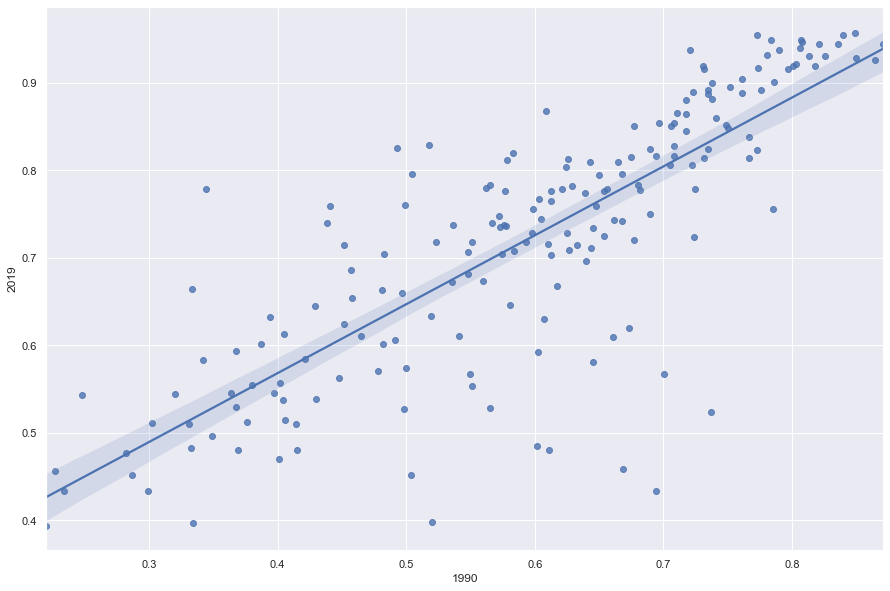

In [393]:
# Is there a strong correlation between 1990 and 2019 ?
fig, ax = plt.subplots(1, 1, figsize=(15,10))
sns.regplot(data=hdi, y='2019', x='1990')

Not really, countries take different paths and it will make more sense to have a decade step at first.

<AxesSubplot:xlabel='1990', ylabel='2000'>

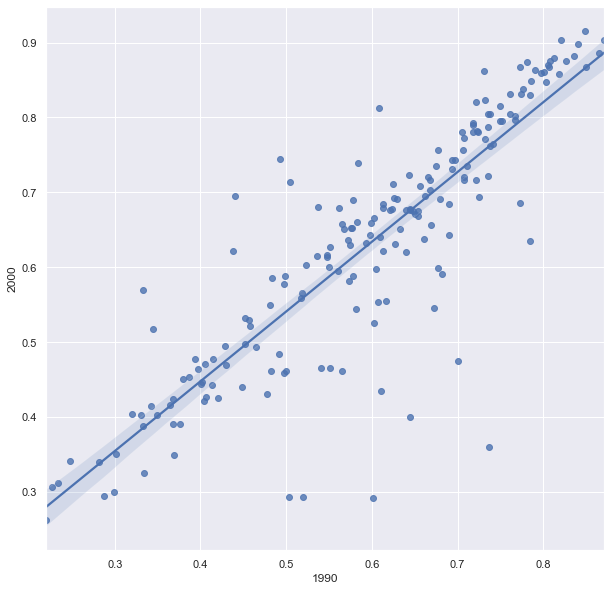

In [402]:
# Is there a strong correlation between 1990 and 2000 HDI?
fig, ax = plt.subplots(1, 1, figsize=(10,10))
sns.regplot(data=hdi, y='2000', x='1990')

The correlation between 1990 and 2000 is better, but not so much: many geopolitical events change destiny of some countries, especially in Eastern Europe and Central Asia with the fall of the Soviet Union. This decade is also marked by a strong evolution of South East Asia, especially with China, Japan and South Korea.

<AxesSubplot:xlabel='2000', ylabel='2010'>

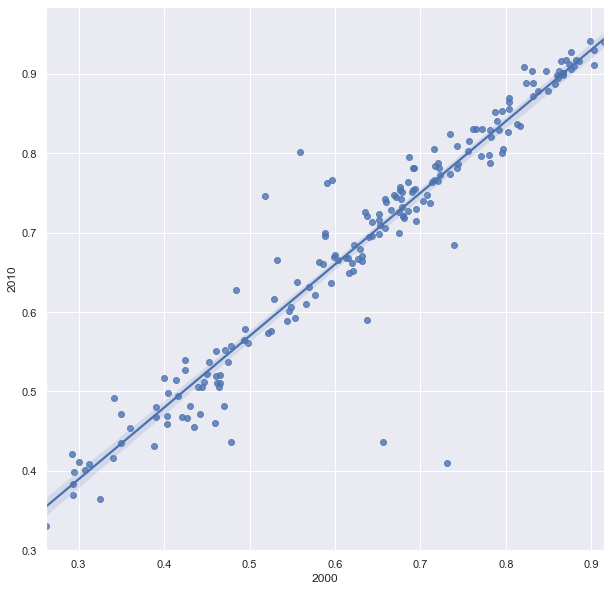

In [401]:
# Is there a strong correlation between 2000 and 2010 HDI?
fig, ax = plt.subplots(1, 1, figsize=(10,10))
sns.regplot(hdi['2000'],hdi['2010'])

The correlation between 2000 and 2010 show also a big change with a more linear evolution, even if there is some outliers, due to wars, terrorist attacks which mark a drop in HDI value.

<AxesSubplot:xlabel='2010', ylabel='2019'>

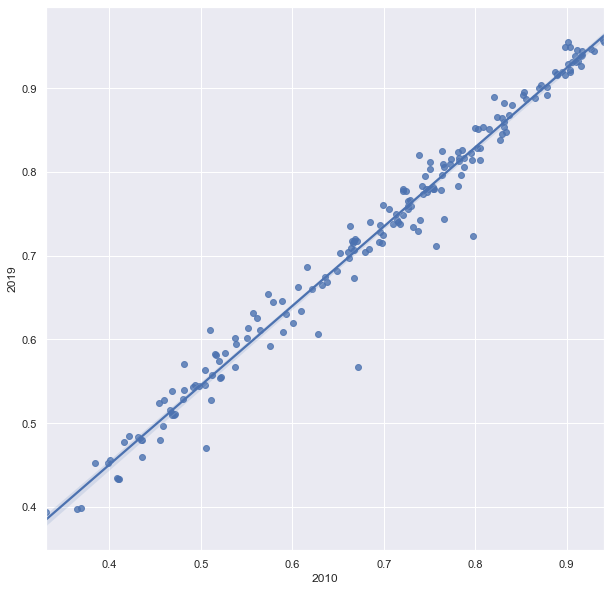

In [399]:
# Is there a strong correlation between 2010 and 2019 HDI?
fig, ax = plt.subplots(1, 1, figsize=(10,10))
sns.regplot(data=hdi, y='2019', x='2010')

Correlation is pretty strong in 2010's, we can see a linear evolution of the HDI in this period, for all the countries. 

<AxesSubplot:xlabel='2018', ylabel='2019'>

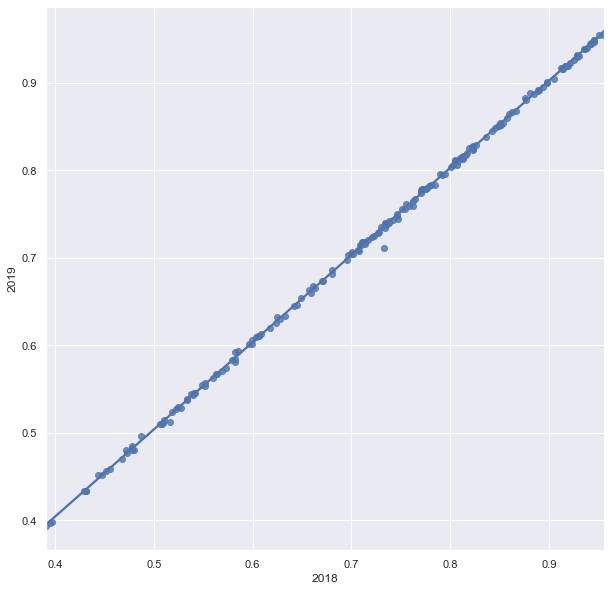

In [400]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
sns.regplot(data=hdi, y='2019', x='2018')

Between 2018 and 2019, the evolution of HDI is really linear. The correlation is pretty strong. There is only one country whose evolution is slightly different.

# Area plot joint with kernel density estimated plot

The more we 

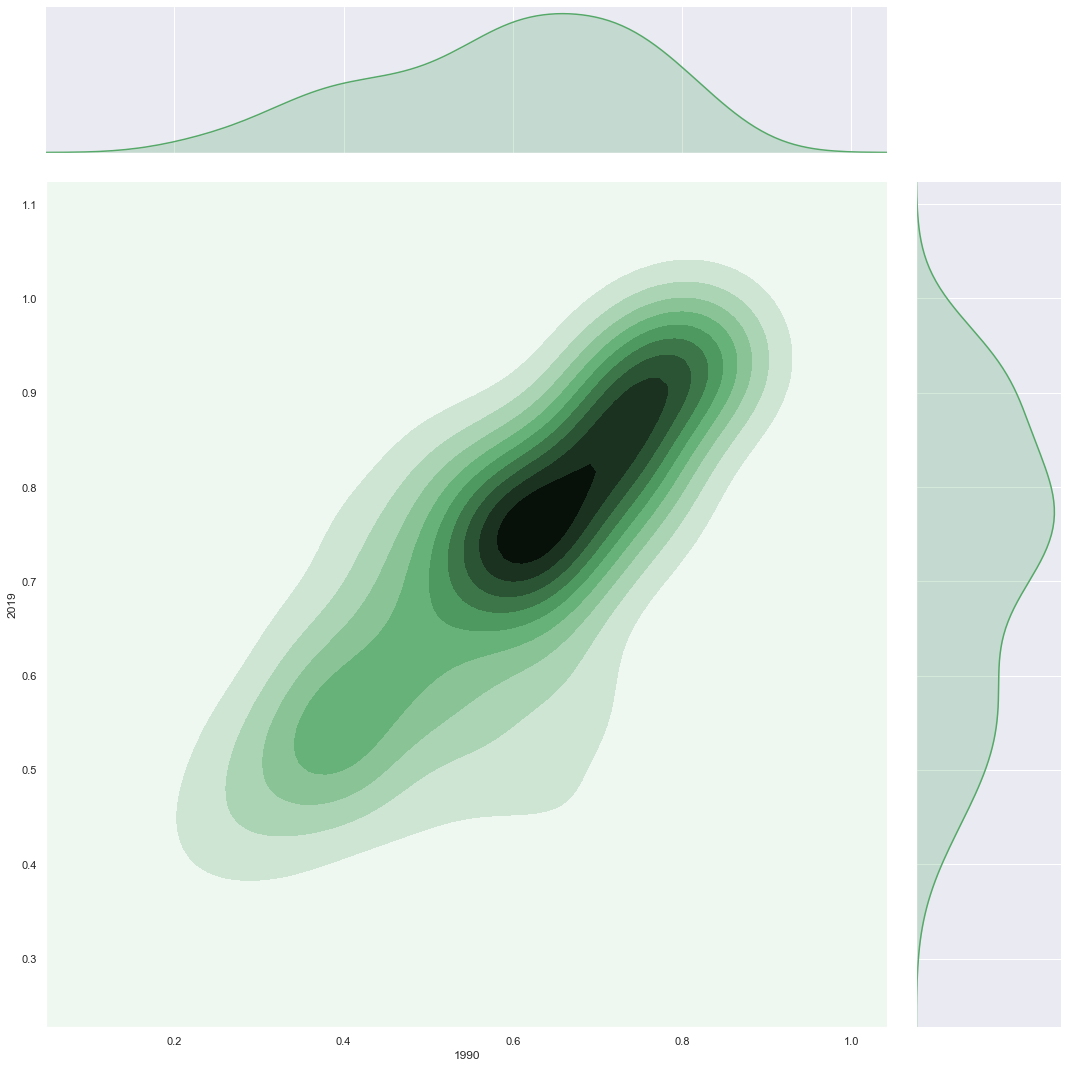

In [411]:
sns.jointplot('1990', '2019', data=hdi, kind="kde", color="g",height=15)
plt.savefig('HDI comparaison between 1990 and 2019.jpg')

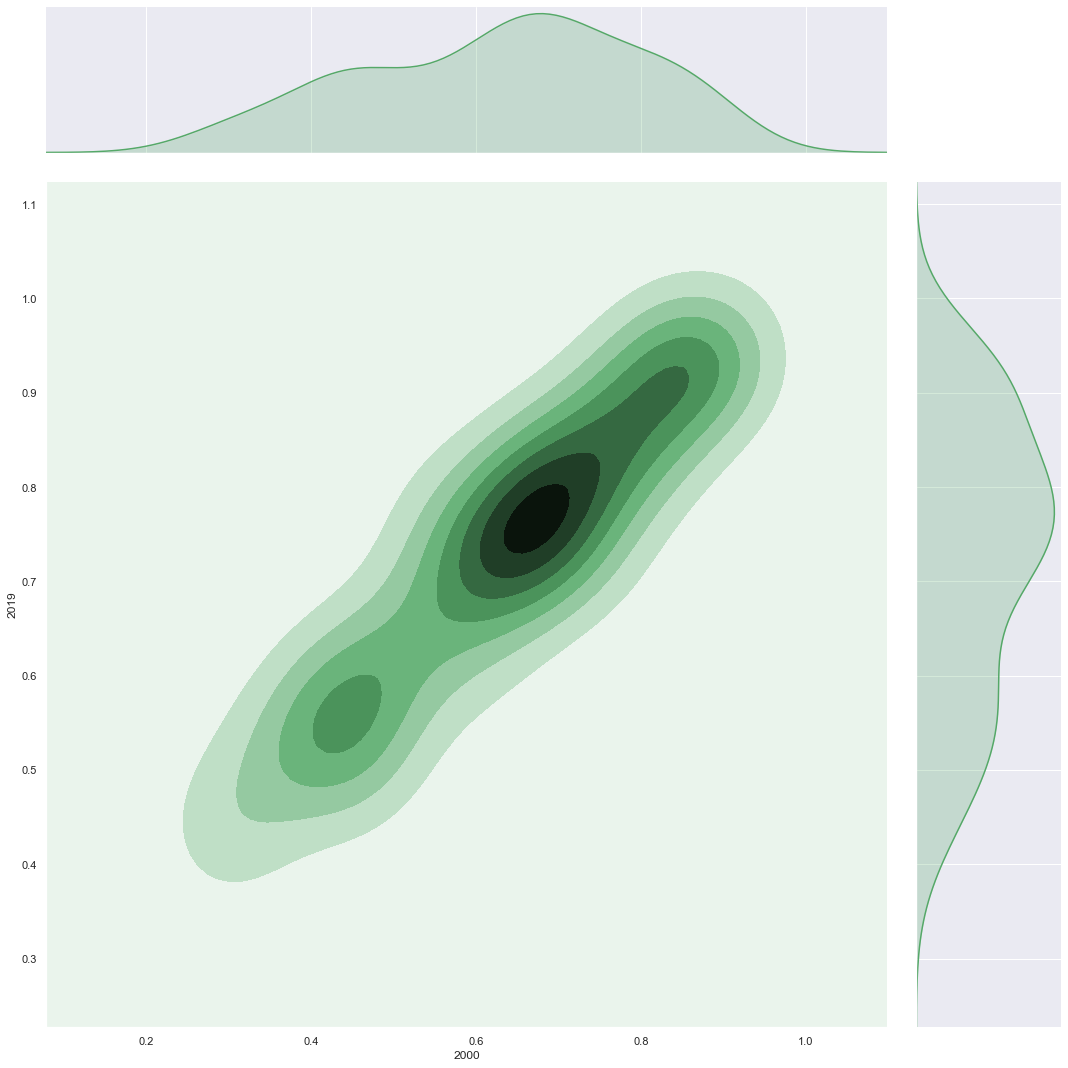

In [13]:
sns.jointplot('2000', '2019', data=hdi, kind="kde", color="g",height=15)
plt.savefig('HDI comparaison between 2000 and 2019.jpg')

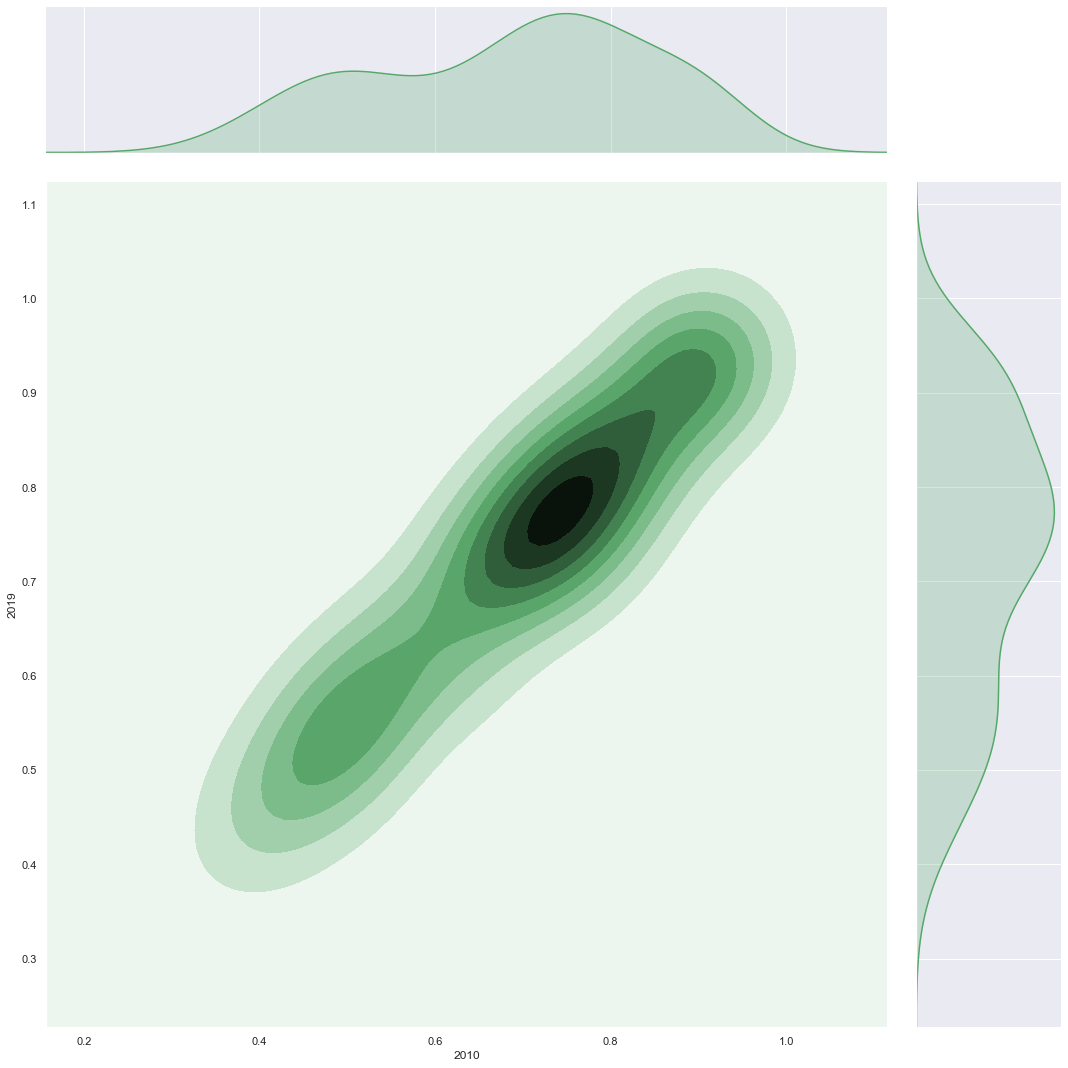

In [14]:
sns.jointplot('2010', '2019', data=hdi, kind="kde", color="g",height=15)
plt.savefig('HDI comparaison between 2010 and 2019.jpg')

array([[<AxesSubplot:title={'center':'1990'}>]], dtype=object)

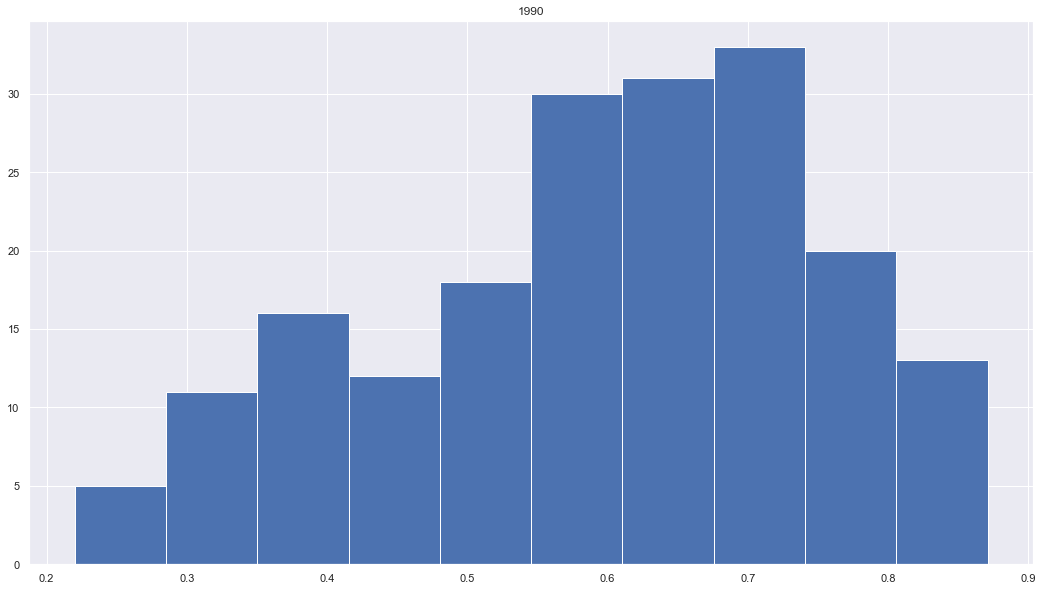

In [15]:
features=['Country', '1990']
hdi[features].hist(figsize=(18,10))

array([[<AxesSubplot:title={'center':'2019'}>]], dtype=object)

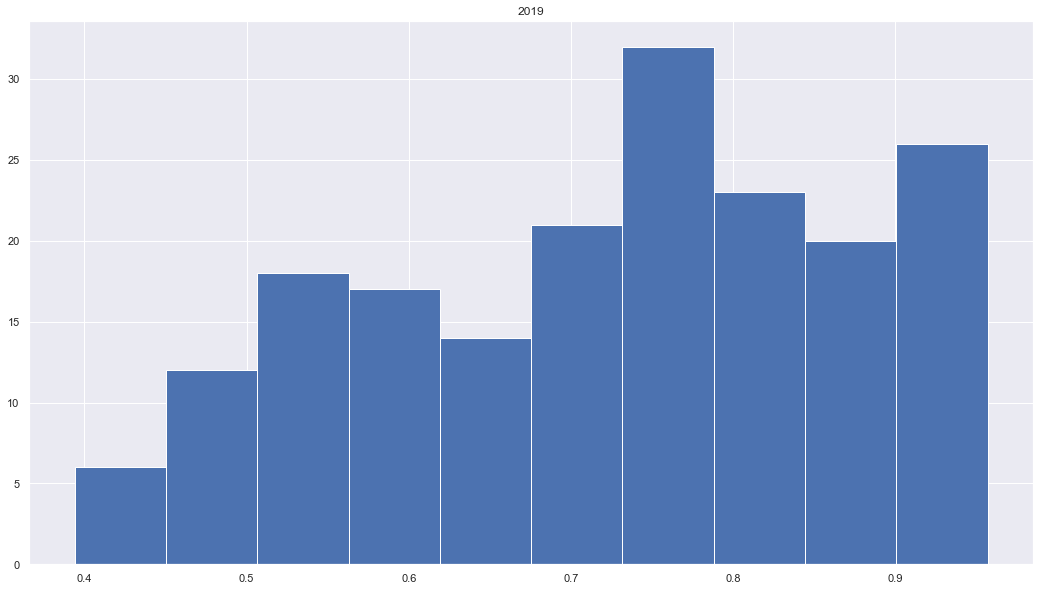

In [16]:
features=['Country', '2019']
hdi[features].hist(figsize=(18,10))

In [17]:
hdi.Country.value_counts()

 Samoa           1
 Congo           1
 Mongolia        1
 Chad            1
 Saudi Arabia    1
                ..
 Uruguay         1
 Ethiopia        1
 Uzbekistan      1
 Zimbabwe        1
 Belgium         1
Name: Country, Length: 189, dtype: int64

In [18]:
hdi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 31 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  189 non-null    object 
 1   1990     189 non-null    float64
 2   1991     189 non-null    float64
 3   1992     189 non-null    float64
 4   1993     189 non-null    float64
 5   1994     189 non-null    float64
 6   1995     189 non-null    float64
 7   1996     189 non-null    float64
 8   1997     189 non-null    float64
 9   1998     189 non-null    float64
 10  1999     189 non-null    float64
 11  2000     189 non-null    float64
 12  2001     189 non-null    float64
 13  2002     189 non-null    float64
 14  2003     189 non-null    float64
 15  2004     189 non-null    float64
 16  2005     189 non-null    float64
 17  2006     189 non-null    float64
 18  2007     189 non-null    float64
 19  2008     189 non-null    float64
 20  2009     189 non-null    float64
 21  2010     189 non

In [19]:
hdi.Country=hdi.Country.str.strip()

In [20]:
hdi_france=hdi.query('Country=="France"')

In [21]:
hdi.columns

Index(['Country', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2018', '2019'],
      dtype='object')

In [22]:
dct={i:i for i in ['1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2018', '2019']}

In [23]:
dct={i:int(j) for i,j in dct.items()}

# Create a DataFrame with all the datas

In [25]:
os.listdir()

['CO2 emissions per capita_cleaned.csv',
 'CO2 emissions_cleaned.csv',
 'Degraded land_cleaned.csv',
 'education_index_cleaned.csv',
 'Evolution of Gross National Income in France, Germany, United Kingdom, Italy and Spain.jpg',
 'Evolution of HDI for France, Germany, United Kingdom, Italy and Spain.jpg',
 'Evolution of life expectancy in France, Germany, United Kingdom, Italy and Spain.jpg',
 'Evolution of school index in France, Germany, United Kingdom, Italy and Spain.jpg',
 'expected_years_of_schooling_cleaned.csv',
 'Forest area + evolution_cleaned.csv',
 'Forest area_cleaned.csv',
 'Fossil fuel consumption_cleaned.csv',
 'GNI_per_capita_cleaned.csv',
 'HDI comparaison between 1990 and 2019.jpg',
 'HDI comparaison between 2000 and 2019.jpg',
 'HDI comparaison between 2010 and 2019.jpg',
 'HDI_cleaned.csv',
 'HDI_global_cleaned.csv',
 'income_index_cleaned.csv',
 'life_expectancy_cleaned.csv',
 'life_expectancy_index_cleaned.csv',
 'mean_years_of_schooling_cleaned.csv',
 'Mortality 

In [27]:
file1='life_expectancy_cleaned.csv'
file2='expected_years_of_schooling_cleaned.csv'
file3='mean_years_of_schooling_cleaned.csv'
file4='GNI_per_capita_cleaned.csv'

In [28]:
life=pd.read_csv(file1)

In [29]:
life.Country=life.Country.str.strip()

# Melting all the DataFrames into one single DF

In [30]:
life_melted=life.melt(id_vars='Country', value_name='life').set_index(['Country','variable'])

In [31]:
life_melted.shape

(5730, 1)

In [32]:
life_melted.isna().sum()

life    0
dtype: int64

In [33]:
school_expected=pd.read_csv(file2)

In [34]:
school_expected.Country=school_expected.Country.str.strip()

In [35]:
school_melted=school_expected.melt(id_vars='Country', value_name='school expected').set_index(['Country', 'variable'])

In [36]:
school_melted.isna().sum()

school expected    0
dtype: int64

In [37]:
mean_schooling=pd.read_csv(file3)

In [38]:
mean_schooling.Country=mean_schooling.Country.str.strip()

In [39]:
school_melted2=mean_schooling.melt(id_vars='Country', value_name='school mean').set_index(['Country', 'variable'])

In [40]:
school_melted2.isna().sum()

school mean    0
dtype: int64

In [41]:
gni=pd.read_csv(file4)

In [42]:
gni.Country=gni.Country.str.strip()

In [43]:
gni.Country.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo',
       'Congo (Democratic Republic of the)', 'Costa Rica', 'Croatia',
       'Cuba', 'Cyprus', 'Czechia', "Côte d'Ivoire", 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini (Kingdom of)', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
     

In [44]:
list_1 = np.setdiff1d(life.Country,gni.Country)

In [45]:
list_1

array(["Korea (Democratic People's Rep. of)", 'Somalia'], dtype=object)

In [46]:
list_2 = np.setdiff1d(gni.Country,life.Country)

In [47]:
list_2

array(['Nauru', 'Tuvalu'], dtype=object)

In [48]:
gni_melted=gni.melt(id_vars='Country', value_name='gni per capita').set_index(['Country', 'variable'])

In [49]:
gni_melted.isna().sum()

gni per capita    0
dtype: int64

In [50]:
hdi_melted=hdi.melt(id_vars='Country', value_name='HDI').set_index(['Country', 'variable'])

In [51]:
hdi_melted.isna().sum()

HDI    0
dtype: int64

In [52]:
test=pd.concat([hdi_melted, life_melted, school_melted, school_melted2, gni_melted], axis=1)

In [53]:
test

HDI  life  school expected  school mean  \
Country     variable                                              
Afghanistan 1990      0.302  50.3              2.6          1.5   
            1991      0.307  51.0              2.9          1.6   
            1992      0.316  51.6              3.2          1.6   
            1993      0.312  52.3              3.6          1.7   
            1994      0.307  52.8              3.9          1.8   
...                     ...   ...              ...          ...   
Zimbabwe    2015      0.553  59.5             10.3          8.2   
            2016      0.558  60.3             10.4          8.3   
            2017      0.563  60.8             10.5          8.3   
            2018      0.569  61.2             10.5          8.4   
            2019      0.571  61.5             11.0          8.5   

                      gni per capita  
Country     variable                  
Afghanistan 1990              2477.9  
            1991              2059.9  
            1992              1921.7  
            1993              1320.5  
            1994               950.9  
...                              ...  
Zimbabwe    2015              2657.7  
            2016              2681.4  
            2017              2758.8  
            2018              2942.0  
            2019              2665.6  

[5820 rows x 5 columns]

In [54]:
test.isna().sum()

HDI                150
life                90
school expected     30
school mean        120
gni per capita      90
dtype: int64

In [55]:
nas={i:test.iloc[i].isna().sum() for i in range(len(test.index)) 
     if test.iloc[i].isna().sum()/test.shape[1]>0}

In [56]:
nas

{2700: 3,
 2701: 3,
 2702: 3,
 2703: 3,
 2704: 3,
 2705: 3,
 2706: 3,
 2707: 3,
 2708: 3,
 2709: 3,
 2710: 3,
 2711: 3,
 2712: 3,
 2713: 3,
 2714: 3,
 2715: 3,
 2716: 3,
 2717: 3,
 2718: 3,
 2719: 3,
 2720: 3,
 2721: 3,
 2722: 3,
 2723: 3,
 2724: 3,
 2725: 3,
 2726: 3,
 2727: 3,
 2728: 3,
 2729: 3,
 3630: 3,
 3631: 3,
 3632: 3,
 3633: 3,
 3634: 3,
 3635: 3,
 3636: 3,
 3637: 3,
 3638: 3,
 3639: 3,
 3640: 3,
 3641: 3,
 3642: 3,
 3643: 3,
 3644: 3,
 3645: 3,
 3646: 3,
 3647: 3,
 3648: 3,
 3649: 3,
 3650: 3,
 3651: 3,
 3652: 3,
 3653: 3,
 3654: 3,
 3655: 3,
 3656: 3,
 3657: 3,
 3658: 3,
 3659: 3,
 4470: 4,
 4471: 4,
 4472: 4,
 4473: 4,
 4474: 4,
 4475: 4,
 4476: 4,
 4477: 4,
 4478: 4,
 4479: 4,
 4480: 4,
 4481: 4,
 4482: 4,
 4483: 4,
 4484: 4,
 4485: 4,
 4486: 4,
 4487: 4,
 4488: 4,
 4489: 4,
 4490: 4,
 4491: 4,
 4492: 4,
 4493: 4,
 4494: 4,
 4495: 4,
 4496: 4,
 4497: 4,
 4498: 4,
 4499: 4,
 4800: 3,
 4801: 3,
 4802: 3,
 4803: 3,
 4804: 3,
 4805: 3,
 4806: 3,
 4807: 3,
 4808: 3,
 4809: 3,


In [57]:
test.iloc[5428]

HDI                   NaN
life                  NaN
school expected      12.3
school mean           NaN
gni per capita     5654.1
Name: (Tuvalu, 2018), dtype: float64

In [58]:
hdi_indcators=test

In [59]:
df=hdi_indcators.copy()

In [60]:
df

HDI  life  school expected  school mean  \
Country     variable                                              
Afghanistan 1990      0.302  50.3              2.6          1.5   
            1991      0.307  51.0              2.9          1.6   
            1992      0.316  51.6              3.2          1.6   
            1993      0.312  52.3              3.6          1.7   
            1994      0.307  52.8              3.9          1.8   
...                     ...   ...              ...          ...   
Zimbabwe    2015      0.553  59.5             10.3          8.2   
            2016      0.558  60.3             10.4          8.3   
            2017      0.563  60.8             10.5          8.3   
            2018      0.569  61.2             10.5          8.4   
            2019      0.571  61.5             11.0          8.5   

                      gni per capita  
Country     variable                  
Afghanistan 1990              2477.9  
            1991              2059.9  
            1992              1921.7  
            1993              1320.5  
            1994               950.9  
...                              ...  
Zimbabwe    2015              2657.7  
            2016              2681.4  
            2017              2758.8  
            2018              2942.0  
            2019              2665.6  

[5820 rows x 5 columns]

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 5820 entries, ('Afghanistan', '1990') to ('Zimbabwe', '2019')
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   HDI              5670 non-null   float64
 1   life             5730 non-null   float64
 2   school expected  5790 non-null   float64
 3   school mean      5700 non-null   float64
 4   gni per capita   5730 non-null   float64
dtypes: float64(5)
memory usage: 246.3+ KB


In [62]:
df.isna().sum()

HDI                150
life                90
school expected     30
school mean        120
gni per capita      90
dtype: int64

In [416]:
df=df.dropna()

In [63]:
df1=df.reset_index()

In [64]:
df1.rename({'variable':'year'}, axis=1, inplace=True)

# Create a school index instead from the 2 values

In [65]:
df1['school_index']=(df1['school expected']+df1['school mean'])/2

In [66]:
df1.columns

Index(['Country', 'year', 'HDI', 'life', 'school expected', 'school mean',
       'gni per capita', 'school_index'],
      dtype='object')

In [67]:
df1=df1[['Country', 'year', 'HDI', 'life', 'school_index','gni per capita']]

# Create DataFrame for the 5 big western european countries

In [68]:
df_france=df1[(df1.Country=="France")]

In [69]:
df_germany=df1[(df1.Country=="Germany")]

In [70]:
df_uk=df1[(df1.Country=="United Kingdom")]

In [71]:
df_spain=df1[(df1.Country=="Spain")]

In [72]:
df_italy=df1[(df1.Country=="Italy")]

In [417]:
df_france.head()

Country  year    HDI  life  school_index  gni per capita
1800  France  1990  0.786  76.8         10.65         33980.9
1801  France  1991  0.796  77.0         11.00         34117.8
1802  France  1992  0.804  77.2         11.25         34535.7
1803  France  1993  0.810  77.5         11.45         34202.2
1804  France  1994  0.825  77.7         12.00         34823.8

# Data plot for those countries

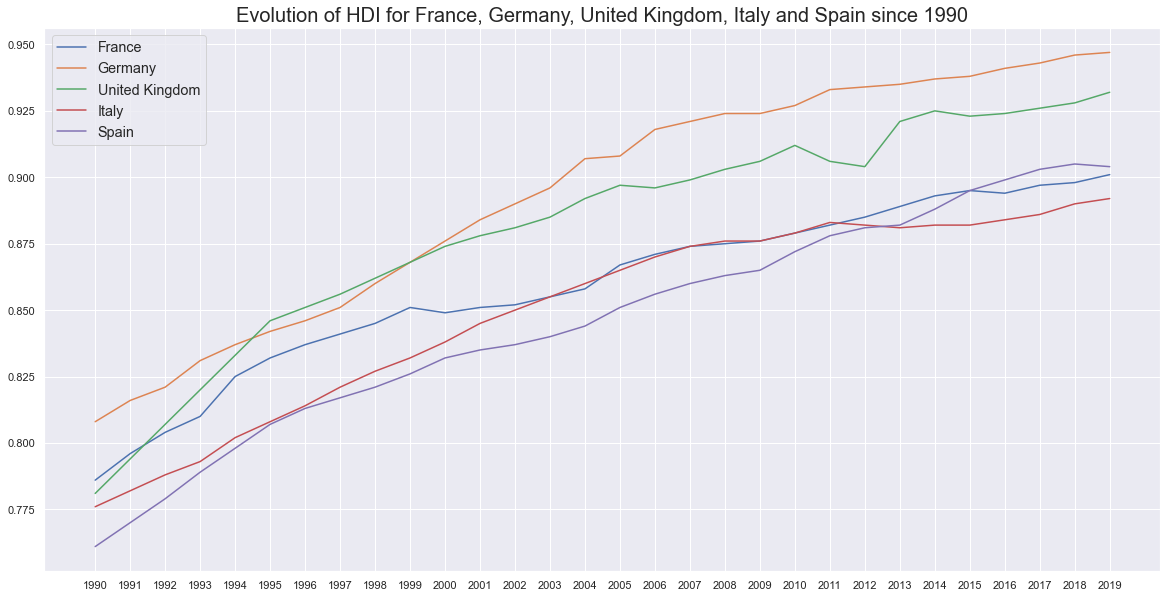

In [84]:
plt.figure(figsize=(20,10))
plt.plot(df_france.year,df_france.HDI, label='France')
plt.plot(df_germany.year, df_germany['HDI'], label='Germany')
plt.plot(df_france.year, df_uk['HDI'], label='United Kingdom')
plt.plot(df_france.year, df_italy['HDI'], label='Italy')
plt.plot(df_france.year, df_spain['HDI'], label='Spain')
plt.legend(fontsize ='large')
plt.title('Evolution of HDI for France, Germany, United Kingdom, Italy and Spain since 1990', fontsize=20)
plt.savefig('Evolution of HDI for France, Germany, United Kingdom, Italy and Spain.jpg', dpi=300)
plt.show()

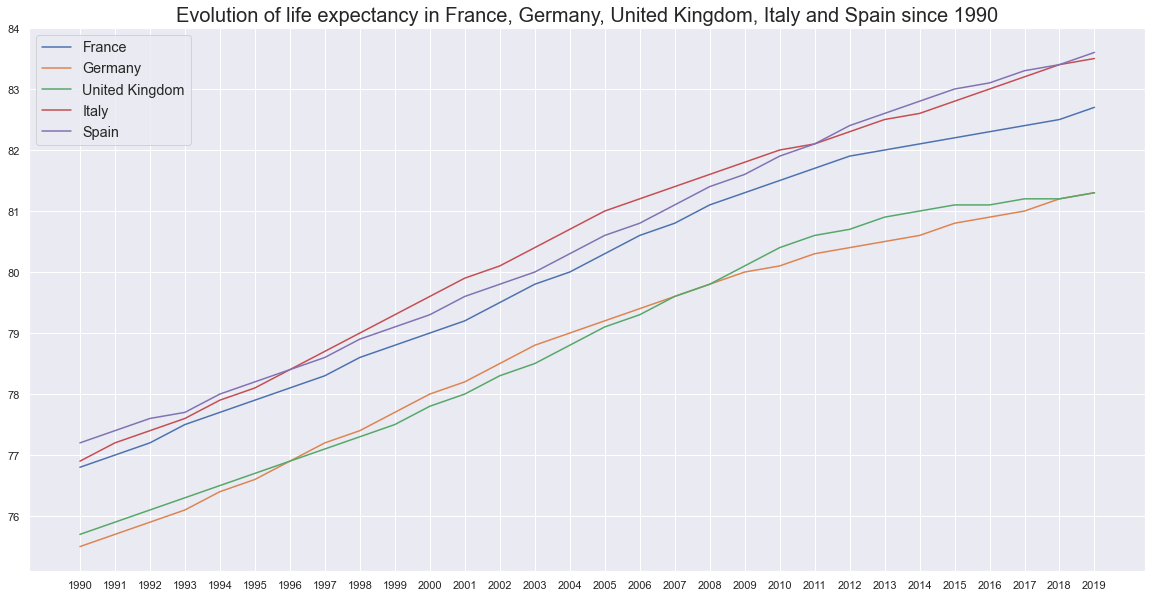

In [75]:
plt.figure(figsize=(20,10))
plt.plot(df_france.year,df_france['life'], label='France')
plt.plot(df_germany.year, df_germany['life'], label='Germany')
plt.plot(df_uk.year, df_uk['life'], label='United Kingdom')
plt.plot(df_italy.year, df_italy['life'], label='Italy')
plt.plot(df_spain.year, df_spain['life'], label='Spain')
plt.legend(fontsize ='large')
plt.title('Evolution of life expectancy in France, Germany, United Kingdom, Italy and Spain since 1990', fontsize=20)
plt.savefig('Evolution of life expectancy in France, Germany, United Kingdom, Italy and Spain.jpg', dpi=300)
plt.show()

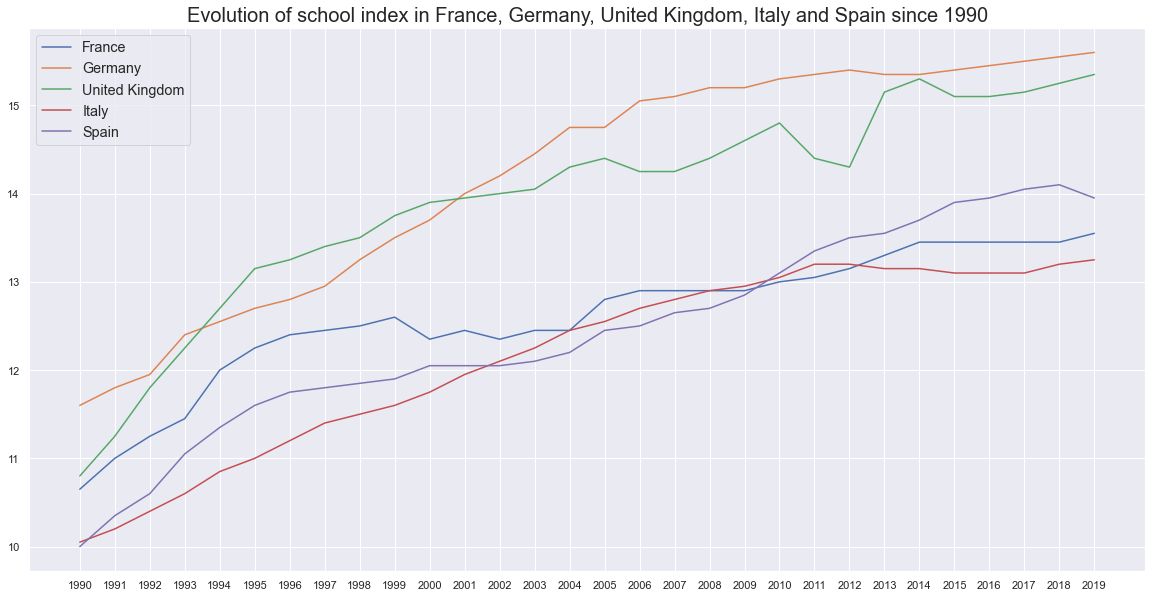

In [76]:
plt.figure(figsize=(20,10))
plt.plot(df_france.year,df_france['school_index'], label='France')
plt.plot(df_france.year, df_germany['school_index'], label='Germany')
plt.plot(df_france.year, df_uk['school_index'], label='United Kingdom')
plt.plot(df_france.year, df_italy['school_index'], label='Italy')
plt.plot(df_france.year, df_spain['school_index'], label='Spain')
plt.legend(fontsize='large')
plt.title('Evolution of school index in France, Germany, United Kingdom, Italy and Spain since 1990', fontsize=20)
plt.savefig('Evolution of school index in France, Germany, United Kingdom, Italy and Spain.jpg', dpi=300)
plt.show()

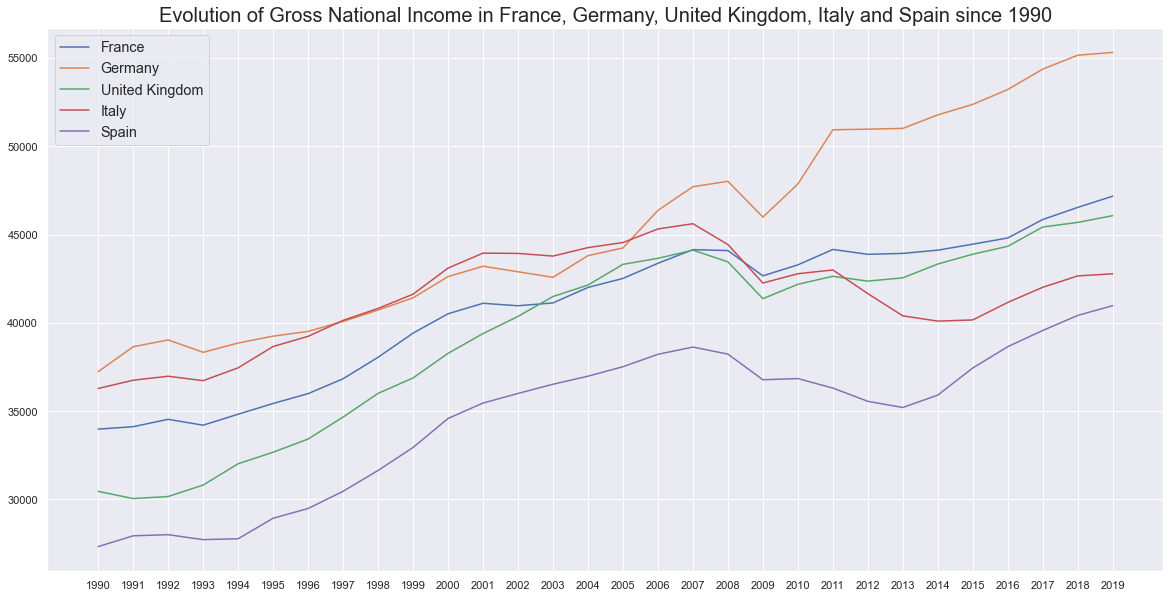

In [77]:
plt.figure(figsize=(20,10))
plt.plot(df_france.year,df_france['gni per capita'], label='France')
plt.plot(df_france.year, df_germany['gni per capita'], label='Germany')
plt.plot(df_france.year, df_uk['gni per capita'], label='United Kingdom')
plt.plot(df_france.year, df_italy['gni per capita'], label='Italy')
plt.plot(df_france.year, df_spain['gni per capita'], label='Spain')
plt.legend(fontsize='large')
plt.title('Evolution of Gross National Income in France, Germany, United Kingdom, Italy and Spain since 1990', fontsize=20)
plt.savefig('Evolution of Gross National Income in France, Germany, United Kingdom, Italy and Spain.jpg', dpi=300)
plt.show()

# Modeling for these 5 countries

In [418]:
df4=pd.concat([df_france, df_germany, df_uk, df_italy, df_spain]).reset_index().drop(['index'], axis=1)

In [419]:
df4.head()

Country  year    HDI  life  school_index  gni per capita
0  France  1990  0.786  76.8         10.65         33980.9
1  France  1991  0.796  77.0         11.00         34117.8
2  France  1992  0.804  77.2         11.25         34535.7
3  France  1993  0.810  77.5         11.45         34202.2
4  France  1994  0.825  77.7         12.00         34823.8

In [420]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         150 non-null    object 
 1   year            150 non-null    object 
 2   HDI             150 non-null    float64
 3   life            150 non-null    float64
 4   school_index    150 non-null    float64
 5   gni per capita  150 non-null    float64
dtypes: float64(4), object(2)
memory usage: 7.2+ KB


In [421]:
# As year is still an object, we change it for an integer
df4=df4.astype({"year": int})

In [422]:
df4

Country  year    HDI  life  school_index  gni per capita
0    France  1990  0.786  76.8         10.65         33980.9
1    France  1991  0.796  77.0         11.00         34117.8
2    France  1992  0.804  77.2         11.25         34535.7
3    France  1993  0.810  77.5         11.45         34202.2
4    France  1994  0.825  77.7         12.00         34823.8
..      ...   ...    ...   ...           ...             ...
145   Spain  2015  0.895  83.0         13.90         37442.5
146   Spain  2016  0.899  83.1         13.95         38648.9
147   Spain  2017  0.903  83.3         14.05         39566.4
148   Spain  2018  0.905  83.4         14.10         40418.9
149   Spain  2019  0.904  83.6         13.95         40974.5

[150 rows x 6 columns]

In [423]:
df4=df4.sample(frac=1)

In [424]:
df_test

Country  year    HDI  life  school_index  gni per capita
1            France  1991  0.796  77.0         11.00         34117.8
93            Italy  1993  0.793  77.6         10.60         36725.2
80   United Kingdom  2010  0.912  80.4         14.80         42182.8
55          Germany  2015  0.938  80.8         15.40         52371.4
43          Germany  2003  0.896  78.8         14.45         42578.1
..              ...   ...    ...   ...           ...             ...
26           France  2016  0.894  82.3         13.45         44805.9
137           Spain  2007  0.860  81.1         12.65         38626.5
33          Germany  1993  0.831  76.1         12.40         38331.2
14           France  2004  0.858  80.0         12.45         42003.0
45          Germany  2005  0.908  79.2         14.75         44240.0

[150 rows x 6 columns]

In [426]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 93 to 55
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         150 non-null    object 
 1   year            150 non-null    int32  
 2   HDI             150 non-null    float64
 3   life            150 non-null    float64
 4   school_index    150 non-null    float64
 5   gni per capita  150 non-null    float64
dtypes: float64(4), int32(1), object(1)
memory usage: 7.6+ KB


In [427]:
X=df4.drop(['Country', 'HDI'], axis=1)
y=df4.HDI

sm.OLS(y, sm.add_constant(X.drop(['year'], axis=1).astype(float))).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    HDI   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 3.089e+04
Date:                Fri, 18 Dec 2020   Prob (F-statistic):          2.25e-204
Time:                        12:26:24   Log-Likelihood:                 742.72
No. Observations:                 150   AIC:                            -1477.
Df Residuals:                     146   BIC:                            -1465.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1367      0.006     23.503      0.000       0.125       0.148
life               0.0047   8.04e-05     58.330      0.000       0.005       0.005
school_index       0.0231      0.000    150.129      0.000       0.023       0.023
gni per capita  1.337e-06   3.79e-08     35.268      0.000    1.26e-06    1.41e-06
==============================================================================
Omnibus:                        7.759   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.021   Jarque-Bera (JB):                7.575
Skew:                          -0.470   Prob(JB):                       0.0226
Kurtosis:                       3.572   Cond. No.                     1.67e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.67e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [428]:
atdf=pd.concat([X,y], axis=1)

In [429]:
atdf.corr().HDI.sort_values()

life              0.657772
gni per capita    0.823487
year              0.870306
school_index      0.964984
HDI               1.000000
Name: HDI, dtype: float64

In [430]:
model_fit=sm.OLS(y, sm.add_constant(X.drop(['year'], axis=1).astype(float))).fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    HDI   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 3.089e+04
Date:                Fri, 18 Dec 2020   Prob (F-statistic):          2.25e-204
Time:                        12:28:08   Log-Likelihood:                 742.72
No. Observations:                 150   AIC:                            -1477.
Df Residuals:                     146   BIC:                            -1465.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1367      0.006     23.503      0.000       0.125       0.148
life               0.0047   8.04e-05     58.330      0.000       0.005       0.005
school_index       0.0231      0.000    150.129      0.000       0.023       0.023
gni per capita  1.337e-06   3.79e-08     35.268      0.000    1.26e-06    1.41e-06
==============================================================================
Omnibus:                        7.759   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.021   Jarque-Bera (JB):                7.575
Skew:                          -0.470   Prob(JB):                       0.0226
Kurtosis:                       3.572   Cond. No.                     1.67e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.67e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [432]:
y_pred=model_fit.predict()

<AxesSubplot:xlabel='HDI'>

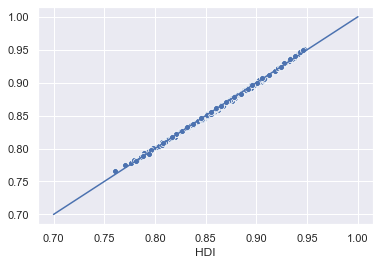

In [433]:
sns.scatterplot(y, y_pred)
sns.lineplot([0.7,1],[0.7,1])

In [434]:
tester=atols(X,y_pred)

Fitting linear regression

R^2: 1.0 

Coefficients
-------------------------------------
Intercept: 0.13667593553944857
year: 0.0
life: 0.0
school_index: 0.02
gni per capita: 0.0

Assumption 1: Linear Relationship between the Target and the Features
Checking with a scatter plot of actual vs. predicted. Predictions should follow the diagonal line.


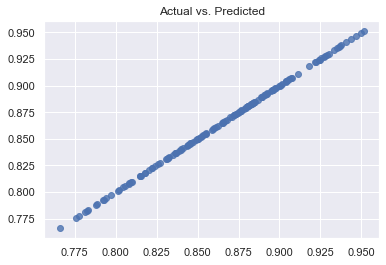

If non-linearity is apparent, consider adding a polynomial term 
		or using box-cox transformation to make X or y follow normal distribution



Building a correlation table


Parameters that are most likely VIOLATE linearity assumption and their correlation with y


Series([], Name: y, dtype: float64)


Parameters that are most likely FOLLOW linearity assumption and their correlation with y


year              0.870905
life              0.658290
school_index      0.965744
gni per capita    0.824136
Name: y, dtype: float64


Assumption 2: Little to no multicollinearity among predictors


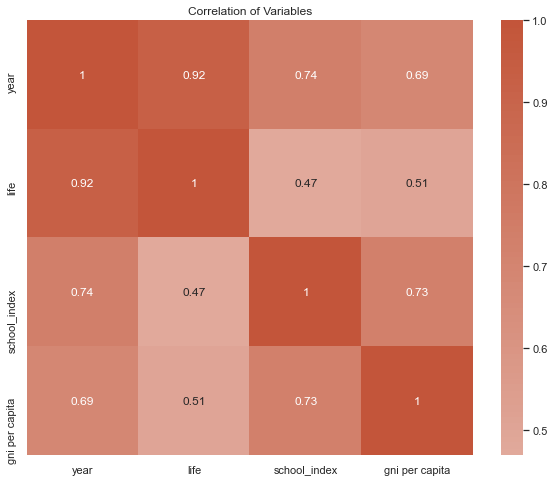

Variance Inflation Factors (VIF)
> 10: An indication that multicollinearity may be present
> 100: Certain multicollinearity among the variables
-------------------------------------
life: 2581.629041618673
year: 2258.8479644111662
school_index: 203.25343342805334
gni per capita: 118.48983279989817

4 cases of possible multicollinearity
4 cases of definite multicollinearity

Assumption not satisfied

Coefficient interpretability will be problematic
Consider removing variables with a high Variance Inflation Factor (VIF)

Assumption 3: No Autocorrelation

Performing Durbin-Watson Test
Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data
0 to 2< is positive autocorrelation
>2 to 4 is negative autocorrelation
-------------------------------------
Durbin-Watson: 2.4068466191046958
Little to no autocorrelation 

Assumption satisfied

Assumption 4: Homoskedasticity of Error Terms
Residuals should have relative constant variance


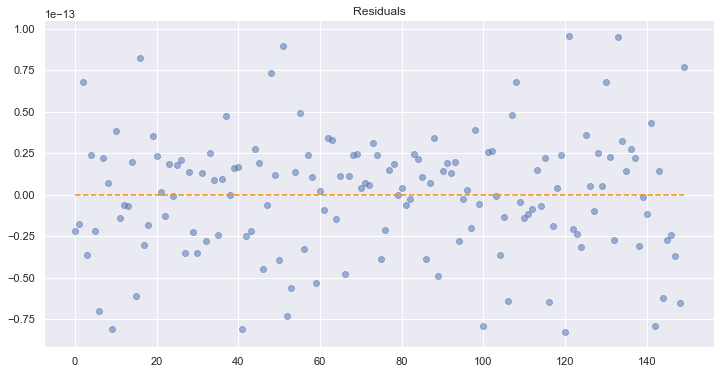

If heteroskedasticity is apparent, confidence intervals and predictions will be affected

Consider removing outliers and preprocessing features - nonlinear transformation can help


{'Lagrange Multiplier': 50.48593058237426,
 'pvalue for LM': 6.29513234329933e-11,
 'F stats': 18.51734611036094,
 'pvalue for Fstats': 2.503993756120513e-12}

Signs of positive autocorrelation 

Assumption potentially not satisfied 


Assumption 5: The error terms are kinda normally distributed

Using the Anderson-Darling test for normal distribution
p-value from the test - below 0.05 generally means non-normal: 0.013921041905168765
Residuals are not normally distributed


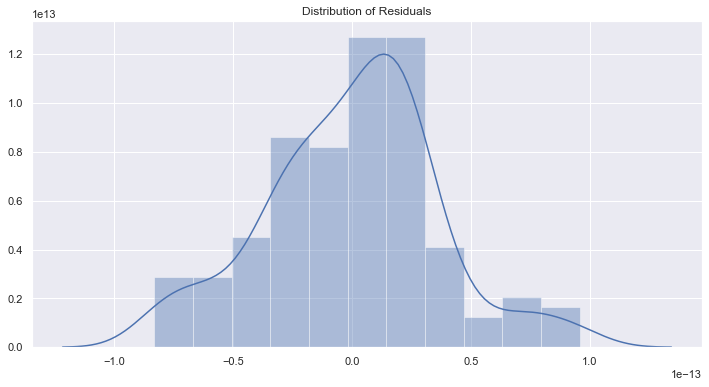


Assumption not satisfied

Confidence intervals will likely be affected
Try performing nonlinear transformations on variables
Building a probability plot


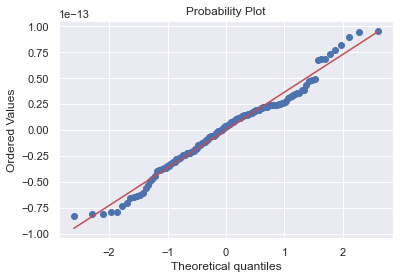


In your dataset you quite fat tails. You have 0.007 potential outliers (1 rows)


{'Satisfied': ['Linearity', 'Autocorrelation'],
 'Potentially': ['Autocorrelation', 'Sub-Normality'],
 'Violated': ['Multicollinearity', 'Normality']}

In [435]:
tester.run_all()

The analysis shows that we have multicollinerarity in columns of our DataFrame. It makes sense in a way, because the datas in columns are used to the calculation of the Human Development Index.
So in a way, it makes sense.

# Map for 2019

In [97]:
# Import the map of the world
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world = world[(world.pop_est>0) & (world.name!="Antarctica")]

In [98]:
mask2019 = (df1['year']=='2019') 
df2019 = df1.loc[mask2019]

In [99]:
df2019.head()

Country  year    HDI  life  school_index  gni per capita
29   Afghanistan  2019  0.511  64.8          7.05          2229.4
59       Albania  2019  0.795  78.6         12.40         13998.3
89       Algeria  2019  0.748  76.9         11.30         11174.0
119      Andorra  2019  0.868  81.9         11.90         56000.3
149       Angola  2019  0.581  61.1          8.50          6104.1

In [100]:
list1 = np.setdiff1d(df1.Country,world.name)

In [101]:
list1

array(['Andorra', 'Antigua and Barbuda', 'Bahrain', 'Barbados',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Brunei Darussalam', 'Cabo Verde', 'Central African Republic',
       'Comoros', 'Congo (Democratic Republic of the)', 'Dominica',
       'Dominican Republic', 'Equatorial Guinea', 'Eswatini (Kingdom of)',
       'Grenada', 'Hong Kong, China (SAR)', 'Iran (Islamic Republic of)',
       'Kiribati', "Korea (Democratic People's Rep. of)",
       'Korea (Republic of)', "Lao People's Democratic Republic",
       'Liechtenstein', 'Maldives', 'Malta', 'Marshall Islands',
       'Mauritius', 'Micronesia (Federated States of)',
       'Moldova (Republic of)', 'Nauru', 'North Macedonia', 'Palau',
       'Palestine, State of', 'Russian Federation',
       'Saint Kitts and Nevis', 'Saint Lucia',
       'Saint Vincent and the Grenadines', 'Samoa', 'San Marino',
       'Sao Tome and Principe', 'Seychelles', 'Singapore',
       'Solomon Islands', 'South Sudan', '

In [102]:
list2 = np.setdiff1d(world.name,df1.Country)

In [103]:
list2

array(['Bolivia', 'Bosnia and Herz.', 'Brunei', 'Central African Rep.',
       'Dem. Rep. Congo', 'Dominican Rep.', 'Eq. Guinea', 'Falkland Is.',
       'Fr. S. Antarctic Lands', 'Greenland', 'Iran', 'Kosovo', 'Laos',
       'Macedonia', 'Moldova', 'N. Cyprus', 'New Caledonia',
       'North Korea', 'Palestine', 'Puerto Rico', 'Russia', 'S. Sudan',
       'Solomon Is.', 'Somaliland', 'South Korea', 'Syria', 'Taiwan',
       'Tanzania', 'United States of America', 'Venezuela', 'Vietnam',
       'W. Sahara', 'eSwatini'], dtype=object)

## Make the 2 datasets correspond and merge them

In [104]:
dct={'Bolivia (Plurinational State of)':'Bolivia', 'Bosnia and Herzegovina':'Bosnia and Herz.',
     'Brunei Darussalam':'Brunei', 'Central African Republic':'Central African Rep.',
     'Congo (Democratic Republic of the)':'Dem. Rep. Congo', 'Dominican Republic':'Dominican Rep.',
     'Equatorial Guinea':'Eq. Guinea',  'Iran (Islamic Republic of)':'Iran',
     'Lao People\'s Democratic Republic':'Laos', 'North Macedonia':'Macedonia',
     'Moldova (Republic of)':'Moldova', "Korea (Democratic People's Rep. of)":'North Korea',
     'Palestine, State of':'Palestine', 'Russian Federation':'Russia',  'South Sudan':'S. Sudan',
     'Solomon Islands':'Solomon Is.', 'Korea (Republic of)':'South Korea', 'Syrian Arab Republic':'Syria',
     'Tanzania (United Republic of)':'Tanzania', 'United States':'United States of America',
     'Venezuela (Bolivarian Republic of)':'Venezuela', 'Viet Nam':'Vietnam'}

In [105]:
df2019.Country=df2019.Country.map(lambda x: dct.get(x,x))

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [109]:
# Creation of a pivot table with the values is counted 
data2019=df2019.pivot_table(index="Country",
                        values=['HDI', 'life', 'school_index', 'gni per capita']
                          ).sort_values('HDI', ascending=False).reset_index()

In [110]:
data2019.head()

Country    HDI  gni per capita  life  school_index
0                  Norway  0.957         66494.3  82.4         15.50
1             Switzerland  0.955         69393.5  83.8         14.85
2                 Ireland  0.955         68370.6  82.3         15.70
3  Hong Kong, China (SAR)  0.949         62984.8  84.9         14.60
4                 Iceland  0.949         54682.4  83.0         15.95

In [111]:
# Merge the table world with the HDI table 
merged2019 = world.set_index('name').join(data2019.set_index('Country'))

In [112]:
merged2019

pop_est      continent iso_a3  gdp_md_est  \
name                                                                    
Fiji                         920938        Oceania    FJI      8374.0   
Tanzania                   53950935         Africa    TZA    150600.0   
W. Sahara                    603253         Africa    ESH       906.5   
Canada                     35623680  North America    CAN   1674000.0   
United States of America  326625791  North America    USA  18560000.0   
...                             ...            ...    ...         ...   
Serbia                      7111024         Europe    SRB    101800.0   
Montenegro                   642550         Europe    MNE     10610.0   
Kosovo                      1895250         Europe    -99     18490.0   
Trinidad and Tobago         1218208  North America    TTO     43570.0   
S. Sudan                   13026129         Africa    SSD     20880.0   

                                                                   geometry  \
name                                                                          
Fiji                      MULTIPOLYGON (((180.00000 -16.06713, 180.00000...   
Tanzania                  POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...   
W. Sahara                 POLYGON ((-8.66559 27.65643, -8.66512 27.58948...   
Canada                    MULTIPOLYGON (((-122.84000 49.00000, -122.9742...   
United States of America  MULTIPOLYGON (((-122.84000 49.00000, -120.0000...   
...                                                                     ...   
Serbia                    POLYGON ((18.82982 45.90887, 18.82984 45.90888...   
Montenegro                POLYGON ((20.07070 42.58863, 19.80161 42.50009...   
Kosovo                    POLYGON ((20.59025 41.85541, 20.52295 42.21787...   
Trinidad and Tobago       POLYGON ((-61.68000 10.76000, -61.10500 10.890...   
S. Sudan                  POLYGON ((30.83385 3.50917, 29.95350 4.17370, ...   

                            HDI  gni per capita  life  school_index  
name                                                                 
Fiji                      0.743         13009.1  67.4         12.65  
Tanzania                  0.529          2599.8  65.5          7.10  
W. Sahara                   NaN             NaN   NaN           NaN  
Canada                    0.929         48527.0  82.4         14.80  
United States of America  0.926         63825.7  78.9         14.85  
...                         ...             ...   ...           ...  
Serbia                    0.806         17191.7  76.0         12.95  
Montenegro                0.829         21399.2  76.9         13.30  
Kosovo                      NaN             NaN   NaN           NaN  
Trinidad and Tobago       0.796         26230.7  73.5         12.00  
S. Sudan                  0.433          2003.3  57.9          5.05  

[176 rows x 9 columns]

## HDI maps creation

<AxesSubplot:>

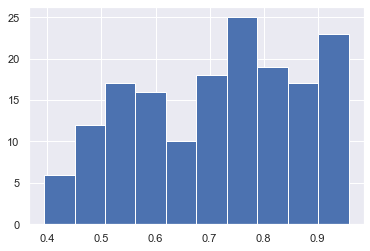

In [113]:
merged2019['HDI'].hist()

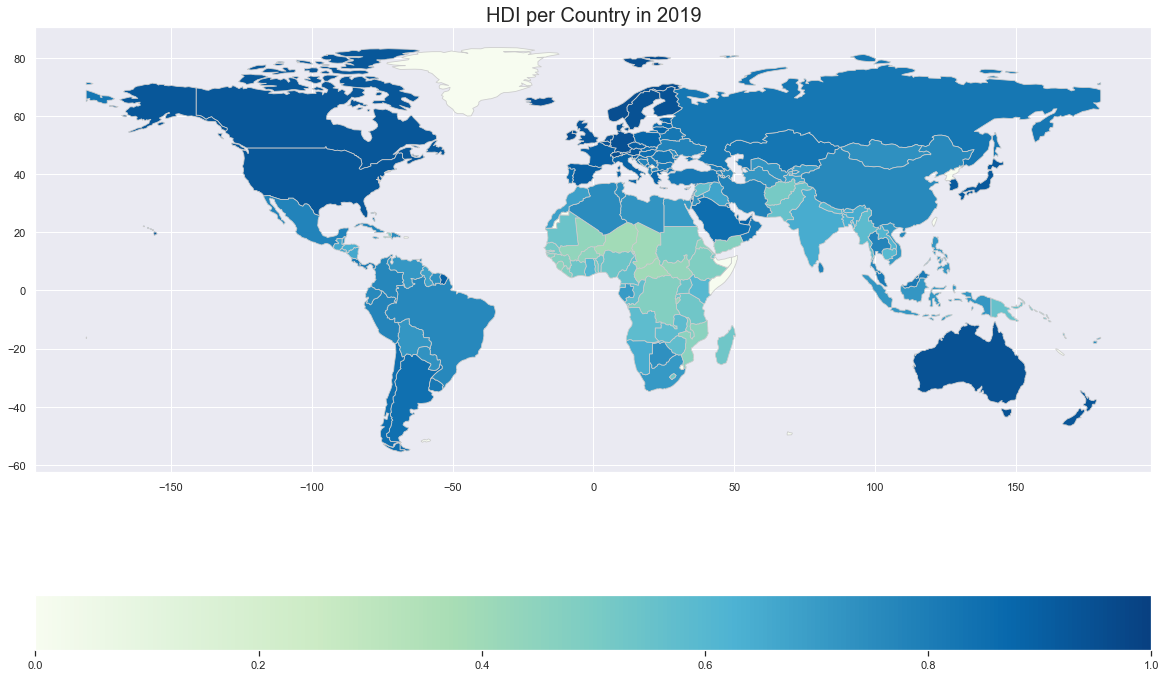

In [173]:
# Fill the NaN values with zero
merged2019.HDI.fillna(0, inplace=True)

# Creation of the map of HDI in 2019 
fig, ax = plt.subplots(1, figsize=(20, 15))
merged2019.plot(column='HDI',
            cmap='GnBu', 
            legend=True, 
            linewidth=0.8, 
            ax=ax, 
            edgecolor='0.8',
            vmin=0,
            vmax=1,
    
            legend_kwds={'orientation': "horizontal"})
ax.set_title('HDI per Country in 2019', fontsize=20)

plt.savefig('HDI per Country in 2019.jpg', dpi=300)
plt.show()

In [115]:
mask1990 = (df1['year']=='1990') 
df1990 = df1.loc[mask1990]

In [116]:
df1990.Country=df1990.Country.map(lambda x: dct.get(x,x))

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [118]:
# Creation of a pivot table with the values 
data1990=df1990.pivot_table(index="Country",
                        values=['HDI', 'life', 'school_index', 'gni per capita']
                           ).sort_values('HDI', ascending=False).reset_index()

In [119]:
# Merge the table world with the table HDI 
merged1990 = world.set_index('name').join(data1990.set_index('Country'))

<AxesSubplot:>

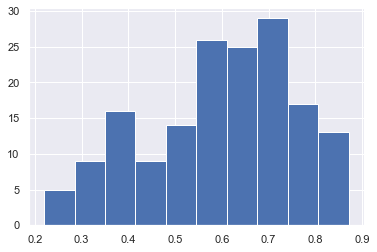

In [120]:
merged1990.HDI.hist()

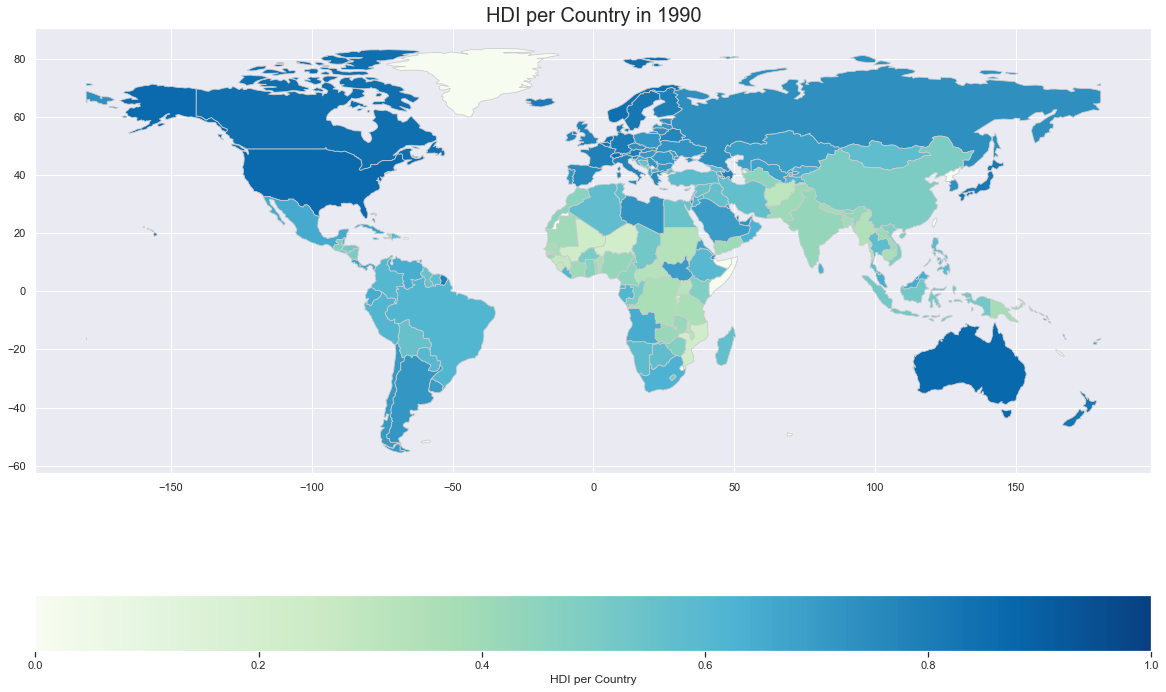

In [121]:
# Fill the NaN values with zero
merged1990.HDI.fillna(0, inplace=True)

# Creation of the map of HDI in 1990 
fig, ax = plt.subplots(1, figsize=(20, 15))
merged1990.plot(column='HDI',
            cmap='GnBu', 
            legend=True, 
            linewidth=0.8, 
            ax=ax, 
            edgecolor='0.8',
            vmin=0,
            vmax=1,
            legend_kwds={'label': "HDI per Country", 'orientation': "horizontal"})
ax.set_title('HDI per Country in 1990', fontsize=20)

plt.savefig('HDI per Country in 1990.jpg', dpi=300)
plt.show()

## Life Expectancy maps creation

<AxesSubplot:>

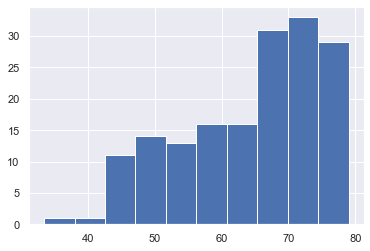

In [122]:
merged1990['life'].hist()

<AxesSubplot:>

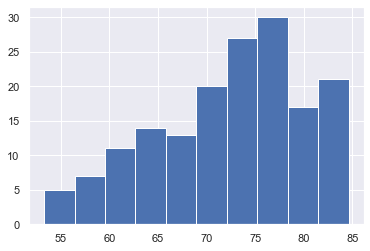

In [123]:
merged2019['life'].hist()

In [124]:
# What are the min and max values (to create low and high limits)
print(merged1990['life'].min())
print(merged1990['life'].max())
print(merged2019['life'].min())
print(merged2019['life'].max())

33.4
79.0
53.3
84.6


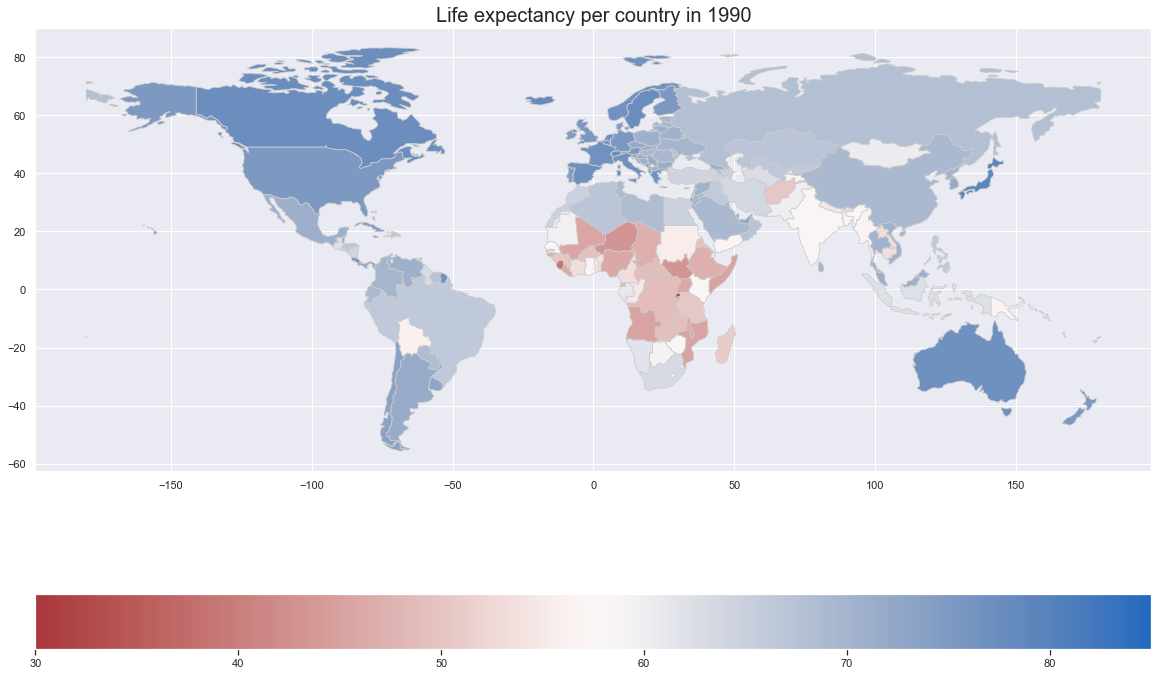

In [125]:
# Creation of the map for life expectancy in 1990
fig, ax = plt.subplots(1, figsize=(20, 15))
merged1990.plot(column='life',
            cmap='vlag_r', 
            legend=True, 
            linewidth=0.8, 
            ax=ax, 
            edgecolor='0.8',
            vmin=30,
            vmax=85,
            legend_kwds={'orientation': "horizontal"})

ax.set_title('Life expectancy per country in 1990', fontsize=20)

plt.savefig('Life expectancy per country in 1990.jpg', dpi=300)
plt.show()

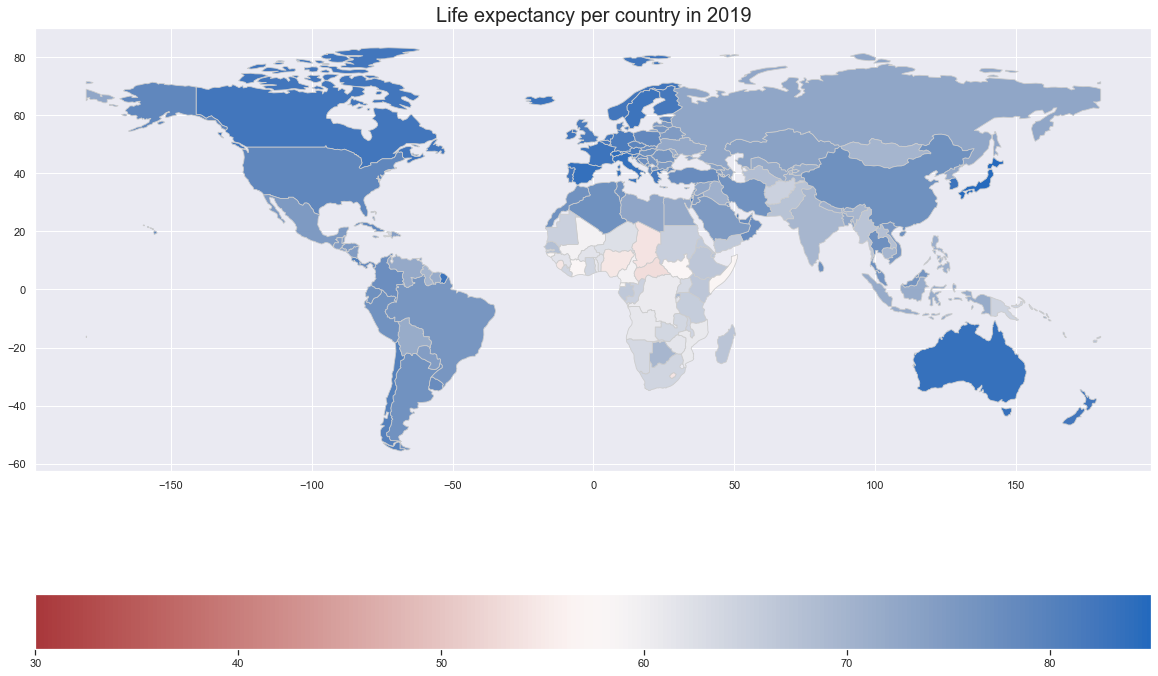

In [126]:
# Creation of the map for life expectancy in 2019
fig, ax = plt.subplots(1, figsize=(20, 15))
merged2019.plot(column='life',
            cmap='vlag_r', 
            legend=True, 
            linewidth=0.8, 
            ax=ax, 
            edgecolor='0.8',
            vmin=30,
            vmax=85,
            legend_kwds={'orientation': "horizontal"})

ax.set_title('Life expectancy per country in 2019', fontsize=20)

plt.savefig('Life expectancy per country in 2019.jpg', dpi=300)
plt.savefig('Life expectancy per country in 2019.pdf', dpi=300)
plt.show()

## School Index Map creation

<AxesSubplot:>

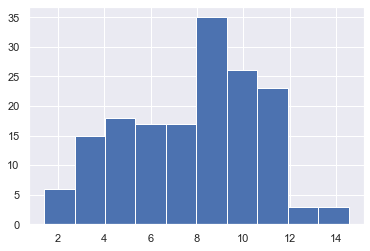

In [128]:
merged1990['school_index'].hist()

<AxesSubplot:>

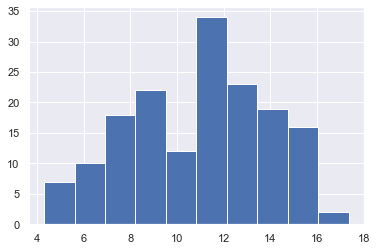

In [129]:
merged2019['school_index'].hist()

In [130]:
# What are the min and max values (to create low and high limits)
print(merged1990['school_index'].min())
print(merged1990['school_index'].max())
print(merged2019['school_index'].min())
print(merged2019['school_index'].max())

1.4
14.549999999999999
4.3
17.35


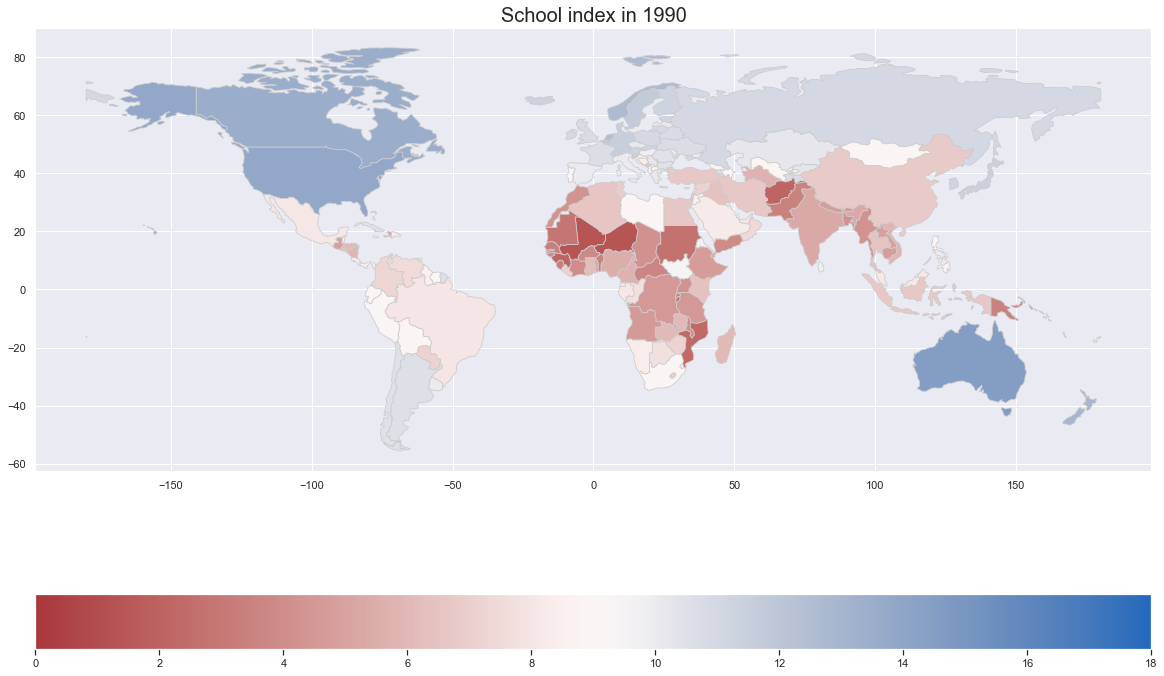

In [132]:
# Creation of the map for school index in 1990
fig, ax = plt.subplots(1, figsize=(20, 15))
merged1990.plot(column='school_index',
            cmap='vlag_r', 
            legend=True, 
            linewidth=0.8, 
            ax=ax, 
            edgecolor='0.8',
            vmin=0,
            vmax=18,
            legend_kwds={'orientation': "horizontal"})
ax.set_title('School index in 1990', fontsize=20)

plt.savefig('School index in 1990.jpg', dpi=300)
plt.show()

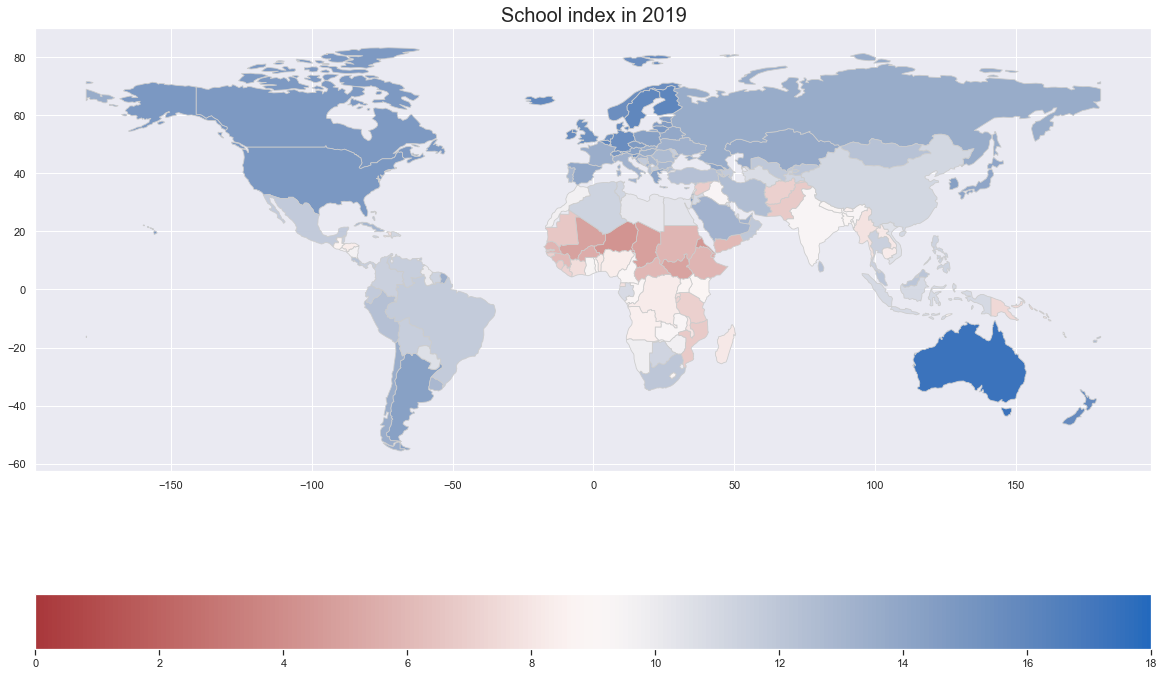

In [133]:
# Creation of the map for school index in 2019
fig, ax = plt.subplots(1, figsize=(20, 15))
merged2019.plot(column='school_index',
            cmap='vlag_r', 
            legend=True, 
            linewidth=0.8, 
            ax=ax, 
            edgecolor='0.8',
            vmin=0,
            vmax=18,
            legend_kwds={'orientation': "horizontal"})
ax.set_title('School index in 2019', fontsize=20)

plt.savefig('School index in 2019.jpg', dpi=300)
plt.show()

## GNI per capita map creation

<AxesSubplot:>

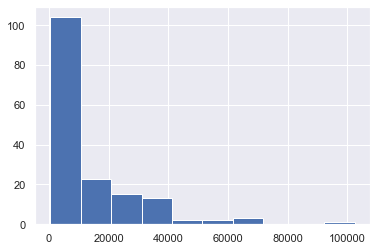

In [134]:
merged1990['gni per capita'].hist()

<AxesSubplot:>

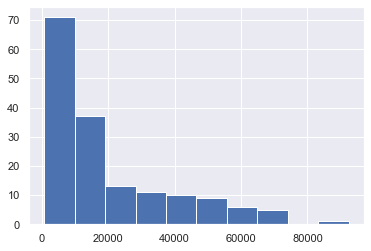

In [135]:
merged2019['gni per capita'].hist()

In [136]:
# What are the min and max values (to create low and high limits)
print(merged1990['gni per capita'].min())
print(merged1990['gni per capita'].max())
print(merged2019['gni per capita'].min())
print(merged2019['gni per capita'].max())

458.5
102433.2
753.9
92418.2


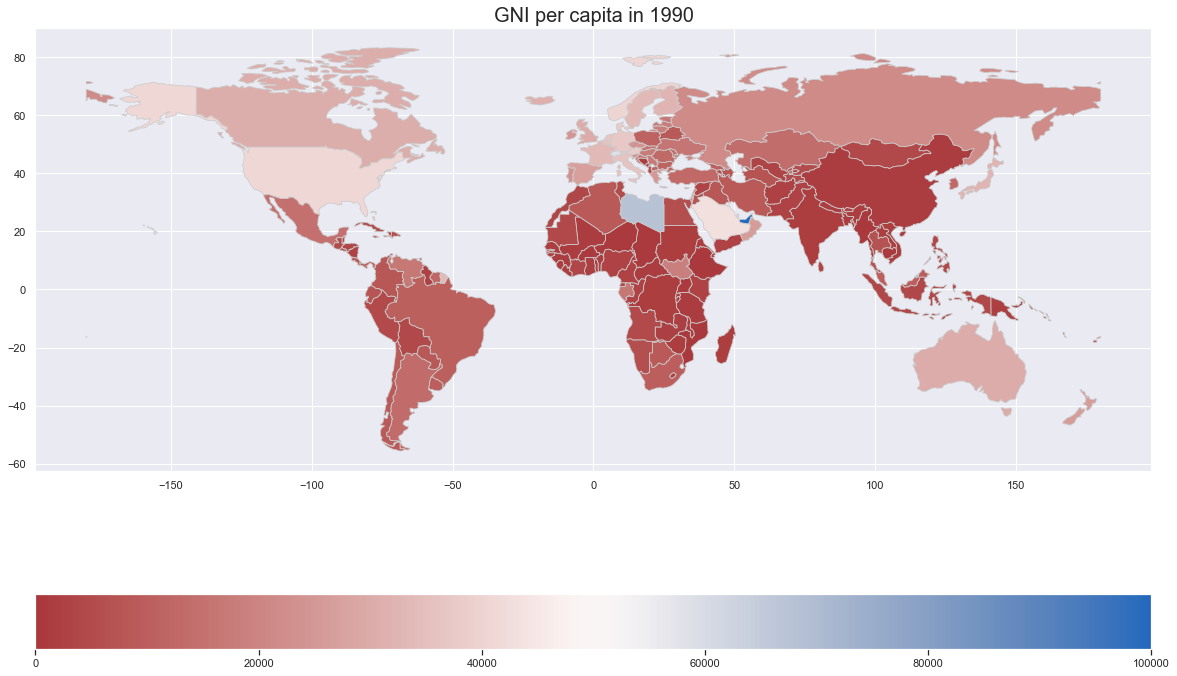

In [137]:
# Creation of the map for GNI per capita in 1990
fig, ax = plt.subplots(1, figsize=(20, 15))
merged1990.plot(column='gni per capita',
            cmap='vlag_r', 
            legend=True, 
            linewidth=0.8, 
            ax=ax, 
            edgecolor='0.8',
            vmin=0,
            vmax=100000,
            legend_kwds={'orientation': "horizontal"})
ax.set_title('GNI per capita in 1990', fontsize=20)

plt.savefig('GNI per capita in 1990.jpg', dpi=300)
plt.show()

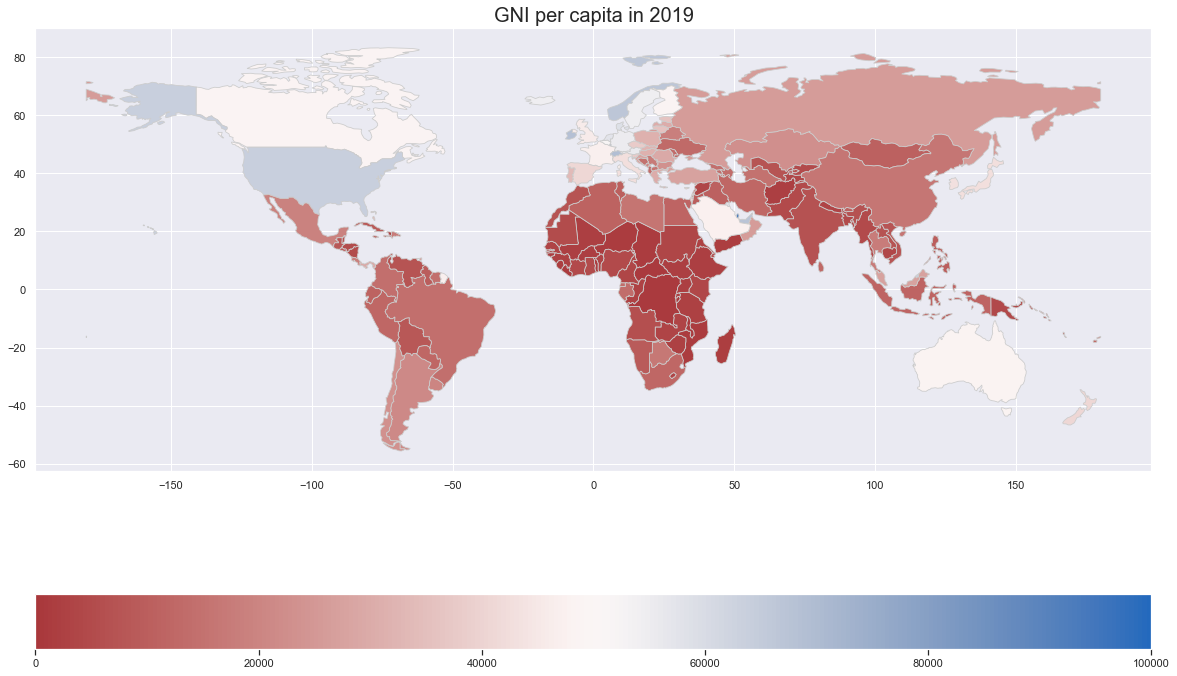

In [138]:
# Creation of the map for GNI per capita in 1990
fig, ax = plt.subplots(1, figsize=(20, 15))
merged2019.plot(column='gni per capita',
            cmap='vlag_r', 
            legend=True, 
            linewidth=0.8, 
            ax=ax, 
            edgecolor='0.8',
            vmin=0,
            vmax=100000,
            legend_kwds={'orientation': "horizontal"})
ax.set_title('GNI per capita in 2019', fontsize=20)

plt.savefig('GNI per capita in 2019.jpg', dpi=300)
plt.show()

In [139]:
df.isna().sum()

HDI                150
life                90
school expected     30
school mean        120
gni per capita      90
dtype: int64

# Create DataFrame for every continent

In [140]:
world

pop_est      continent                      name iso_a3  gdp_md_est  \
0       920938        Oceania                      Fiji    FJI      8374.0   
1     53950935         Africa                  Tanzania    TZA    150600.0   
2       603253         Africa                 W. Sahara    ESH       906.5   
3     35623680  North America                    Canada    CAN   1674000.0   
4    326625791  North America  United States of America    USA  18560000.0   
..         ...            ...                       ...    ...         ...   
172    7111024         Europe                    Serbia    SRB    101800.0   
173     642550         Europe                Montenegro    MNE     10610.0   
174    1895250         Europe                    Kosovo    -99     18490.0   
175    1218208  North America       Trinidad and Tobago    TTO     43570.0   
176   13026129         Africa                  S. Sudan    SSD     20880.0   

                                              geometry  
0    MULTIPOLYGON (((180.00000 -16.06713, 180.00000...  
1    POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...  
2    POLYGON ((-8.66559 27.65643, -8.66512 27.58948...  
3    MULTIPOLYGON (((-122.84000 49.00000, -122.9742...  
4    MULTIPOLYGON (((-122.84000 49.00000, -120.0000...  
..                                                 ...  
172  POLYGON ((18.82982 45.90887, 18.82984 45.90888...  
173  POLYGON ((20.07070 42.58863, 19.80161 42.50009...  
174  POLYGON ((20.59025 41.85541, 20.52295 42.21787...  
175  POLYGON ((-61.68000 10.76000, -61.10500 10.890...  
176  POLYGON ((30.83385 3.50917, 29.95350 4.17370, ...  

[176 rows x 6 columns]

In [141]:
europe=world[(world.continent=='Europe')]

In [142]:
df2=df1.merge(world, how="left", left_on="Country", right_on="name")

In [143]:
df2.head()

Country  year    HDI  life  school_index  gni per capita     pop_est  \
0  Afghanistan  1990  0.302  50.3          2.05          2477.9  34124811.0   
1  Afghanistan  1991  0.307  51.0          2.25          2059.9  34124811.0   
2  Afghanistan  1992  0.316  51.6          2.40          1921.7  34124811.0   
3  Afghanistan  1993  0.312  52.3          2.65          1320.5  34124811.0   
4  Afghanistan  1994  0.307  52.8          2.85           950.9  34124811.0   

  continent         name iso_a3  gdp_md_est  \
0      Asia  Afghanistan    AFG     64080.0   
1      Asia  Afghanistan    AFG     64080.0   
2      Asia  Afghanistan    AFG     64080.0   
3      Asia  Afghanistan    AFG     64080.0   
4      Asia  Afghanistan    AFG     64080.0   

                                            geometry  
0  POLYGON ((66.51861 37.36278, 67.07578 37.35614...  
1  POLYGON ((66.51861 37.36278, 67.07578 37.35614...  
2  POLYGON ((66.51861 37.36278, 67.07578 37.35614...  
3  POLYGON ((66.51861 37.36278, 67.07578 37.35614...  
4  POLYGON ((66.51861 37.36278, 67.07578 37.35614...

In [144]:
df2.columns

Index(['Country', 'year', 'HDI', 'life', 'school_index', 'gni per capita',
       'pop_est', 'continent', 'name', 'iso_a3', 'gdp_md_est', 'geometry'],
      dtype='object')

In [145]:
df2.drop(['name', 'iso_a3', 'geometry'], axis=1, inplace=True)

In [146]:
df2.continent.unique()

array(['Asia', 'Europe', 'Africa', nan, 'South America', 'Oceania',
       'North America'], dtype=object)

In [147]:
asia=df2[df2.continent=='Asia']

In [148]:
asia.head()

Country  year    HDI  life  school_index  gni per capita     pop_est  \
0  Afghanistan  1990  0.302  50.3          2.05          2477.9  34124811.0   
1  Afghanistan  1991  0.307  51.0          2.25          2059.9  34124811.0   
2  Afghanistan  1992  0.316  51.6          2.40          1921.7  34124811.0   
3  Afghanistan  1993  0.312  52.3          2.65          1320.5  34124811.0   
4  Afghanistan  1994  0.307  52.8          2.85           950.9  34124811.0   

  continent  gdp_md_est  
0      Asia     64080.0  
1      Asia     64080.0  
2      Asia     64080.0  
3      Asia     64080.0  
4      Asia     64080.0

In [149]:
europe=df2[df2.continent=='Europe']

In [150]:
europe.head()

Country  year    HDI  life  school_index  gni per capita    pop_est  \
30  Albania  1990  0.650  71.8          9.70          4937.5  3047987.0   
31  Albania  1991  0.631  71.8          9.80          3496.4  3047987.0   
32  Albania  1992  0.615  71.8          9.25          3207.6  3047987.0   
33  Albania  1993  0.618  71.9          8.95          3684.6  3047987.0   
34  Albania  1994  0.624  72.0          8.95          4102.6  3047987.0   

   continent  gdp_md_est  
30    Europe     33900.0  
31    Europe     33900.0  
32    Europe     33900.0  
33    Europe     33900.0  
34    Europe     33900.0

In [151]:
africa=df2[df2.continent=='Africa']

In [152]:
africa.head()

Country  year    HDI  life  school_index  gni per capita     pop_est  \
60  Algeria  1990  0.572  66.9          6.60          8596.8  40969443.0   
61  Algeria  1991  0.576  67.3          6.75          8205.8  40969443.0   
62  Algeria  1992  0.582  67.6          6.90          8161.6  40969443.0   
63  Algeria  1993  0.586  67.9          7.05          7830.0  40969443.0   
64  Algeria  1994  0.590  68.2          7.20          7543.1  40969443.0   

   continent  gdp_md_est  
60    Africa    609400.0  
61    Africa    609400.0  
62    Africa    609400.0  
63    Africa    609400.0  
64    Africa    609400.0

In [153]:
south_am=df2[df2.continent=='South America']

In [154]:
oceania=df2[df2.continent=='Oceania']

In [155]:
north_am=df2[df2.continent=='North America']

In [156]:
asia.isna().sum()

Country           0
year              0
HDI               0
life              0
school_index      0
gni per capita    0
pop_est           0
continent         0
gdp_md_est        0
dtype: int64

In [157]:
europe.isna().sum()

Country           0
year              0
HDI               0
life              0
school_index      0
gni per capita    0
pop_est           0
continent         0
gdp_md_est        0
dtype: int64

In [158]:
africa.isna().sum()

Country            0
year               0
HDI               30
life               0
school_index      30
gni per capita    30
pop_est            0
continent          0
gdp_md_est         0
dtype: int64

In [159]:
nas={i:africa.iloc[i].isna().sum() for i in range(len(africa.index)) 
     if africa.iloc[i].isna().sum()/africa.shape[1]>0}

In [160]:
africa=africa.dropna()

In [161]:
south_am.isna().sum()

Country           0
year              0
HDI               0
life              0
school_index      0
gni per capita    0
pop_est           0
continent         0
gdp_md_est        0
dtype: int64

In [162]:
oceania.isna().sum()

Country           0
year              0
HDI               0
life              0
school_index      0
gni per capita    0
pop_est           0
continent         0
gdp_md_est        0
dtype: int64

In [163]:
north_am.isna().sum()

Country           0
year              0
HDI               0
life              0
school_index      0
gni per capita    0
pop_est           0
continent         0
gdp_md_est        0
dtype: int64

In [164]:
europe.head()

Country  year    HDI  life  school_index  gni per capita    pop_est  \
30  Albania  1990  0.650  71.8          9.70          4937.5  3047987.0   
31  Albania  1991  0.631  71.8          9.80          3496.4  3047987.0   
32  Albania  1992  0.615  71.8          9.25          3207.6  3047987.0   
33  Albania  1993  0.618  71.9          8.95          3684.6  3047987.0   
34  Albania  1994  0.624  72.0          8.95          4102.6  3047987.0   

   continent  gdp_md_est  
30    Europe     33900.0  
31    Europe     33900.0  
32    Europe     33900.0  
33    Europe     33900.0  
34    Europe     33900.0

In [167]:
df2019.head()

Country  year    HDI  life  school_index  gni per capita
29   Afghanistan  2019  0.511  64.8          7.05          2229.4
59       Albania  2019  0.795  78.6         12.40         13998.3
89       Algeria  2019  0.748  76.9         11.30         11174.0
119      Andorra  2019  0.868  81.9         11.90         56000.3
149       Angola  2019  0.581  61.1          8.50          6104.1

In [168]:
europe2019=europe[(europe.year=='2019')]

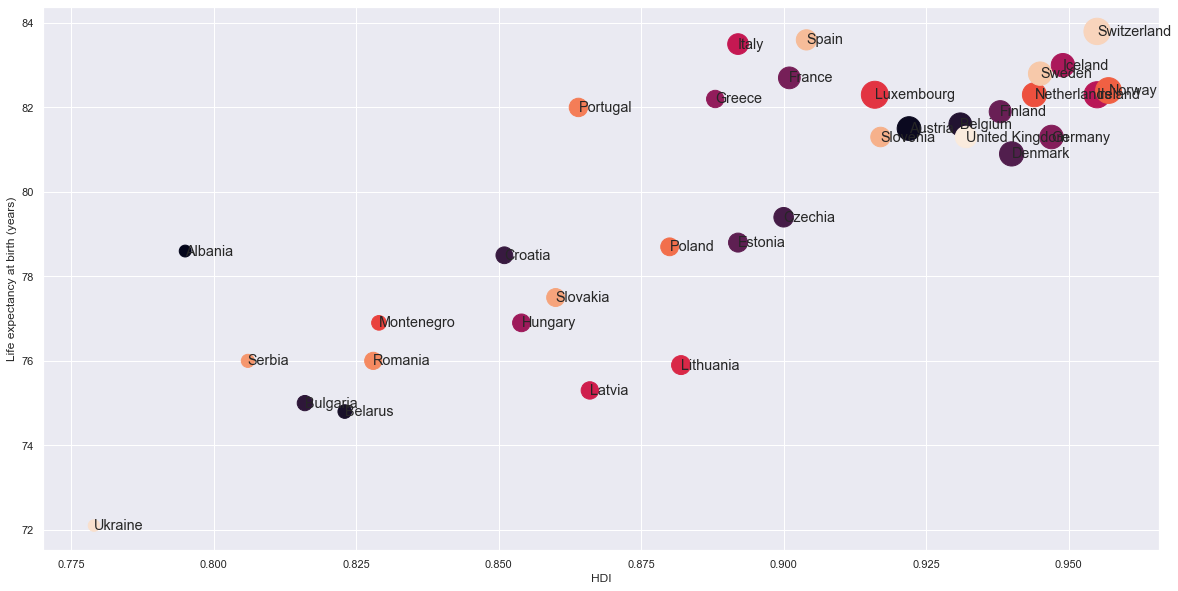

In [171]:
countries = europe2019.Country
# HDI in Europe in 2019
HDI = europe2019.HDI
# Life expectancy at birth, years
life_expectancy = europe2019.life
# Per person income fixed to US Dollars in 2019
GNI = europe2019['gni per capita']

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
# Some random colours: 
colours = range(len(countries))
ax.scatter(HDI,life_expectancy, c=colours, s=GNI/100)
ax.set_xlabel('HDI')
ax.set_ylabel('Life expectancy at birth (years)')


offset = 0
for x, y, s, country in zip(HDI, life_expectancy, GNI, countries):
    ax.text(x+offset, y, country, va='center', fontsize='large')
    
plt.show()

# Modeling

In [175]:
df2019.isna().sum()

Country           0
year              0
HDI               5
life              3
school_index      5
gni per capita    3
dtype: int64

In [313]:
df2019=df2019.dropna()
df2019=df2019.sample(frac=1)

In [314]:
X=df2019.drop(['Country', 'year', 'HDI'], axis=1)
y=df2019.HDI

In [315]:
sm.OLS(y, sm.add_constant(X.astype(float))).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    HDI   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     2680.
Date:                Fri, 18 Dec 2020   Prob (F-statistic):          3.94e-152
Time:                        10:46:20   Log-Likelihood:                 449.73
No. Observations:                 189   AIC:                            -891.5
Df Residuals:                     185   BIC:                            -878.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.1149      0.023     -5.029      0.000      -0.160      -0.070
life               0.0066      0.000     16.017      0.000       0.006       0.007
school_index       0.0307      0.001     29.121      0.000       0.029       0.033
gni per capita  1.075e-06   1.14e-07      9.444      0.000    8.51e-07     1.3e-06
==============================================================================
Omnibus:                       19.323   Durbin-Watson:                   1.798
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.844
Skew:                          -0.692   Prob(JB):                     6.64e-06
Kurtosis:                       4.054   Cond. No.                     4.06e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.06e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [316]:
tester=atols(X,y)

Fitting linear regression

R^2: 0.9775078218800964 

Coefficients
-------------------------------------
Intercept: -0.11485496443637311
life: 0.01
school_index: 0.03
gni per capita: 0.0

Assumption 1: Linear Relationship between the Target and the Features
Checking with a scatter plot of actual vs. predicted. Predictions should follow the diagonal line.


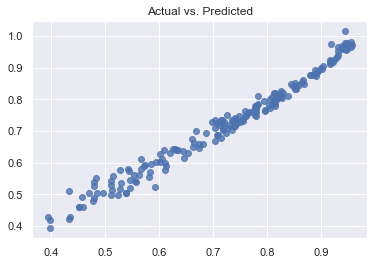

If non-linearity is apparent, consider adding a polynomial term 
		or using box-cox transformation to make X or y follow normal distribution



Building a correlation table


Parameters that are most likely VIOLATE linearity assumption and their correlation with HDI


Series([], Name: HDI, dtype: float64)


Parameters that are most likely FOLLOW linearity assumption and their correlation with HDI


life              0.910637
school_index      0.958475
gni per capita    0.786641
Name: HDI, dtype: float64


Assumption 2: Little to no multicollinearity among predictors


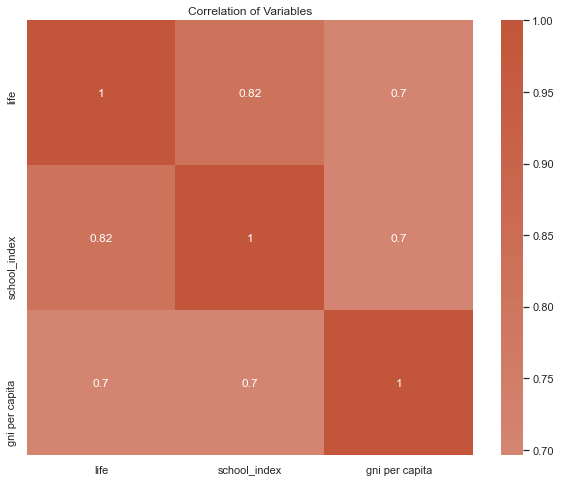

Variance Inflation Factors (VIF)
> 10: An indication that multicollinearity may be present
> 100: Certain multicollinearity among the variables
-------------------------------------
school_index: 46.09574399289522
life: 37.26216321275085
gni per capita: 3.2498502444537523

2 cases of possible multicollinearity
0 cases of definite multicollinearity

Assumption possibly satisfied

Coefficient interpretability may be problematic
Consider removing variables with a high Variance Inflation Factor (VIF)

Assumption 3: No Autocorrelation

Performing Durbin-Watson Test
Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data
0 to 2< is positive autocorrelation
>2 to 4 is negative autocorrelation
-------------------------------------
Durbin-Watson: 2.0513705180048265
Little to no autocorrelation 

Assumption satisfied

Assumption 4: Homoskedasticity of Error Terms
Residuals should have relative constant variance


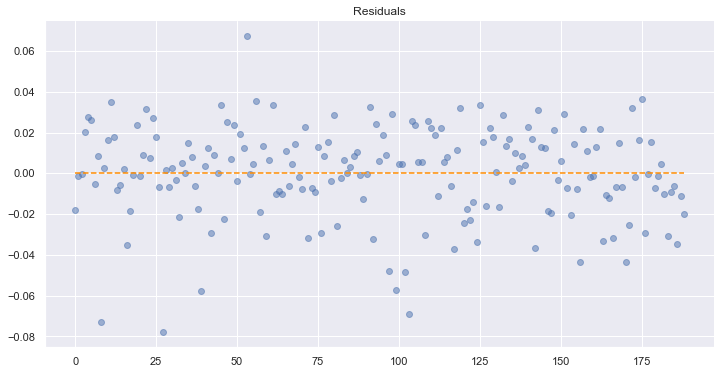

If heteroskedasticity is apparent, confidence intervals and predictions will be affected

Consider removing outliers and preprocessing features - nonlinear transformation can help


{'Lagrange Multiplier': 44.69648806716585,
 'pvalue for LM': 1.9691596858782812e-10,
 'F stats': 19.203844889472443,
 'pvalue for Fstats': 6.830103235080199e-11}

Signs of positive autocorrelation 

Assumption potentially not satisfied 


Assumption 5: The error terms are kinda normally distributed

Using the Anderson-Darling test for normal distribution
p-value from the test - below 0.05 generally means non-normal: 0.0005690881082789431
Residuals are not normally distributed


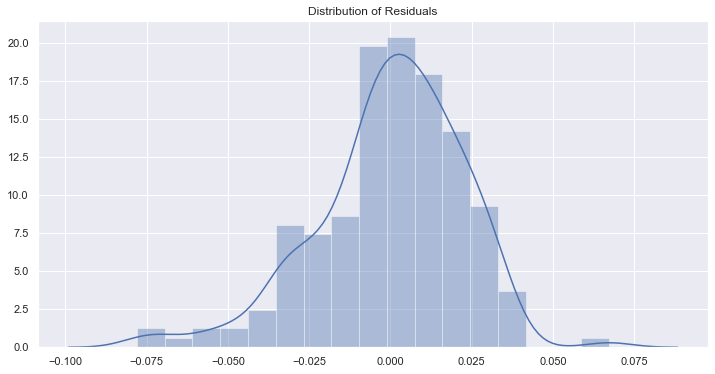


Assumption not satisfied

Confidence intervals will likely be affected
Try performing nonlinear transformations on variables
Building a probability plot


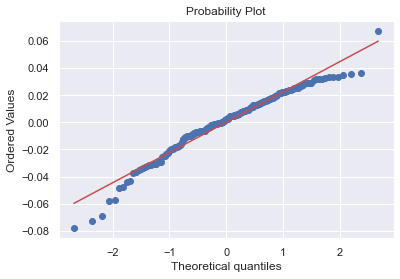


In fact outliers are super significant. Probably it is better to split your dataset into 2 different ones.


{'Satisfied': ['Linearity', 'Autocorrelation'],
 'Potentially': ['Multicollinearity', 'Autocorrelation'],
 'Violated': ['Normality', 'Sub-Normality']}

In [312]:
tester.run_all()

In [181]:
os.chdir('C:\\Users\\mcoge\\Project-HDI')

In [182]:
os.listdir()

['.git',
 '.ipynb_checkpoints',
 'Assumptions.py',
 'Cleaning csv used for calculations.ipynb',
 'data',
 'ecological_footprint.csv',
 'Exploratory data analysis.ipynb',
 'Human Development Index since 1990.ipynb',
 'IDH 2109.csv',
 'Life expectancy per country in 2019.pdf',
 'Natural ressources depletion.ipynb',
 'README.md',
 'Visualizations',
 'Webscraping Ecological FootPrint.ipynb',
 '__pycache__']

In [183]:
tester=atols(X,y)

Fitting linear regression

R^2: 0.9775078218800964 

Coefficients
-------------------------------------
Intercept: -0.11485496443637311
life: 0.01
school_index: 0.03
gni per capita: 0.0

Assumption 1: Linear Relationship between the Target and the Features
Checking with a scatter plot of actual vs. predicted. Predictions should follow the diagonal line.


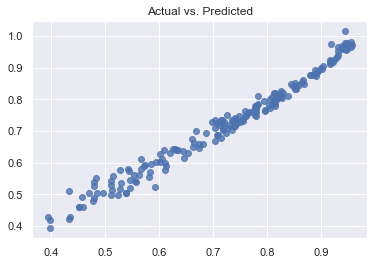

If non-linearity is apparent, consider adding a polynomial term 
		or using box-cox transformation to make X or y follow normal distribution



Building a correlation table


Parameters that are most likely VIOLATE linearity assumption and their correlation with HDI


Series([], Name: HDI, dtype: float64)


Parameters that are most likely FOLLOW linearity assumption and their correlation with HDI


life              0.910637
school_index      0.958475
gni per capita    0.786641
Name: HDI, dtype: float64


Assumption 2: Little to no multicollinearity among predictors


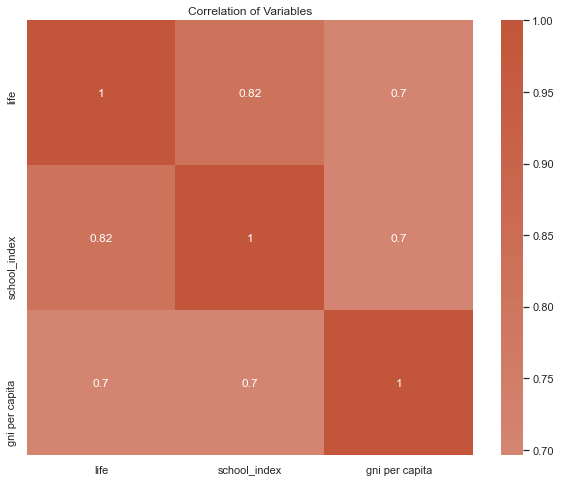

Variance Inflation Factors (VIF)
> 10: An indication that multicollinearity may be present
> 100: Certain multicollinearity among the variables
-------------------------------------
school_index: 46.09574399289522
life: 37.26216321275085
gni per capita: 3.2498502444537523

2 cases of possible multicollinearity
0 cases of definite multicollinearity

Assumption possibly satisfied

Coefficient interpretability may be problematic
Consider removing variables with a high Variance Inflation Factor (VIF)

Assumption 3: No Autocorrelation

Performing Durbin-Watson Test
Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data
0 to 2< is positive autocorrelation
>2 to 4 is negative autocorrelation
-------------------------------------
Durbin-Watson: 2.0513705180048265
Little to no autocorrelation 

Assumption satisfied

Assumption 4: Homoskedasticity of Error Terms
Residuals should have relative constant variance


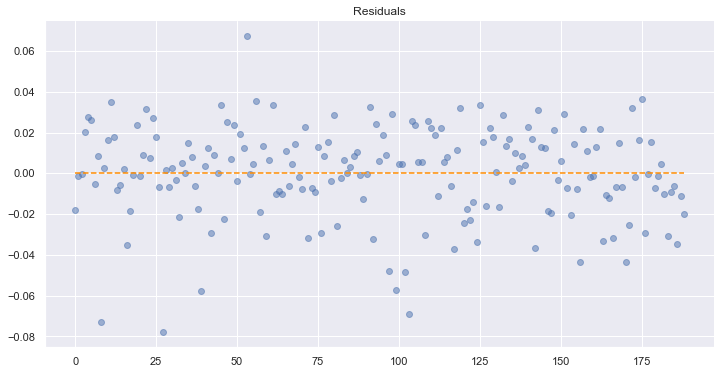

If heteroskedasticity is apparent, confidence intervals and predictions will be affected

Consider removing outliers and preprocessing features - nonlinear transformation can help


{'Lagrange Multiplier': 44.69648806716585,
 'pvalue for LM': 1.9691596858782812e-10,
 'F stats': 19.203844889472443,
 'pvalue for Fstats': 6.830103235080199e-11}

Signs of positive autocorrelation 

Assumption potentially not satisfied 


Assumption 5: The error terms are kinda normally distributed

Using the Anderson-Darling test for normal distribution
p-value from the test - below 0.05 generally means non-normal: 0.0005690881082789431
Residuals are not normally distributed


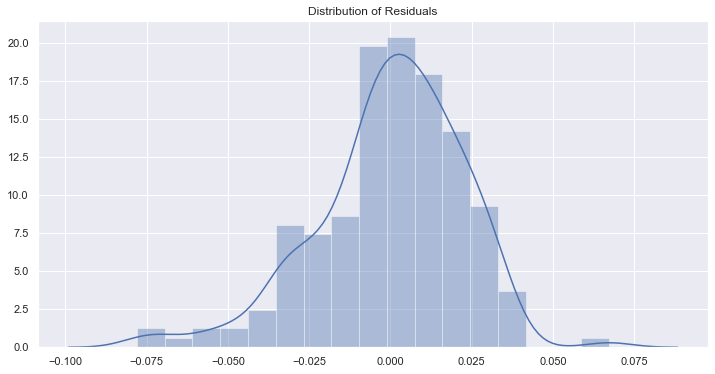


Assumption not satisfied

Confidence intervals will likely be affected
Try performing nonlinear transformations on variables
Building a probability plot


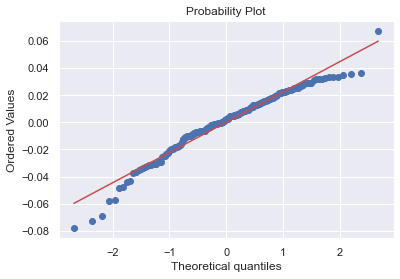


In fact outliers are super significant. Probably it is better to split your dataset into 2 different ones.


{'Satisfied': ['Linearity', 'Autocorrelation'],
 'Potentially': ['Multicollinearity', 'Autocorrelation'],
 'Violated': ['Normality', 'Sub-Normality']}

In [184]:
tester.run_all()

In [185]:
dftest2=df1.dropna()

In [186]:
dftest2.columns

Index(['Country', 'year', 'HDI', 'life', 'school_index', 'gni per capita'], dtype='object')

In [187]:
X=dftest2.drop(['Country', 'year', 'HDI'], axis=1)
y=dftest2.HDI

In [188]:
sm.OLS(y, sm.add_constant(X.drop(['school mean'], axis=1).astype(float))).fit().summary()

KeyError: "['school mean'] not found in axis"

In [189]:
tester=atols(X.drop(['school mean'], axis=1),y)

KeyError: "['school mean'] not found in axis"

Fitting linear regression

R^2: 0.9775078218800964 

Coefficients
-------------------------------------
Intercept: -0.11485496443637311
life: 0.01
school_index: 0.03
gni per capita: 0.0

Assumption 1: Linear Relationship between the Target and the Features
Checking with a scatter plot of actual vs. predicted. Predictions should follow the diagonal line.


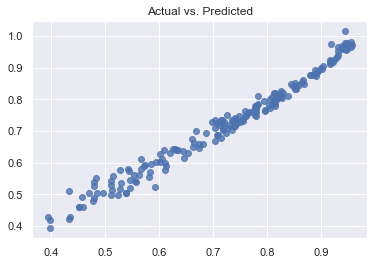

If non-linearity is apparent, consider adding a polynomial term 
		or using box-cox transformation to make X or y follow normal distribution



Building a correlation table


Parameters that are most likely VIOLATE linearity assumption and their correlation with HDI


Series([], Name: HDI, dtype: float64)


Parameters that are most likely FOLLOW linearity assumption and their correlation with HDI


life              0.910637
school_index      0.958475
gni per capita    0.786641
Name: HDI, dtype: float64


Assumption 2: Little to no multicollinearity among predictors


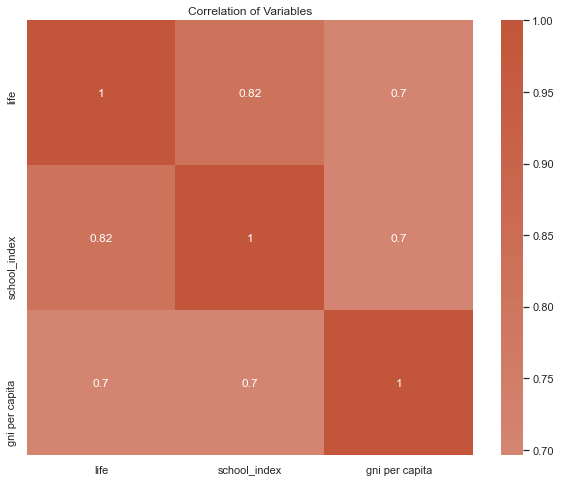

Variance Inflation Factors (VIF)
> 10: An indication that multicollinearity may be present
> 100: Certain multicollinearity among the variables
-------------------------------------
school_index: 46.09574399289522
life: 37.26216321275085
gni per capita: 3.2498502444537523

2 cases of possible multicollinearity
0 cases of definite multicollinearity

Assumption possibly satisfied

Coefficient interpretability may be problematic
Consider removing variables with a high Variance Inflation Factor (VIF)

Assumption 3: No Autocorrelation

Performing Durbin-Watson Test
Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data
0 to 2< is positive autocorrelation
>2 to 4 is negative autocorrelation
-------------------------------------
Durbin-Watson: 2.0513705180048265
Little to no autocorrelation 

Assumption satisfied

Assumption 4: Homoskedasticity of Error Terms
Residuals should have relative constant variance


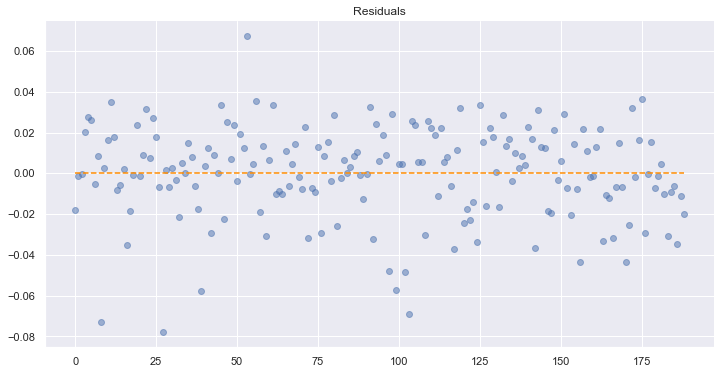

If heteroskedasticity is apparent, confidence intervals and predictions will be affected

Consider removing outliers and preprocessing features - nonlinear transformation can help


{'Lagrange Multiplier': 44.69648806716585,
 'pvalue for LM': 1.9691596858782812e-10,
 'F stats': 19.203844889472443,
 'pvalue for Fstats': 6.830103235080199e-11}

Signs of positive autocorrelation 

Assumption potentially not satisfied 


Assumption 5: The error terms are kinda normally distributed

Using the Anderson-Darling test for normal distribution
p-value from the test - below 0.05 generally means non-normal: 0.0005690881082789431
Residuals are not normally distributed


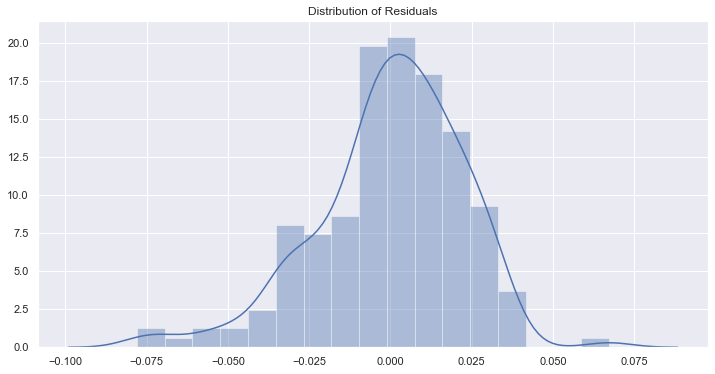


Assumption not satisfied

Confidence intervals will likely be affected
Try performing nonlinear transformations on variables
Building a probability plot


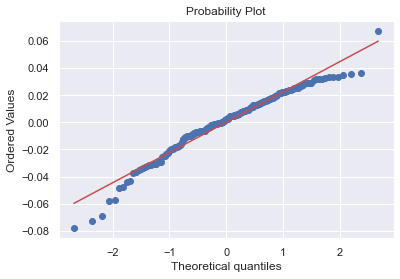


In fact outliers are super significant. Probably it is better to split your dataset into 2 different ones.


{'Satisfied': ['Linearity', 'Autocorrelation', 'Linearity', 'Autocorrelation'],
 'Potentially': ['Multicollinearity',
  'Autocorrelation',
  'Multicollinearity',
  'Autocorrelation'],
 'Violated': ['Normality', 'Sub-Normality', 'Normality', 'Sub-Normality']}

In [190]:
tester.run_all()

# Modeling for Europe

In [191]:
europe.columns

Index(['Country', 'year', 'HDI', 'life', 'school_index', 'gni per capita',
       'pop_est', 'continent', 'gdp_md_est'],
      dtype='object')

In [192]:
X=europe.drop(['Country', 'year', 'HDI', 'continent'], axis=1)
y=europe.HDI

In [193]:
sm.OLS(y, sm.add_constant(X.drop(['pop_est'], axis=1).astype(float))).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    HDI   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     5730.
Date:                Fri, 18 Dec 2020   Prob (F-statistic):               0.00
Time:                        10:02:53   Log-Likelihood:                 2737.1
No. Observations:                1020   AIC:                            -5464.
Df Residuals:                    1015   BIC:                            -5439.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0649      0.015      4.404      0.000       0.036       0.094
life               0.0048      0.000     22.010      0.000       0.004       0.005
school_index       0.0272      0.000     71.473      0.000       0.026       0.028
gni per capita  1.322e-06   4.57e-08     28.955      0.000    1.23e-06    1.41e-06
gdp_md_est      3.564e-09   5.95e-10      5.992      0.000     2.4e-09    4.73e-09
==============================================================================
Omnibus:                      658.323   Durbin-Watson:                   0.271
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            19985.654
Skew:                          -2.465   Prob(JB):                         0.00
Kurtosis:                      24.118   Cond. No.                     3.18e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.18e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Fitting linear regression

R^2: 0.957594812188675 

Coefficients
-------------------------------------
Intercept: 0.06486993665140994
life: 0.0
school_index: 0.03
gni per capita: 0.0
gdp_md_est: 0.0

Assumption 1: Linear Relationship between the Target and the Features
Checking with a scatter plot of actual vs. predicted. Predictions should follow the diagonal line.


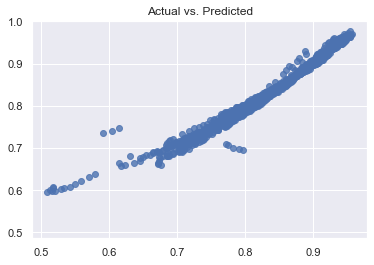

If non-linearity is apparent, consider adding a polynomial term 
		or using box-cox transformation to make X or y follow normal distribution



Building a correlation table


Parameters that are most likely VIOLATE linearity assumption and their correlation with HDI


Series([], Name: HDI, dtype: float64)


Parameters that are most likely FOLLOW linearity assumption and their correlation with HDI


life              0.814513
school_index      0.887007
gni per capita    0.804746
gdp_md_est        0.280934
Name: HDI, dtype: float64


Assumption 2: Little to no multicollinearity among predictors


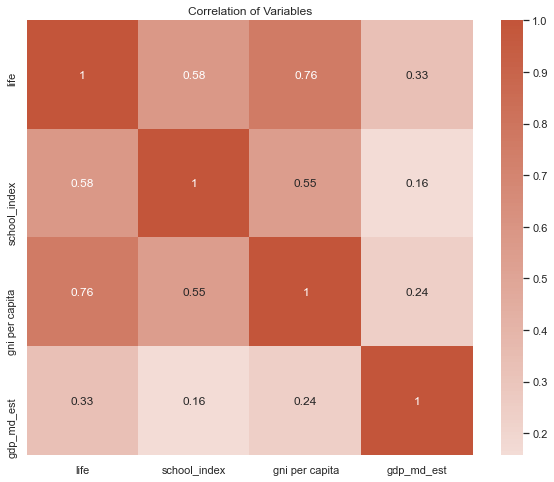

Variance Inflation Factors (VIF)
> 10: An indication that multicollinearity may be present
> 100: Certain multicollinearity among the variables
-------------------------------------
school_index: 90.3459197445419
life: 83.12141225343748
gni per capita: 5.719405932474279
gdp_md_est: 1.5603846281508431

2 cases of possible multicollinearity
0 cases of definite multicollinearity

Assumption possibly satisfied

Coefficient interpretability may be problematic
Consider removing variables with a high Variance Inflation Factor (VIF)

Assumption 3: No Autocorrelation

Performing Durbin-Watson Test
Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data
0 to 2< is positive autocorrelation
>2 to 4 is negative autocorrelation
-------------------------------------
Durbin-Watson: 0.2708047931886248
Signs of positive autocorrelation 

Assumption not satisfied 


Assumption 4: Homoskedasticity of Error Terms
Residuals should have relative constant variance


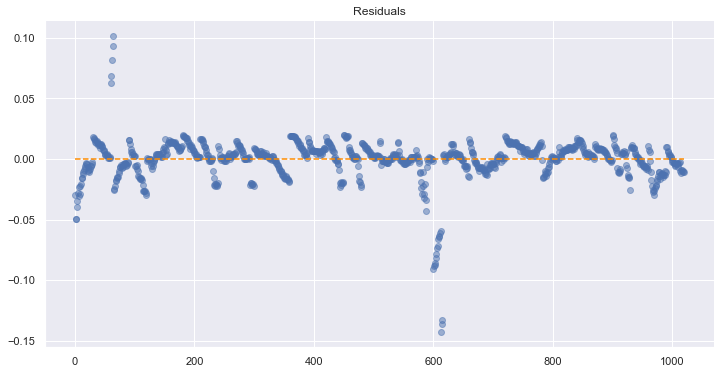

If heteroskedasticity is apparent, confidence intervals and predictions will be affected

Consider removing outliers and preprocessing features - nonlinear transformation can help


{'Lagrange Multiplier': 132.16496221086751,
 'pvalue for LM': 1.8471018026946305e-28,
 'F stats': 37.81096597083552,
 'pvalue for Fstats': 1.617481063119284e-29}

Signs of positive autocorrelation 

Assumption potentially not satisfied 


Assumption 5: The error terms are kinda normally distributed

Using the Anderson-Darling test for normal distribution
p-value from the test - below 0.05 generally means non-normal: 0.0
Residuals are not normally distributed


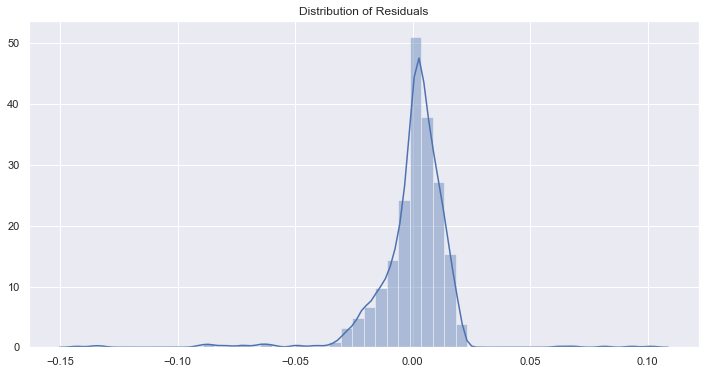


Assumption not satisfied

Confidence intervals will likely be affected
Try performing nonlinear transformations on variables
Building a probability plot


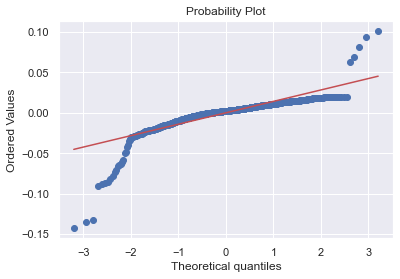


In your dataset you quite fat tails. You have 0.025 potential outliers (25 rows)


{'Satisfied': ['Linearity'],
 'Potentially': ['Multicollinearity', 'Autocorrelation', 'Sub-Normality'],
 'Violated': ['Autocorrelation', 'Normality']}

In [194]:
tester=atols(X.drop(['pop_est'], axis=1),y)

tester.run_all()

In [195]:
europe2019=europe[europe.year=='2019']
europe2019.head()

Country  year    HDI  life  school_index  gni per capita     pop_est  \
59    Albania  2019  0.795  78.6         12.40         13998.3   3047987.0   
299   Austria  2019  0.922  81.5         14.30         56196.9   8754413.0   
479   Belarus  2019  0.823  74.8         13.85         18546.5   9549747.0   
509   Belgium  2019  0.931  81.6         15.95         52084.6  11491346.0   
779  Bulgaria  2019  0.816  75.0         12.90         23324.7   7101510.0   

    continent  gdp_md_est  
59     Europe     33900.0  
299    Europe    416600.0  
479    Europe    165400.0  
509    Europe    508600.0  
779    Europe    143100.0

In [196]:
X=europe2019.drop(['Country', 'HDI', 'year', 'continent'], axis=1)
y=europe2019.HDI

In [197]:
sm.OLS(y, sm.add_constant(X.drop(['gdp_md_est','pop_est'], axis=1).astype(float))).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    HDI   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     492.4
Date:                Fri, 18 Dec 2020   Prob (F-statistic):           1.35e-25
Time:                        10:02:57   Log-Likelihood:                 119.65
No. Observations:                  34   AIC:                            -231.3
Df Residuals:                      30   BIC:                            -225.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1529      0.054      2.832      0.008       0.043       0.263
life               0.0051      0.001      7.605      0.000       0.004       0.006
school_index       0.0195      0.002     12.504      0.000       0.016       0.023
gni per capita  1.247e-06   1.47e-07      8.490      0.000    9.47e-07    1.55e-06
==============================================================================
Omnibus:                        3.309   Durbin-Watson:                   2.118
Prob(Omnibus):                  0.191   Jarque-Bera (JB):                2.993
Skew:                          -0.701   Prob(JB):                        0.224
Kurtosis:                       2.616   Cond. No.                     1.82e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.82e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Modeling for Asia

In [198]:
X=asia.drop(['Country', 'HDI', 'continent'], axis=1)
y=asia.HDI

In [199]:
sm.OLS(y, sm.add_constant(X.drop(['gdp_md_est'], axis=1).astype(float))).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    HDI   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     4121.
Date:                Fri, 18 Dec 2020   Prob (F-statistic):               0.00
Time:                        10:02:57   Log-Likelihood:                 2318.2
No. Observations:                1110   AIC:                            -4624.
Df Residuals:                    1104   BIC:                            -4594.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.4056      0.235      1.728      0.084      -0.055       0.866
year              -0.0003      0.000     -2.163      0.031      -0.000    -2.4e-05
life               0.0068      0.000     25.075      0.000       0.006       0.007
school_index       0.0293      0.001     50.133      0.000       0.028       0.030
gni per capita  1.436e-06   5.38e-08     26.680      0.000    1.33e-06    1.54e-06
pop_est        -6.267e-12   3.15e-12     -1.988      0.047   -1.25e-11   -8.09e-14
==============================================================================
Omnibus:                      260.459   Durbin-Watson:                   0.200
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4327.194
Skew:                           0.611   Prob(JB):                         0.00
Kurtosis:                      12.595   Cond. No.                     8.26e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.26e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Fitting linear regression

R^2: 0.94921100228463 

Coefficients
-------------------------------------
Intercept: 0.3570327358001639
year: -0.0
life: 0.01
school_index: 0.03
gni per capita: 0.0
pop_est: -0.0
gdp_md_est: 0.0

Assumption 1: Linear Relationship between the Target and the Features
Checking with a scatter plot of actual vs. predicted. Predictions should follow the diagonal line.


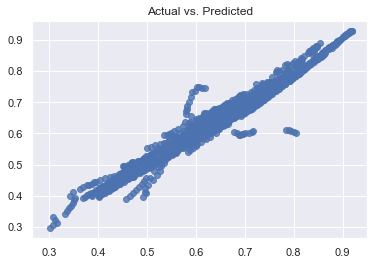

If non-linearity is apparent, consider adding a polynomial term 
		or using box-cox transformation to make X or y follow normal distribution



Building a correlation table


Parameters that are most likely VIOLATE linearity assumption and their correlation with HDI


pop_est      -0.152038
gdp_md_est   -0.000763
Name: HDI, dtype: float64


Parameters that are most likely FOLLOW linearity assumption and their correlation with HDI


year              0.387680
life              0.897429
school_index      0.900553
gni per capita    0.635498
Name: HDI, dtype: float64


Assumption 2: Little to no multicollinearity among predictors


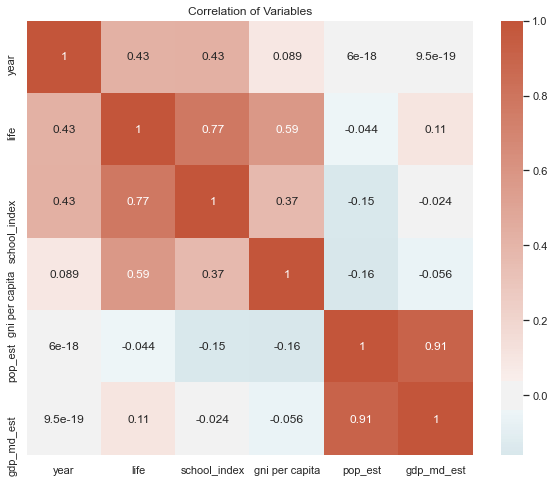

Variance Inflation Factors (VIF)
> 10: An indication that multicollinearity may be present
> 100: Certain multicollinearity among the variables
-------------------------------------
life: 441.4008060624313
year: 272.06708844957706
school_index: 37.68532120150712
pop_est: 7.963839233449065
gdp_md_est: 7.953036398510668
gni per capita: 2.613453876128437

3 cases of possible multicollinearity
2 cases of definite multicollinearity

Assumption not satisfied

Coefficient interpretability will be problematic
Consider removing variables with a high Variance Inflation Factor (VIF)

Assumption 3: No Autocorrelation

Performing Durbin-Watson Test
Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data
0 to 2< is positive autocorrelation
>2 to 4 is negative autocorrelation
-------------------------------------
Durbin-Watson: 0.20009089829848165
Signs of positive autocorrelation 

Assumption not satisfied 


Assumption 4: Homoskedasticity of Error Terms
Residuals should 

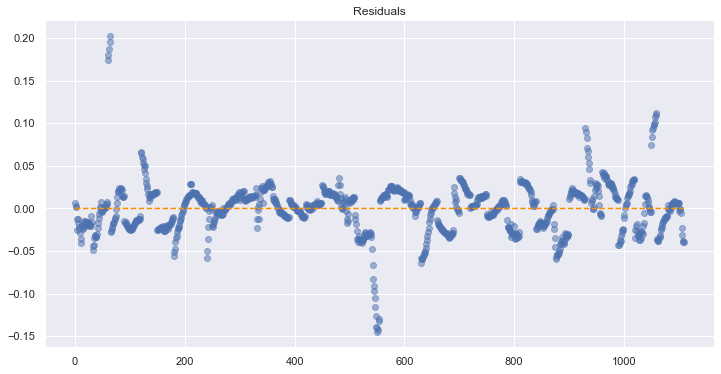

If heteroskedasticity is apparent, confidence intervals and predictions will be affected

Consider removing outliers and preprocessing features - nonlinear transformation can help


{'Lagrange Multiplier': 105.71940021079125,
 'pvalue for LM': 3.285787152165166e-21,
 'F stats': 19.3694567463202,
 'pvalue for Fstats': 1.4571420442570923e-21}

Signs of positive autocorrelation 

Assumption potentially not satisfied 


Assumption 5: The error terms are kinda normally distributed

Using the Anderson-Darling test for normal distribution
p-value from the test - below 0.05 generally means non-normal: 0.0
Residuals are not normally distributed


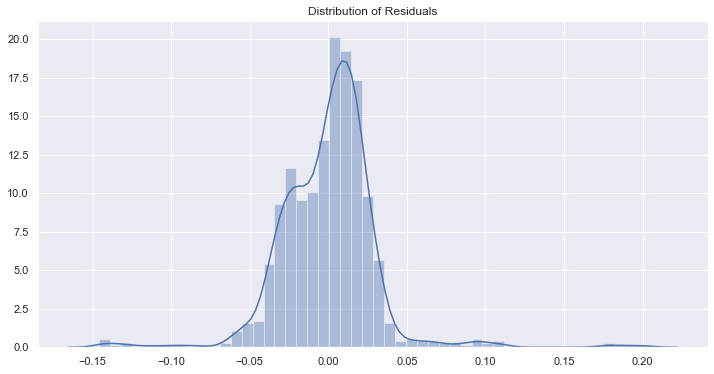


Assumption not satisfied

Confidence intervals will likely be affected
Try performing nonlinear transformations on variables
Building a probability plot


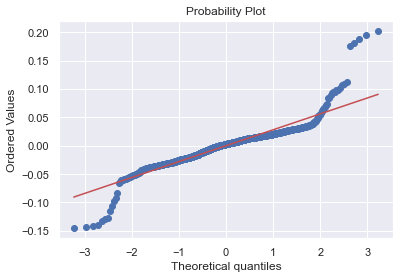


In your dataset you quite fat tails. You have 0.023 potential outliers (26 rows)


{'Satisfied': [],
 'Potentially': ['Linearity', 'Autocorrelation', 'Sub-Normality'],
 'Violated': ['Multicollinearity', 'Autocorrelation', 'Normality']}

In [200]:
tester=atols(X.astype(float),y)
tester.run_all()

# Adding ecological footprint to the DataFrame

In [207]:
os.getcwd()

'C:\\Users\\mcoge\\Project-HDI'

In [208]:
footprint=pd.read_csv('ecological_footprint.csv')

In [209]:
footprint.head()

Unnamed: 0  Rank Country/Region  EcologicalFootprint  Biocapacity  \
0           0   NaN          World                 2.75         1.63   
1           1   1.0     Luxembourg                15.82         1.68   
2           2   2.0          Aruba                11.88         0.57   
3           3   3.0          Qatar                10.80         1.24   
4           4   4.0      Australia                 9.31        16.57   

  Biocapacitydeficit orreserve  Population(millions)  \
0                        -1.12               7000.00   
1                       −14.14                  0.52   
2                       −11.31                  0.10   
3                        −9.56                  2.05   
4                         7.26                 23.05   

  Total Biocapacity deficit or reserve (gMha)  \
0                                      -10400   
1                                       −7.35   
2                                       −1.13   
3                                      −19.60   
4                                      167.34   

   Population (millions) for Biocapacity to equal Ecological Footprint*  
0                                        2500.000000                     
1                                           0.055221                     
2                                           0.004798                     
3                                           0.235370                     
4                                          41.024540

In [210]:
footprint.drop(['Unnamed: 0', 'Rank'], axis=1, inplace=True)

In [211]:
df3=df2019.merge(footprint, how="inner", left_on="Country", right_on="Country/Region")

In [212]:
df3.head()

Country  year    HDI  life  school_index  gni per capita  \
0          Afghanistan  2019  0.511  64.8          7.05          2229.4   
1              Albania  2019  0.795  78.6         12.40         13998.3   
2              Algeria  2019  0.748  76.9         11.30         11174.0   
3               Angola  2019  0.581  61.1          8.50          6104.1   
4  Antigua and Barbuda  2019  0.778  77.0         11.05         20895.4   

        Country/Region  EcologicalFootprint  Biocapacity  \
0          Afghanistan                 0.79         0.50   
1              Albania                 2.21         1.18   
2              Algeria                 2.12         0.59   
3               Angola                 0.93         2.55   
4  Antigua and Barbuda                 5.38         0.94   

  Biocapacitydeficit orreserve  Population(millions)  \
0                         −0.3                 29.82   
1                        −1.03                  3.16   
2                        −1.53                 38.48   
3                         1.61                 20.82   
4                        −4.44                  0.09   

  Total Biocapacity deficit or reserve (gMha)  \
0                                       −8.95   
1                                       −3.25   
2                                      −58.87   
3                                       35.52   
4                                       −0.40   

   Population (millions) for Biocapacity to equal Ecological Footprint*  
0                                          18.873420                     
1                                           1.687240                     
2                                          10.709060                     
3                                          57.087100                     
4                                           0.015725

In [213]:
df3.shape

(163, 13)

In [214]:
df3.isna().sum()

Country                                                                 0
year                                                                    0
HDI                                                                     0
life                                                                    0
school_index                                                            0
gni per capita                                                          0
Country/Region                                                          0
EcologicalFootprint                                                     0
Biocapacity                                                             0
Biocapacitydeficit orreserve                                            0
Population(millions)                                                    0
Total Biocapacity deficit or reserve (gMha)                             0
Population (millions) for Biocapacity to equal Ecological Footprint*    0
dtype: int64

In [216]:
df3.head(20)

Country  year    HDI  life  school_index  gni per capita  \
0           Afghanistan  2019  0.511  64.8          7.05          2229.4   
1               Albania  2019  0.795  78.6         12.40         13998.3   
2               Algeria  2019  0.748  76.9         11.30         11174.0   
3                Angola  2019  0.581  61.1          8.50          6104.1   
4   Antigua and Barbuda  2019  0.778  77.0         11.05         20895.4   
5             Argentina  2019  0.845  76.7         14.30         21190.2   
6               Armenia  2019  0.776  75.1         12.20         13894.0   
7             Australia  2019  0.944  83.4         17.35         48084.8   
8               Austria  2019  0.922  81.5         14.30         56196.9   
9            Azerbaijan  2019  0.756  73.0         11.75         13783.7   
10              Bahamas  2019  0.814  73.9         12.15         33747.2   
11              Bahrain  2019  0.852  77.3         12.90         42521.7   
12           Bangladesh  2019  0.632  72.6          8.90          4976.2   
13             Barbados  2019  0.814  79.2         13.00         14935.9   
14              Belarus  2019  0.823  74.8         13.85         18546.5   
15              Belgium  2019  0.931  81.6         15.95         52084.6   
16                Benin  2019  0.545  61.8          8.20          3254.2   
17               Bhutan  2019  0.654  71.8          8.55         10745.8   
18              Bolivia  2019  0.718  71.5         11.60          8553.8   
19             Botswana  2019  0.735  69.6         11.20         16437.1   

         Country/Region  EcologicalFootprint  Biocapacity  \
0           Afghanistan                 0.79         0.50   
1               Albania                 2.21         1.18   
2               Algeria                 2.12         0.59   
3                Angola                 0.93         2.55   
4   Antigua and Barbuda                 5.38         0.94   
5             Argentina                 3.14         6.92   
6               Armenia                 2.23         0.89   
7             Australia                 9.31        16.57   
8               Austria                 6.06         3.07   
9            Azerbaijan                 2.31         0.85   
10              Bahamas                 6.84         9.55   
11              Bahrain                 7.49         0.58   
12           Bangladesh                 0.72         0.38   
13             Barbados                 4.48         0.19   
14              Belarus                 5.09         3.64   
15              Belgium                 7.44         1.19   
16                Benin                 1.41         0.88   
17               Bhutan                 4.84         5.27   
18              Bolivia                 2.96        16.73   
19             Botswana                 3.83         3.47   

   Biocapacitydeficit orreserve  Population(millions)  \
0                          −0.3                 29.82   
1                         −1.03                  3.16   
2                         −1.53                 38.48   
3                          1.61                 20.82   
4                         −4.44                  0.09   
5                          3.78                 41.09   
6                         −1.35                  2.97   
7                          7.26                 23.05   
8                            −3                  8.46   
9                         −1.46                  9.31   
10                         2.71                  0.37   
11                        −6.91                  1.32   
12                        −0.35                154.70   
13                        −4.29                  0.28   
14                        −1.45                  9.40   
15                        −6.25                 11.06   
16                        −0.53                 10.05   
17                         0.43                  0.74   
18                        13.77                 10.50 

In [217]:
df3.drop(['Country/Region'], axis=1, inplace=True)

In [218]:
df3.columns

Index(['Country', 'year', 'HDI', 'life', 'school_index', 'gni per capita',
       'EcologicalFootprint', 'Biocapacity', 'Biocapacitydeficit orreserve',
       'Population(millions)', 'Total Biocapacity deficit or reserve (gMha)',
       'Population (millions) for Biocapacity to equal Ecological Footprint*'],
      dtype='object')

## Is there a correlation between HDI and Ecological Footprint?

<AxesSubplot:xlabel='HDI', ylabel='EcologicalFootprint'>

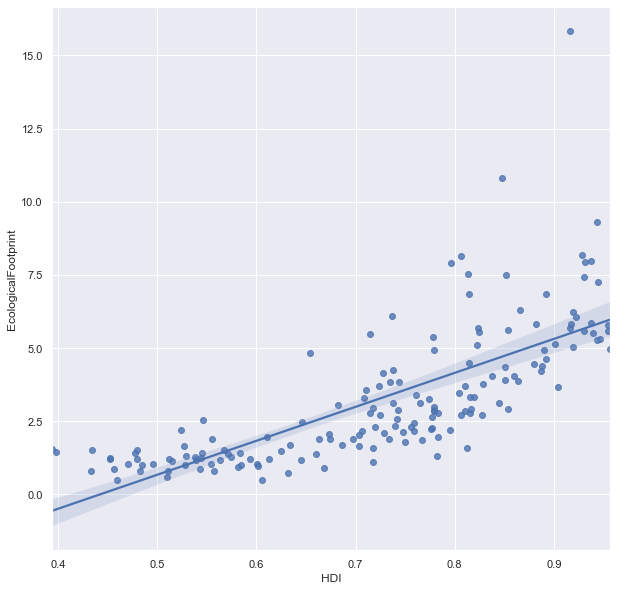

In [440]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
sns.regplot(data=df3, y='EcologicalFootprint', x='HDI')

Some of, but hard to say, because some countries have a massive Ecological Footprint

<AxesSubplot:xlabel='HDI', ylabel='Biocapacity'>

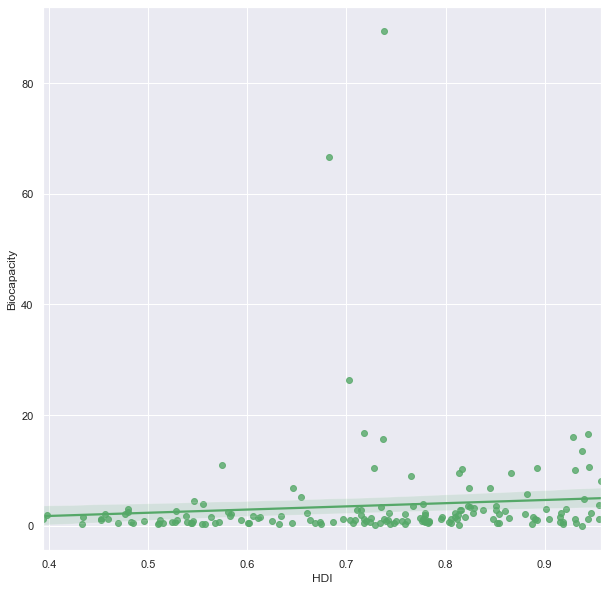

In [441]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
sns.regplot(data=df3, y='Biocapacity', x='HDI', label='Country',color='g')

Some countries have an enormous biocapacity (as Bolivia for example) and it will make it outliers in the analysis.

So it won't be useful for the 

# Hypothesis testing 

In [225]:
df1.groupby('year').HDI.describe()

count      mean       std    min     25%     50%     75%    max
year                                                                 
1990  189.0  0.595770  0.153986  0.220  0.4915  0.6130  0.7180  0.871
1991  189.0  0.598058  0.154798  0.220  0.4950  0.6180  0.7210  0.871
1992  189.0  0.599725  0.154881  0.202  0.4930  0.6180  0.7190  0.873
1993  189.0  0.604217  0.156841  0.197  0.4930  0.6190  0.7150  0.877
1994  189.0  0.608074  0.158635  0.192  0.4890  0.6230  0.7200  0.883
1995  189.0  0.608251  0.156939  0.231  0.4905  0.6255  0.7215  0.888
1996  189.0  0.613643  0.156839  0.244  0.4945  0.6330  0.7230  0.890
1997  189.0  0.618503  0.156110  0.248  0.4985  0.6370  0.7310  0.893
1998  189.0  0.624429  0.157038  0.255  0.5060  0.6410  0.7370  0.904
1999  189.0  0.623730  0.159092  0.259  0.4920  0.6400  0.7390  0.909
2000  189.0  0.630114  0.164874  0.262  0.4840  0.6530  0.7570  0.915
2001  189.0  0.635709  0.164350  0.268  0.4920  0.6600  0.7670  0.914
2002  189.0  0.641254  0.163726  0.273  0.4990  0.6680  0.7730  0.917
2003  189.0  0.646632  0.164097  0.276  0.5000  0.6710  0.7780  0.923
2004  189.0  0.652817  0.162794  0.285  0.5090  0.6810  0.7860  0.932
2005  189.0  0.658741  0.163767  0.294  0.5140  0.6880  0.7880  0.931
2006  189.0  0.666392  0.162772  0.300  0.5210  0.6980  0.7910  0.934
2007  189.0  0.673265  0.161456  0.306  0.5280  0.7060  0.7990  0.936
2008  189.0  0.679474  0.159826  0.314  0.5350  0.7140  0.8000  0.937
2009  189.0  0.683320  0.156793  0.321  0.5450  0.7180  0.8000  0.937
2010  189.0  0.687153  0.156159  0.331  0.5520  0.7180  0.8030  0.941
2011  189.0  0.692651  0.154687  0.338  0.5650  0.7210  0.8060  0.942
2012  189.0  0.697627  0.153395  0.350  0.5730  0.7280  0.8080  0.944
2013  189.0  0.702608  0.152344  0.357  0.5790  0.7290  0.8150  0.946
2014  189.0  0.706754  0.151631  0.365  0.5790  0.7330  0.8200  0.944
2015  189.0  0.710497  0.151464  0.372  0.5870  0.7370  0.8200  0.947
2016  189.0  0.713368  0.151398  0.378  0.5880  0.7380  0.8220  0.950
2017  189.0  0.716783  0.150598  0.386  0.5950  0.7360  0.8220  0.954
2018  189.0  0.719423  0.150379  0.391  0.5990  0.7380  0.8260  0.956
2019  189.0  0.722423  0.149791  0.394  0.6020  0.7400  0.8290  0.957

In [226]:
bins=pd.cut(df1['HDI'], [0, 0.25, 0.5, 0.75, 1])
df1.groupby(bins)['HDI'].count()

HDI
(0.0, 0.25]      23
(0.25, 0.5]    1144
(0.5, 0.75]    2689
(0.75, 1.0]    1814
Name: HDI, dtype: int64

In [227]:
bins2019=pd.cut(df2019['HDI'], [0, 0.25, 0.5, 0.75, 1])
df2019.groupby(bins2019)['HDI'].agg(['count', 'mean'])

count      mean
HDI                         
(0.0, 0.25]      0       NaN
(0.25, 0.5]     18  0.453278
(0.5, 0.75]     82  0.640622
(0.75, 1.0]     89  0.852225

In [228]:
bins1990=pd.cut(df1990['HDI'], [0, 0.25, 0.5, 0.75, 1])
df1990.groupby(bins1990)['HDI'].agg(['count', 'mean'])

count      mean
HDI                         
(0.0, 0.25]      4  0.232250
(0.25, 0.5]     49  0.406100
(0.5, 0.75]    106  0.638982
(0.75, 1.0]     30  0.801350

Does life expectancy affect HDI?

In [245]:
sum(df2019.groupby(df2019.life // 5*5).life.count())

189

In [246]:
sum(df2019.groupby(df2019.HDI // 0.05*0.05).HDI.count())

189

In [247]:
test.to_csv('IDH 2019.csv')

In [258]:
df2019=df2019.reset_index()

In [259]:
df2019.drop(['index'], axis=1, inplace=True)

In [260]:
df3.rename(columns={'Population(millions)':'population'}, inplace=True)

In [261]:
df3

Country  year    HDI  life  school_index  gni per capita  \
0            Afghanistan  2019  0.511  64.8          7.05          2229.4   
1                Albania  2019  0.795  78.6         12.40         13998.3   
2                Algeria  2019  0.748  76.9         11.30         11174.0   
3                 Angola  2019  0.581  61.1          8.50          6104.1   
4    Antigua and Barbuda  2019  0.778  77.0         11.05         20895.4   
..                   ...   ...    ...   ...           ...             ...   
158            Venezuela  2019  0.711  72.1         11.55          7044.6   
159              Vietnam  2019  0.704  75.4         10.50          7432.7   
160                Yemen  2019  0.470  66.1          6.00          1593.7   
161               Zambia  2019  0.584  63.9          9.35          3325.5   
162             Zimbabwe  2019  0.571  61.5          9.75          2665.6   

     EcologicalFootprint  Biocapacity Biocapacitydeficit orreserve  \
0                   0.79         0.50                         −0.3   
1                   2.21         1.18                        −1.03   
2                   2.12         0.59                        −1.53   
3                   0.93         2.55                         1.61   
4                   5.38         0.94                        −4.44   
..                   ...          ...                          ...   
158                 3.57         2.78                        −0.79   
159                 1.65         1.00                        −0.65   
160                 1.03         0.50                        −0.53   
161                 0.99         2.23                         1.24   
162                 1.37         0.62                        −0.75   

     population Total Biocapacity deficit or reserve (gMha)  \
0         29.82                                       −8.95   
1          3.16                                       −3.25   
2         38.48                                      −58.87   
3         20.82                                       35.52   
4          0.09                                       −0.40   
..          ...                                         ...   
158       29.96                                      −23.67   
159       90.80                                      −59.02   
160       23.85                                      −12.64   
161       14.08                                       17.46   
162       13.72                                      −10.29   

     Population (millions) for Biocapacity to equal Ecological Footprint*  
0                                            18.873420                     
1                                             1.687240                     
2                                            10.709060                     
3                                            57.087100                     
4                                             0.015725                     
..                                                 ...                     
158                                          23.330200                     
159                                          55.030300                     
160                                          11.577670                     
161                                          31.715560                     
162                                           6.209051                     

[163 rows x 12 columns]

In [262]:
df3[df3['life'] > 80].Country.count()

29

In [263]:
df3.population.sum()

6566.858

In [264]:
test=df3[df3['life'] > 80]

In [298]:
p=test.population.sum()/df3.population.sum()
p

0.10594381666239776

In 2019, the probability to be born in a country where your life expectancy is greater than 80 years is 10.6%.

## A final fantasy

Some wizard sent us into random place. We met few people, but we couldnt detect the language, hence, we dont know where we are. Wizard can answer 1 question of our choice, except the actual location. If we manage to answer it, he will bring us back and praise us with lots of gold. Otherwise, we will stay where we are. 

After few minutes of consideration, we asked: what is the average life expectancy in this region.  The answer is 55 y.o with std 10. We can't trust the wizard fully, but we accept this number as approximate. What are the odds we will find the correct country?

In [317]:
from scipy.stats import ttest_rel
from scipy.stats import ttest_1samp
from scipy.stats import ttest_ind

In [359]:
np.random.normal(55, 2, 20)

array([55.75131345, 58.6865351 , 56.15505631, 52.44204021, 52.62170075,
       57.05843355, 57.77758732, 55.84672843, 51.81852069, 49.83500924,
       55.28832388, 54.75797139, 53.36910504, 53.52985227, 52.77803015,
       59.12530478, 57.82268249, 58.79308528, 52.8767989 , 51.11040441])

In [339]:
boo=df3.life.map(lambda x: ttest_1samp(np.random.normal(55, 10, 20), x)[1])
df3.loc[boo[boo>0.05].index]

Country  year    HDI  life  school_index  gni per capita  \
26        Cameroon  2019  0.563  59.3          9.20          3580.9   
28            Chad  2019  0.398  54.2          4.90          1555.4   
38   Côte d'Ivoire  2019  0.538  57.8          7.65          5068.6   
60   Guinea-Bissau  2019  0.480  58.3          7.10          1996.0   
91            Mali  2019  0.434  59.3          4.95          2268.8   
107        Nigeria  2019  0.539  54.7          8.35          4910.2   
131   Sierra Leone  2019  0.452  54.7          6.95          1667.8   
146           Togo  2019  0.515  61.0          8.85          1602.3   

     EcologicalFootprint  Biocapacity Biocapacitydeficit orreserve  \
26                  1.17         1.69                         0.52   
28                  1.46         2.03                         0.57   
38                  1.27         1.78                         0.51   
60                  1.53         3.03                         1.49   
91                  1.53         1.58                         0.05   
107                 1.16         0.70                        −0.47   
131                 1.24         1.24                            0   
146                 1.13         0.53                         −0.6   

     population Total Biocapacity deficit or reserve (gMha)  \
26        21.70                                       11.28   
28        12.45                                        7.10   
38        19.84                                       10.12   
60         1.66                                        2.47   
91        14.85                                        0.74   
107      168.83                                      −79.35   
131        5.98                                        0.00   
146        6.64                                       −3.98   

     Population (millions) for Biocapacity to equal Ecological Footprint*  
26                                           31.344440                     
28                                           17.310620                     
38                                           27.807240                     
60                                            3.287451                     
91                                           15.335290                     
107                                         101.880200                     
131                                           5.980000                     
146                                           3.114336

In [451]:
print("The probability to be in on country to guess the right country is :", 
      1/len(df3.Country.loc[boo[boo>0.05].index])*100, "%.")

The probability to be in on country to guess the right country is : 12.5 %.


# Modeling for UE

In [269]:
europe=df2[df2.continent=='Europe']

In [270]:
europe

Country  year    HDI  life  school_index  gni per capita  \
30           Albania  1990  0.650  71.8          9.70          4937.5   
31           Albania  1991  0.631  71.8          9.80          3496.4   
32           Albania  1992  0.615  71.8          9.25          3207.6   
33           Albania  1993  0.618  71.9          8.95          3684.6   
34           Albania  1994  0.624  72.0          8.95          4102.6   
...              ...   ...    ...   ...           ...             ...   
5545  United Kingdom  2015  0.923  81.1         15.10         43885.2   
5546  United Kingdom  2016  0.924  81.1         15.10         44334.7   
5547  United Kingdom  2017  0.926  81.2         15.15         45426.7   
5548  United Kingdom  2018  0.928  81.2         15.25         45686.4   
5549  United Kingdom  2019  0.932  81.3         15.35         46070.6   

         pop_est continent  gdp_md_est  
30     3047987.0    Europe     33900.0  
31     3047987.0    Europe     33900.0  
32     3047987.0    Europe     33900.0  
33     3047987.0    Europe     33900.0  
34     3047987.0    Europe     33900.0  
...          ...       ...         ...  
5545  64769452.0    Europe   2788000.0  
5546  64769452.0    Europe   2788000.0  
5547  64769452.0    Europe   2788000.0  
5548  64769452.0    Europe   2788000.0  
5549  64769452.0    Europe   2788000.0  

[1020 rows x 9 columns]

In [271]:
#add the footprint
europe_fp=europe.merge(footprint, how="inner", left_on="Country", right_on="Country/Region")

In [272]:
europe_fp

Country  year    HDI  life  school_index  gni per capita  \
0           Albania  1990  0.650  71.8          9.70          4937.5   
1           Albania  1991  0.631  71.8          9.80          3496.4   
2           Albania  1992  0.615  71.8          9.25          3207.6   
3           Albania  1993  0.618  71.9          8.95          3684.6   
4           Albania  1994  0.624  72.0          8.95          4102.6   
..              ...   ...    ...   ...           ...             ...   
955  United Kingdom  2015  0.923  81.1         15.10         43885.2   
956  United Kingdom  2016  0.924  81.1         15.10         44334.7   
957  United Kingdom  2017  0.926  81.2         15.15         45426.7   
958  United Kingdom  2018  0.928  81.2         15.25         45686.4   
959  United Kingdom  2019  0.932  81.3         15.35         46070.6   

        pop_est continent  gdp_md_est  Country/Region  EcologicalFootprint  \
0     3047987.0    Europe     33900.0         Albania                 2.21   
1     3047987.0    Europe     33900.0         Albania                 2.21   
2     3047987.0    Europe     33900.0         Albania                 2.21   
3     3047987.0    Europe     33900.0         Albania                 2.21   
4     3047987.0    Europe     33900.0         Albania                 2.21   
..          ...       ...         ...             ...                  ...   
955  64769452.0    Europe   2788000.0  United Kingdom                 7.93   
956  64769452.0    Europe   2788000.0  United Kingdom                 7.93   
957  64769452.0    Europe   2788000.0  United Kingdom                 7.93   
958  64769452.0    Europe   2788000.0  United Kingdom                 7.93   
959  64769452.0    Europe   2788000.0  United Kingdom                 7.93   

     Biocapacity Biocapacitydeficit orreserve  Population(millions)  \
0           1.18                        −1.03                 3.160   
1           1.18                        −1.03                 3.160   
2           1.18                        −1.03                 3.160   
3           1.18                        −1.03                 3.160   
4           1.18                        −1.03                 3.160   
..           ...                          ...                   ...   
955         0.56                        −7.37                65.648   
956         0.56                        −7.37                65.648   
957         0.56                        −7.37                65.648   
958         0.56                        −7.37                65.648   
959         0.56                        −7.37                65.648   

    Total Biocapacity deficit or reserve (gMha)  \
0                                         −3.25   
1                                         −3.25   
2                                         −3.25   
3                                         −3.25   
4                                         −3.25   
..                                          ...   
955                                     −483.83   
956                                     −483.83   
957                                     −483.83   
958                                     −483.83   
959                                     −483.83   

     Population (millions) for Biocapacity to equal Ecological Footprint*  
0                                             1.687240                     
1                                             1.687240                     
2                                             1.687240                     
3                                             1.687240                     
4                                             1.687240                     
..                                                 ...                     
955                                           4.635924                     
956                                           4.635924                     
957                                           4.635924      

## Selecting the countries in EU28

In [273]:
europe_fp.Country.unique()

array(['Albania', 'Austria', 'Belarus', 'Belgium', 'Bulgaria', 'Croatia',
       'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece',
       'Hungary', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg',
       'Montenegro', 'Netherlands', 'Norway', 'Poland', 'Portugal',
       'Romania', 'Serbia', 'Slovakia', 'Slovenia', 'Spain', 'Sweden',
       'Switzerland', 'Ukraine', 'United Kingdom'], dtype=object)

In [274]:
ue=['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Czechia', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany',
'Greece', 'Hungary', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Netherlands',
'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia','Spain', 'Sweden', 'United Kingdom']

In [275]:
ue28=europe_fp[(europe_fp.Country.isin(ue))]

In [276]:
ue28

Country  year    HDI  life  school_index  gni per capita  \
30          Austria  1990  0.803  75.6         11.25         37993.7   
31          Austria  1991  0.808  75.8         11.40         38721.4   
32          Austria  1992  0.813  76.1         11.55         39021.3   
33          Austria  1993  0.817  76.3         11.70         38932.7   
34          Austria  1994  0.821  76.6         11.80         39634.1   
..              ...   ...    ...   ...           ...             ...   
955  United Kingdom  2015  0.923  81.1         15.10         43885.2   
956  United Kingdom  2016  0.924  81.1         15.10         44334.7   
957  United Kingdom  2017  0.926  81.2         15.15         45426.7   
958  United Kingdom  2018  0.928  81.2         15.25         45686.4   
959  United Kingdom  2019  0.932  81.3         15.35         46070.6   

        pop_est continent  gdp_md_est  Country/Region  EcologicalFootprint  \
30    8754413.0    Europe    416600.0         Austria                 6.06   
31    8754413.0    Europe    416600.0         Austria                 6.06   
32    8754413.0    Europe    416600.0         Austria                 6.06   
33    8754413.0    Europe    416600.0         Austria                 6.06   
34    8754413.0    Europe    416600.0         Austria                 6.06   
..          ...       ...         ...             ...                  ...   
955  64769452.0    Europe   2788000.0  United Kingdom                 7.93   
956  64769452.0    Europe   2788000.0  United Kingdom                 7.93   
957  64769452.0    Europe   2788000.0  United Kingdom                 7.93   
958  64769452.0    Europe   2788000.0  United Kingdom                 7.93   
959  64769452.0    Europe   2788000.0  United Kingdom                 7.93   

     Biocapacity Biocapacitydeficit orreserve  Population(millions)  \
30          3.07                           −3                 8.460   
31          3.07                           −3                 8.460   
32          3.07                           −3                 8.460   
33          3.07                           −3                 8.460   
34          3.07                           −3                 8.460   
..           ...                          ...                   ...   
955         0.56                        −7.37                65.648   
956         0.56                        −7.37                65.648   
957         0.56                        −7.37                65.648   
958         0.56                        −7.37                65.648   
959         0.56                        −7.37                65.648   

    Total Biocapacity deficit or reserve (gMha)  \
30                                       −25.38   
31                                       −25.38   
32                                       −25.38   
33                                       −25.38   
34                                       −25.38   
..                                          ...   
955                                     −483.83   
956                                     −483.83   
957                                     −483.83   
958                                     −483.83   
959                                     −483.83   

     Population (millions) for Biocapacity to equal Ecological Footprint*  
30                                            4.285842                     
31                                            4.285842                     
32                                            4.285842                     
33                                            4.285842                     
34                                            4.285842                     
..                                                 ...                     
955                                           4.635924                     
956                                           4.635924                     
957                                           4.635924      

## Selecting countries in EU15

In [277]:
ue15=['Austria', 'Belgium', 'Denmark', 'Finland', 'France', 'Germany','Greece', 'Ireland', 'Italy', 'Luxembourg', 
      'Netherlands', 'Portugal', 'Spain', 'Sweden', 'United Kingdom']

In [278]:
eu15=europe_fp[(europe_fp.Country.isin(ue15))]

In [452]:
eu15.head()

Country  year    HDI  life  school_index  gni per capita  \
661     Portugal  1991  0.727  74.7          9.30         24656.4   
580  Netherlands  2000  0.882  78.2         13.70         48502.3   
32       Austria  1992  0.813  76.1         11.55         39021.3   
359       Greece  2019  0.888  82.2         14.25         30154.6   
356       Greece  2016  0.874  81.7         13.80         28602.2   

     EcologicalFootprint  Biocapacity  
661                 3.88         1.51  
580                 5.28         1.17  
32                  6.06         3.07  
359                 4.38         1.61  
356                 4.38         1.61

In [280]:
eu15.drop(['continent', 'Country/Region', 'pop_est', 'Population(millions)', 
           'Population (millions) for Biocapacity to equal Ecological Footprint*', 
           'Biocapacitydeficit orreserve','Total Biocapacity deficit or reserve (gMha)', 
           'gdp_md_est'], axis=1, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [281]:
eu15.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 450 entries, 30 to 959
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country              450 non-null    object 
 1   year                 450 non-null    object 
 2   HDI                  450 non-null    float64
 3   life                 450 non-null    float64
 4   school_index         450 non-null    float64
 5   gni per capita       450 non-null    float64
 6   EcologicalFootprint  450 non-null    float64
 7   Biocapacity          450 non-null    float64
dtypes: float64(6), object(2)
memory usage: 31.6+ KB


In [282]:
eu15.year=eu15.year.astype(int)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [283]:
eu15.columns

Index(['Country', 'year', 'HDI', 'life', 'school_index', 'gni per capita',
       'EcologicalFootprint', 'Biocapacity'],
      dtype='object')

In [285]:
eu15.columns

Index(['Country', 'year', 'HDI', 'life', 'school_index', 'gni per capita',
       'EcologicalFootprint', 'Biocapacity'],
      dtype='object')

In [296]:
eu15=eu15[['Country', 'year', 'HDI', 'life', 'school_index', 'gni per capita',
      'EcologicalFootprint', 'Biocapacity']]

In [287]:
eu15_2000=eu15[(eu15.year>2000)]

In [288]:
X=eu15_2000.drop(['Country','HDI'], axis=1)
y=eu15_2000.HDI

sm.OLS(y, sm.add_constant(X.drop(['Biocapacity', 'EcologicalFootprint','year'], axis=1).astype(float))).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    HDI   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     2525.
Date:                Fri, 18 Dec 2020   Prob (F-statistic):          7.55e-203
Time:                        10:05:40   Log-Likelihood:                 1049.1
No. Observations:                 285   AIC:                            -2090.
Df Residuals:                     281   BIC:                            -2076.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1478      0.021      7.021      0.000       0.106       0.189
life               0.0050      0.000     18.815      0.000       0.004       0.006
school_index       0.0220      0.000     70.683      0.000       0.021       0.023
gni per capita  8.222e-07   2.96e-08     27.768      0.000    7.64e-07     8.8e-07
==============================================================================
Omnibus:                       29.697   Durbin-Watson:                   0.323
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.016
Skew:                          -0.882   Prob(JB):                     9.17e-09
Kurtosis:                       2.948   Cond. No.                     2.85e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.85e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Fitting linear regression

R^2: 0.9657498092793917 

Coefficients
-------------------------------------
Intercept: 1.000386727536784
year: -0.0
life: 0.01
school_index: 0.02
gni per capita: 0.0

Assumption 1: Linear Relationship between the Target and the Features
Checking with a scatter plot of actual vs. predicted. Predictions should follow the diagonal line.


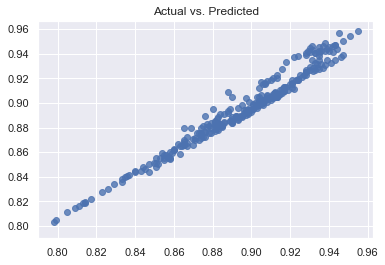

If non-linearity is apparent, consider adding a polynomial term 
		or using box-cox transformation to make X or y follow normal distribution



Building a correlation table


Parameters that are most likely VIOLATE linearity assumption and their correlation with HDI


Series([], Name: HDI, dtype: float64)


Parameters that are most likely FOLLOW linearity assumption and their correlation with HDI


year              0.548858
life              0.346870
school_index      0.911044
gni per capita    0.440988
Name: HDI, dtype: float64


Assumption 2: Little to no multicollinearity among predictors


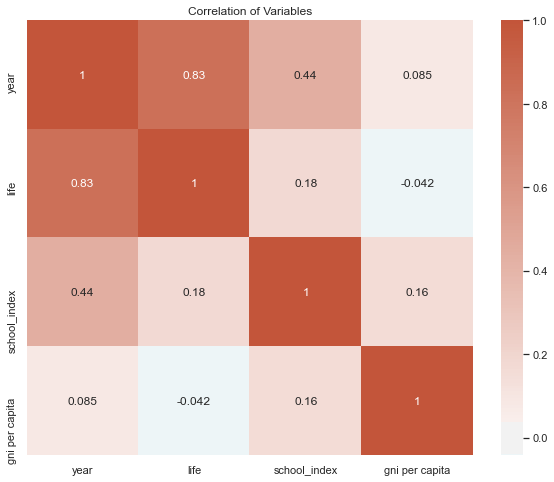

Variance Inflation Factors (VIF)
> 10: An indication that multicollinearity may be present
> 100: Certain multicollinearity among the variables
-------------------------------------
year: 4420.773520761267
life: 4409.765337246521
school_index: 144.2452753577805
gni per capita: 16.065837841814634

4 cases of possible multicollinearity
3 cases of definite multicollinearity

Assumption not satisfied

Coefficient interpretability will be problematic
Consider removing variables with a high Variance Inflation Factor (VIF)

Assumption 3: No Autocorrelation

Performing Durbin-Watson Test
Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data
0 to 2< is positive autocorrelation
>2 to 4 is negative autocorrelation
-------------------------------------
Durbin-Watson: 0.36114473779772044
Signs of positive autocorrelation 

Assumption not satisfied 


Assumption 4: Homoskedasticity of Error Terms
Residuals should have relative constant variance


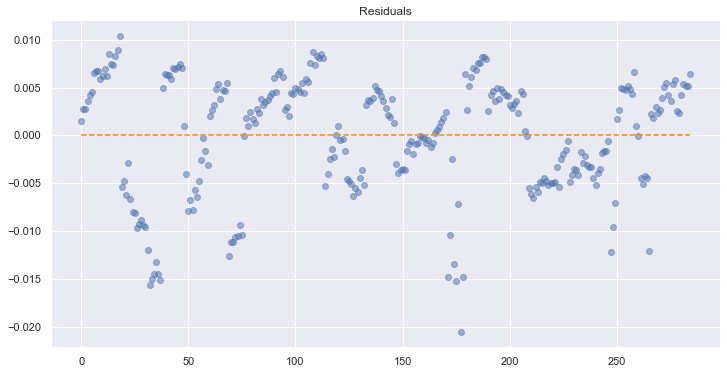

If heteroskedasticity is apparent, confidence intervals and predictions will be affected

Consider removing outliers and preprocessing features - nonlinear transformation can help


{'Lagrange Multiplier': 147.28985961035698,
 'pvalue for LM': 1.01241591704987e-31,
 'F stats': 75.13689702407542,
 'pvalue for Fstats': 3.061636738624253e-43}

Signs of positive autocorrelation 

Assumption potentially not satisfied 


Assumption 5: The error terms are kinda normally distributed

Using the Anderson-Darling test for normal distribution
p-value from the test - below 0.05 generally means non-normal: 3.1081571800731402e-12
Residuals are not normally distributed


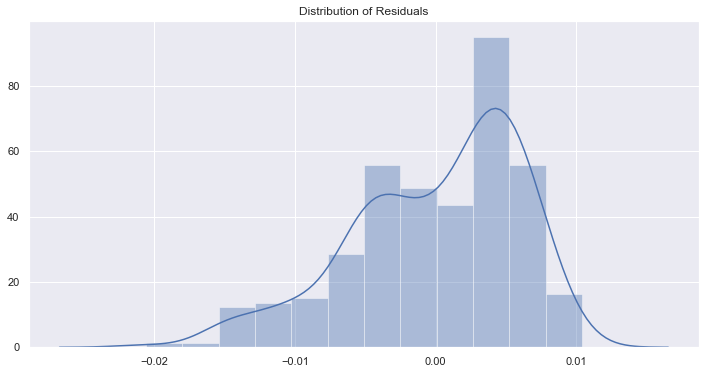


Assumption not satisfied

Confidence intervals will likely be affected
Try performing nonlinear transformations on variables
Building a probability plot


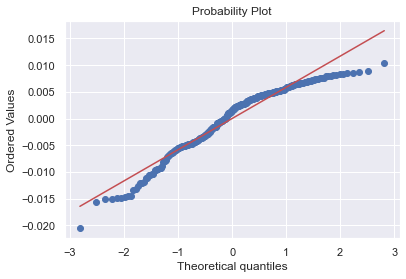


In your dataset you quite fat tails. You have 0.049 potential outliers (14 rows)


{'Satisfied': ['Linearity'],
 'Potentially': ['Autocorrelation', 'Sub-Normality'],
 'Violated': ['Multicollinearity', 'Autocorrelation', 'Normality']}

In [289]:
tester=atols(X.drop(['Biocapacity', 'EcologicalFootprint'],
                    axis=1).astype(float),y)
tester.run_all()

In [344]:
eu15_2010=eu15[(eu15.year>2009)]

In [345]:
X=eu15_2010.drop(['Country','HDI'], axis=1)
y=eu15_2010.HDI

sm.OLS(y, sm.add_constant(X.drop(['Biocapacity', 'year', axis=1).astype(float))).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    HDI   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     917.2
Date:                Fri, 18 Dec 2020   Prob (F-statistic):          7.92e-102
Time:                        11:12:26   Log-Likelihood:                 572.43
No. Observations:                 150   AIC:                            -1135.
Df Residuals:                     145   BIC:                            -1120.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2255      0.047      4.828      0.000       0.133       0.318
life                    0.0044      0.001      8.087      0.000       0.003       0.005
school_index            0.0187      0.000     37.894      0.000       0.018       0.020
gni per capita       1.257e-06   7.22e-08     17.416      0.000    1.11e-06     1.4e-06
EcologicalFootprint    -0.0008      0.000     -2.975      0.003      -0.001      -0.000
==============================================================================
Omnibus:                        7.584   Durbin-Watson:                   0.380
Prob(Omnibus):                  0.023   Jarque-Bera (JB):                4.142
Skew:                          -0.195   Prob(JB):                        0.126
Kurtosis:                       2.285   Cond. No.                     5.19e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.19e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Fitting linear regression

R^2: 0.9596614009707486 

Coefficients
-------------------------------------
Intercept: 0.19204776199721374
life: 0.0
school_index: 0.02
gni per capita: 0.0

Assumption 1: Linear Relationship between the Target and the Features
Checking with a scatter plot of actual vs. predicted. Predictions should follow the diagonal line.


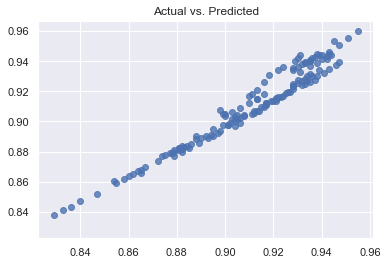

If non-linearity is apparent, consider adding a polynomial term 
		or using box-cox transformation to make X or y follow normal distribution



Building a correlation table


Parameters that are most likely VIOLATE linearity assumption and their correlation with HDI


life   -0.104018
Name: HDI, dtype: float64


Parameters that are most likely FOLLOW linearity assumption and their correlation with HDI


school_index      0.880533
gni per capita    0.653886
Name: HDI, dtype: float64


Assumption 2: Little to no multicollinearity among predictors


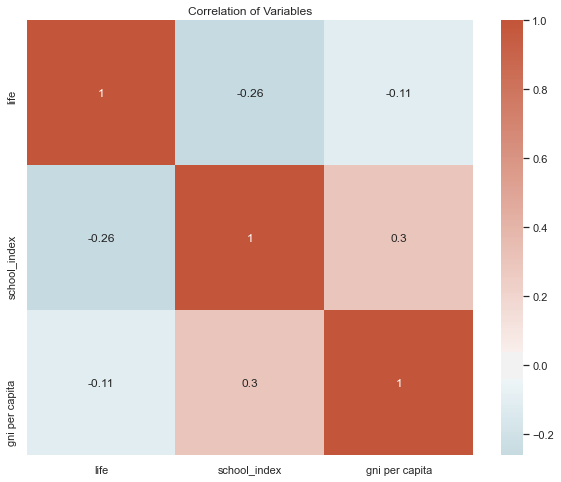

Variance Inflation Factors (VIF)
> 10: An indication that multicollinearity may be present
> 100: Certain multicollinearity among the variables
-------------------------------------
school_index: 174.63172821239257
life: 156.64811326921256
gni per capita: 22.712658917848273

3 cases of possible multicollinearity
2 cases of definite multicollinearity

Assumption not satisfied

Coefficient interpretability will be problematic
Consider removing variables with a high Variance Inflation Factor (VIF)

Assumption 3: No Autocorrelation

Performing Durbin-Watson Test
Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data
0 to 2< is positive autocorrelation
>2 to 4 is negative autocorrelation
-------------------------------------
Durbin-Watson: 0.41022018795372794
Signs of positive autocorrelation 

Assumption not satisfied 


Assumption 4: Homoskedasticity of Error Terms
Residuals should have relative constant variance


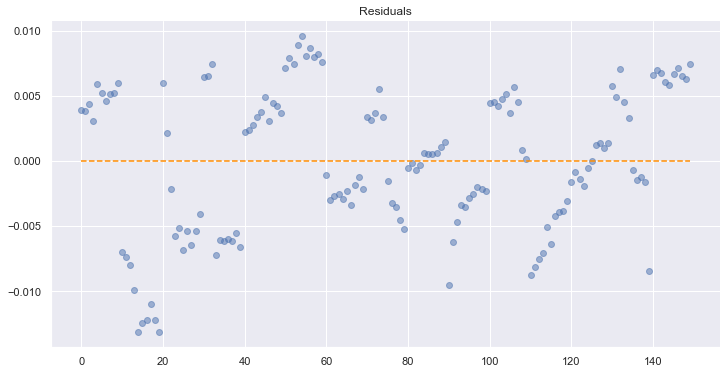

If heteroskedasticity is apparent, confidence intervals and predictions will be affected

Consider removing outliers and preprocessing features - nonlinear transformation can help


{'Lagrange Multiplier': 82.09233393070188,
 'pvalue for LM': 1.492368878079087e-18,
 'F stats': 59.235202672103384,
 'pvalue for Fstats': 3.652803165749643e-25}

Signs of positive autocorrelation 

Assumption potentially not satisfied 


Assumption 5: The error terms are kinda normally distributed

Using the Anderson-Darling test for normal distribution
p-value from the test - below 0.05 generally means non-normal: 0.0009338442569910665
Residuals are not normally distributed


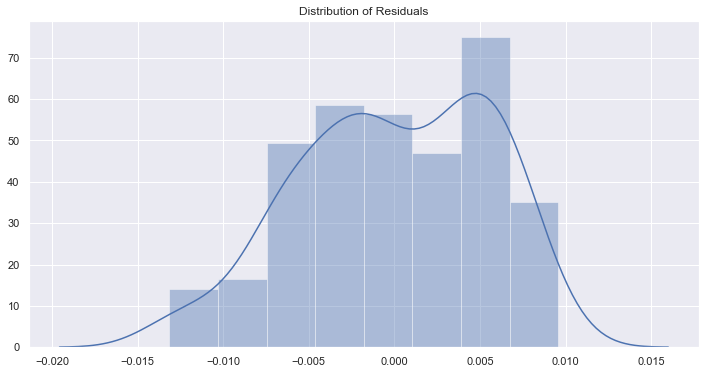


Assumption not satisfied

Confidence intervals will likely be affected
Try performing nonlinear transformations on variables
Building a probability plot


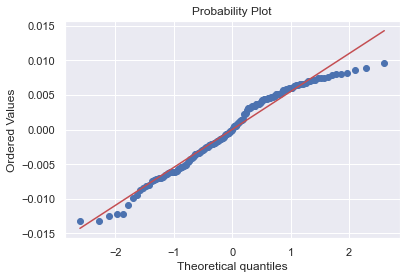


In your dataset you quite fat tails. You have 0.033 potential outliers (5 rows)


{'Satisfied': [],
 'Potentially': ['Linearity', 'Autocorrelation', 'Sub-Normality'],
 'Violated': ['Multicollinearity', 'Autocorrelation', 'Normality']}

In [292]:
tester=atols(X.drop(['Biocapacity', 'year', 'EcologicalFootprint'],axis=1).astype(float)
             ,y)
tester.run_all()

In [453]:
eu15.head()

Country  year    HDI  life  school_index  gni per capita  \
661     Portugal  1991  0.727  74.7          9.30         24656.4   
580  Netherlands  2000  0.882  78.2         13.70         48502.3   
32       Austria  1992  0.813  76.1         11.55         39021.3   
359       Greece  2019  0.888  82.2         14.25         30154.6   
356       Greece  2016  0.874  81.7         13.80         28602.2   

     EcologicalFootprint  Biocapacity  
661                 3.88         1.51  
580                 5.28         1.17  
32                  6.06         3.07  
359                 4.38         1.61  
356                 4.38         1.61

In [294]:
eu15_2019=eu15[eu15.year==2019]

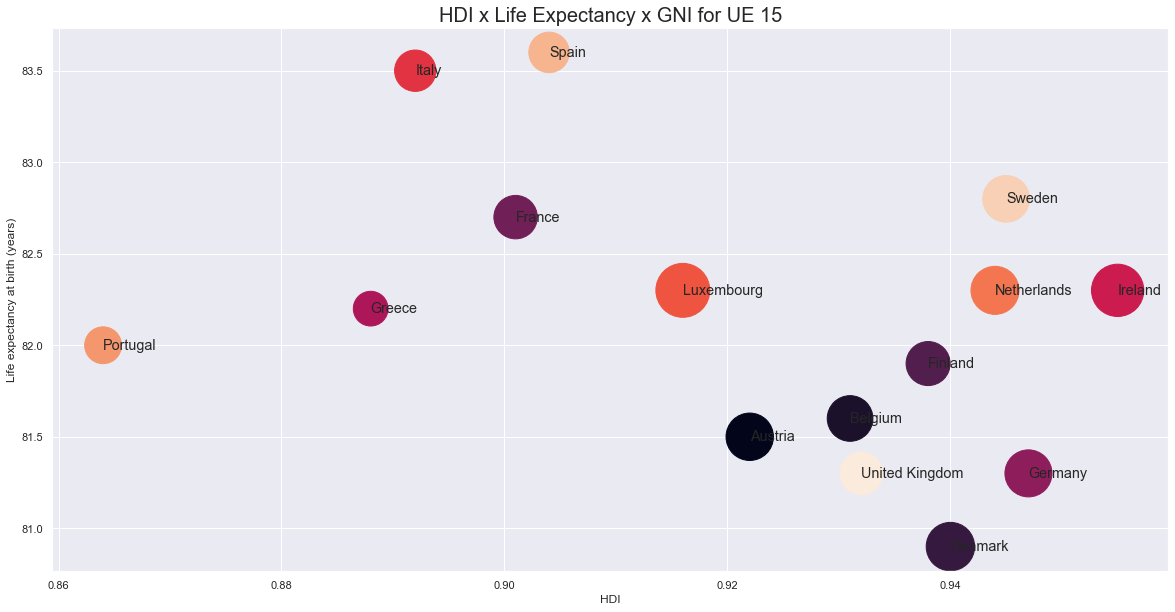

In [439]:
countries = eu15_2019.Country
# HDI in Europe in 2019
HDI = eu15_2019.HDI
# Life expectancy at birth, years
life_expectancy = eu15_2019.life
# Per person income fixed to US Dollars in 2019
GNI = eu15_2019['gni per capita']

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
# Some random colours: 
colours = range(len(countries))
ax.scatter(HDI,life_expectancy, c=colours, s=GNI/25)
ax.set_xlabel('HDI')
ax.set_ylabel('Life expectancy at birth (years)')


offset = 0
for x, y, s, country in zip(HDI, life_expectancy, GNI, countries):
    ax.text(x+offset, y, country, va='center', fontsize='large')

plt.title('HDI x Life Expectancy x GNI for UE 15', fontsize='20')
plt.savefig('HDI x Life Expectancy x GNI for UE 15.jpg', dpi=300)
plt.show()

In [350]:
df4=df_test.copy()

In [354]:
X=df4.drop(['Country','HDI'], axis=1)
y=df4.HDI

sm.OLS(y, sm.add_constant(X.drop(['year'], axis=1).astype(float))).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    HDI   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 3.089e+04
Date:                Fri, 18 Dec 2020   Prob (F-statistic):          2.25e-204
Time:                        11:14:55   Log-Likelihood:                 742.72
No. Observations:                 150   AIC:                            -1477.
Df Residuals:                     146   BIC:                            -1465.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1367      0.006     23.503      0.000       0.125       0.148
life               0.0047   8.04e-05     58.330      0.000       0.005       0.005
school_index       0.0231      0.000    150.129      0.000       0.023       0.023
gni per capita  1.337e-06   3.79e-08     35.268      0.000    1.26e-06    1.41e-06
==============================================================================
Omnibus:                        7.759   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.021   Jarque-Bera (JB):                7.575
Skew:                          -0.470   Prob(JB):                       0.0226
Kurtosis:                       3.572   Cond. No.                     1.67e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.67e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Fitting linear regression

R^2: 0.9984267634227846 

Coefficients
-------------------------------------
Intercept: 0.13667593553921986
life: 0.0
school_index: 0.02
gni per capita: 0.0

Assumption 1: Linear Relationship between the Target and the Features
Checking with a scatter plot of actual vs. predicted. Predictions should follow the diagonal line.


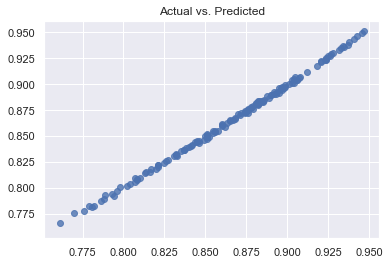

If non-linearity is apparent, consider adding a polynomial term 
		or using box-cox transformation to make X or y follow normal distribution



Building a correlation table


Parameters that are most likely VIOLATE linearity assumption and their correlation with HDI


Series([], Name: HDI, dtype: float64)


Parameters that are most likely FOLLOW linearity assumption and their correlation with HDI


life              0.657772
school_index      0.964984
gni per capita    0.823487
Name: HDI, dtype: float64


Assumption 2: Little to no multicollinearity among predictors


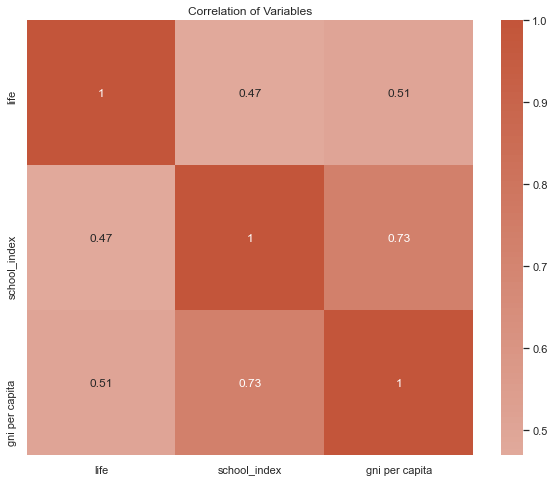

Variance Inflation Factors (VIF)
> 10: An indication that multicollinearity may be present
> 100: Certain multicollinearity among the variables
-------------------------------------
school_index: 202.93165561237623
life: 112.24243954829291
gni per capita: 110.84625172776602

3 cases of possible multicollinearity
3 cases of definite multicollinearity

Assumption not satisfied

Coefficient interpretability will be problematic
Consider removing variables with a high Variance Inflation Factor (VIF)

Assumption 3: No Autocorrelation

Performing Durbin-Watson Test
Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data
0 to 2< is positive autocorrelation
>2 to 4 is negative autocorrelation
-------------------------------------
Durbin-Watson: 1.9833491154323533
Little to no autocorrelation 

Assumption satisfied

Assumption 4: Homoskedasticity of Error Terms
Residuals should have relative constant variance


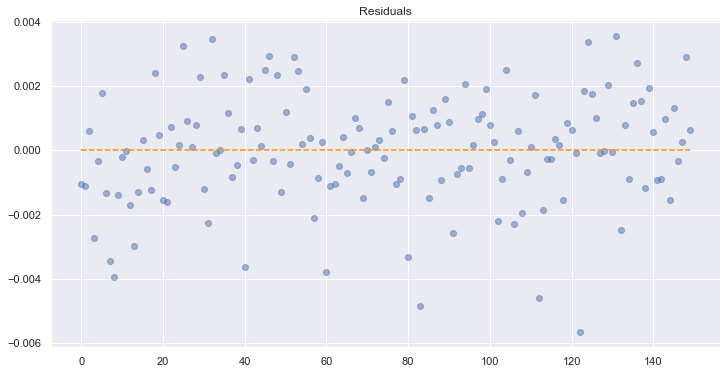

If heteroskedasticity is apparent, confidence intervals and predictions will be affected

Consider removing outliers and preprocessing features - nonlinear transformation can help


{'Lagrange Multiplier': 42.184847602792345,
 'pvalue for LM': 6.913161984418292e-10,
 'F stats': 19.172235873872967,
 'pvalue for Fstats': 1.5096038021805916e-10}

Signs of positive autocorrelation 

Assumption potentially not satisfied 


Assumption 5: The error terms are kinda normally distributed

Using the Anderson-Darling test for normal distribution
p-value from the test - below 0.05 generally means non-normal: 0.12533112269139365
Residuals are normally distributed


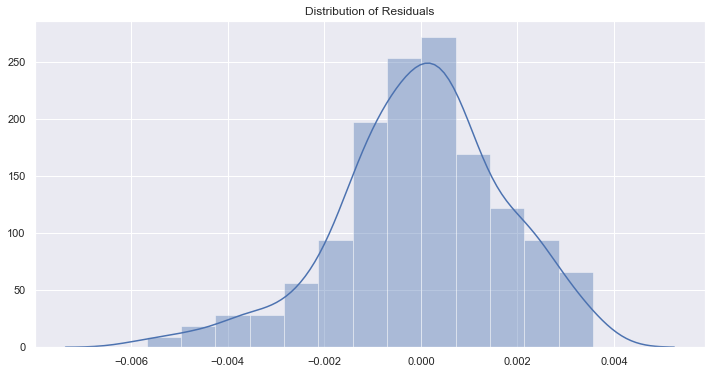


Assumption satisfied
Building a probability plot


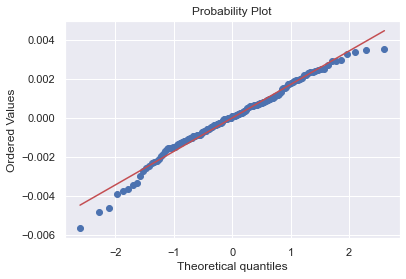


In fact outliers are super significant. Probably it is better to split your dataset into 2 different ones.


{'Satisfied': ['Linearity', 'Autocorrelation', 'Normality'],
 'Potentially': ['Autocorrelation'],
 'Violated': ['Multicollinearity', 'Sub-Normality']}

In [355]:
tester=atols(X.drop(['year'],axis=1).astype(float)
             ,y)
tester.run_all()

In [371]:
df1=df1.dropna()

In [372]:
df1=df1.astype({"year": int})
df1=df1.sample(frac=1)

In [373]:
X=df1.drop(['Country','HDI'], axis=1)
y=df1.HDI

sm.OLS(y, sm.add_constant(X.astype(float))).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    HDI   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                 2.113e+04
Date:                Fri, 18 Dec 2020   Prob (F-statistic):               0.00
Time:                        11:23:20   Log-Likelihood:                 10113.
No. Observations:                5670   AIC:                        -2.022e+04
Df Residuals:                    5665   BIC:                        -2.018e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              1.4843      0.133     11.200      0.000       1.225       1.744
year              -0.0007   6.65e-05    -11.139      0.000      -0.001      -0.001
life               0.0046   9.49e-05     48.409      0.000       0.004       0.005
school_index       0.0334      0.000    108.465      0.000       0.033       0.034
gni per capita   1.45e-06    3.7e-08     39.154      0.000    1.38e-06    1.52e-06
==============================================================================
Omnibus:                     1421.481   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            50391.423
Skew:                           0.498   Prob(JB):                         0.00
Kurtosis:                      17.571   Cond. No.                     6.25e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.25e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Fitting linear regression

R^2: 0.9371795515549856 

Coefficients
-------------------------------------
Intercept: 1.4843209929920014
year: -0.0
life: 0.0
school_index: 0.03
gni per capita: 0.0

Assumption 1: Linear Relationship between the Target and the Features
Checking with a scatter plot of actual vs. predicted. Predictions should follow the diagonal line.


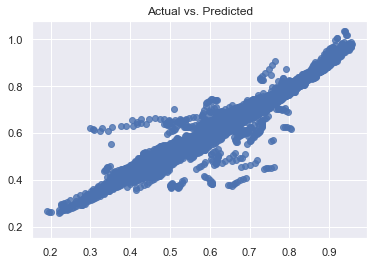

If non-linearity is apparent, consider adding a polynomial term 
		or using box-cox transformation to make X or y follow normal distribution



Building a correlation table


Parameters that are most likely VIOLATE linearity assumption and their correlation with HDI


Series([], Name: HDI, dtype: float64)


Parameters that are most likely FOLLOW linearity assumption and their correlation with HDI


year              0.257614
life              0.863722
school_index      0.936361
gni per capita    0.718225
Name: HDI, dtype: float64


Assumption 2: Little to no multicollinearity among predictors


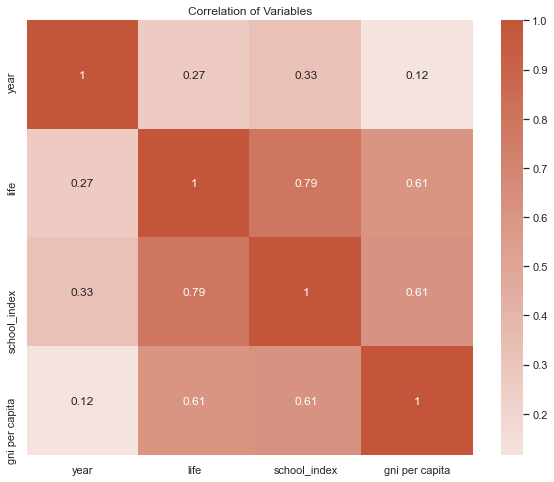

Variance Inflation Factors (VIF)
> 10: An indication that multicollinearity may be present
> 100: Certain multicollinearity among the variables
-------------------------------------
life: 146.99908573268544
year: 80.03785318432695
school_index: 31.11333085265549
gni per capita: 3.0102545994350782

3 cases of possible multicollinearity
1 cases of definite multicollinearity

Assumption not satisfied

Coefficient interpretability will be problematic
Consider removing variables with a high Variance Inflation Factor (VIF)

Assumption 3: No Autocorrelation

Performing Durbin-Watson Test
Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data
0 to 2< is positive autocorrelation
>2 to 4 is negative autocorrelation
-------------------------------------
Durbin-Watson: 1.989016200838718
Little to no autocorrelation 

Assumption satisfied

Assumption 4: Homoskedasticity of Error Terms
Residuals should have relative constant variance


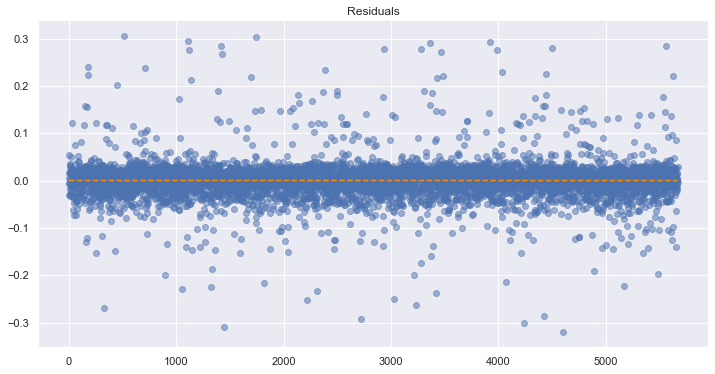

If heteroskedasticity is apparent, confidence intervals and predictions will be affected

Consider removing outliers and preprocessing features - nonlinear transformation can help


{'Lagrange Multiplier': 479.0357782788692,
 'pvalue for LM': 1.666211955113219e-103,
 'F stats': 130.7183311132579,
 'pvalue for Fstats': 5.994059412393753e-107}

Signs of positive autocorrelation 

Assumption potentially not satisfied 


Assumption 5: The error terms are kinda normally distributed

Using the Anderson-Darling test for normal distribution
p-value from the test - below 0.05 generally means non-normal: 0.0
Residuals are not normally distributed


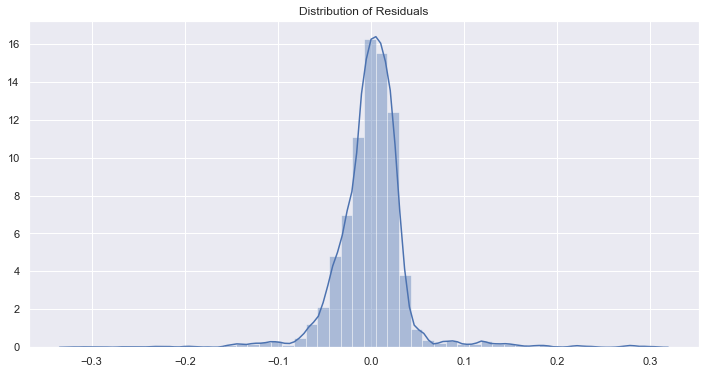


Assumption not satisfied

Confidence intervals will likely be affected
Try performing nonlinear transformations on variables
Building a probability plot


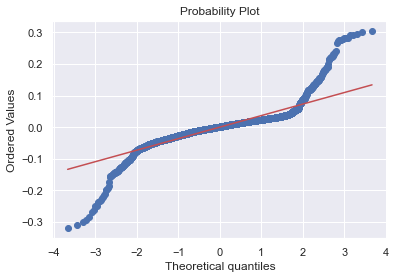


In your dataset you quite fat tails. You have 0.015 potential outliers (85 rows)


{'Satisfied': ['Linearity', 'Autocorrelation'],
 'Potentially': ['Autocorrelation', 'Sub-Normality'],
 'Violated': ['Multicollinearity', 'Normality']}

In [379]:
tester=atols(X,y)
tester.run_all()

In [381]:
eu15.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 450 entries, 30 to 959
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country              450 non-null    object 
 1   year                 450 non-null    int32  
 2   HDI                  450 non-null    float64
 3   life                 450 non-null    float64
 4   school_index         450 non-null    float64
 5   gni per capita       450 non-null    float64
 6   EcologicalFootprint  450 non-null    float64
 7   Biocapacity          450 non-null    float64
dtypes: float64(6), int32(1), object(1)
memory usage: 29.9+ KB


In [383]:
eu15=eu15.sample(frac=1)

In [390]:
X=eu15.drop(['Country','HDI'], axis=1)
y=eu15.HDI

sm.OLS(y, sm.add_constant(X.drop(['Biocapacity', 'EcologicalFootprint'], axis=1).astype(float))).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    HDI   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     8228.
Date:                Fri, 18 Dec 2020   Prob (F-statistic):               0.00
Time:                        11:31:43   Log-Likelihood:                 1699.7
No. Observations:                 450   AIC:                            -3389.
Df Residuals:                     445   BIC:                            -3369.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.6929      0.155      4.463      0.000       0.388       0.998
year              -0.0003   8.89e-05     -3.676      0.000      -0.001      -0.000
life               0.0061      0.000     19.422      0.000       0.005       0.007
school_index       0.0234      0.000     94.642      0.000       0.023       0.024
gni per capita  8.677e-07   2.11e-08     41.084      0.000    8.26e-07    9.09e-07
==============================================================================
Omnibus:                       64.161   Durbin-Watson:                   2.138
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               88.206
Skew:                          -1.024   Prob(JB):                     7.02e-20
Kurtosis:                       3.712   Cond. No.                     2.73e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.73e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Fitting linear regression

R^2: 0.9866591643683711 

Coefficients
-------------------------------------
Intercept: 0.692928991352596
year: -0.0
life: 0.01
school_index: 0.02
gni per capita: 0.0

Assumption 1: Linear Relationship between the Target and the Features
Checking with a scatter plot of actual vs. predicted. Predictions should follow the diagonal line.


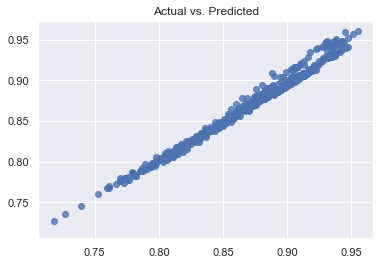

If non-linearity is apparent, consider adding a polynomial term 
		or using box-cox transformation to make X or y follow normal distribution



Building a correlation table


Parameters that are most likely VIOLATE linearity assumption and their correlation with HDI


Series([], Name: HDI, dtype: float64)


Parameters that are most likely FOLLOW linearity assumption and their correlation with HDI


year              0.807974
life              0.732981
school_index      0.945937
gni per capita    0.514349
Name: HDI, dtype: float64


Assumption 2: Little to no multicollinearity among predictors


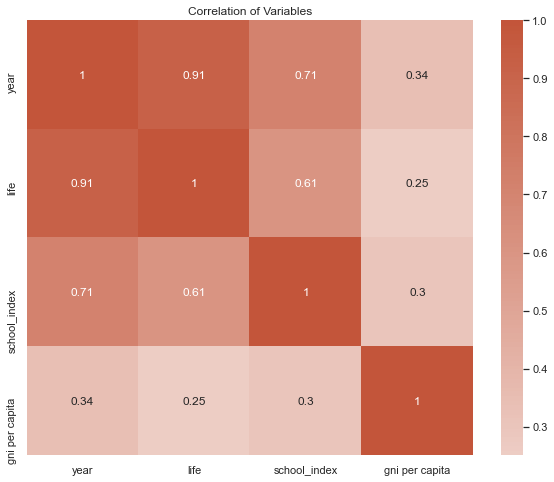

Variance Inflation Factors (VIF)
> 10: An indication that multicollinearity may be present
> 100: Certain multicollinearity among the variables
-------------------------------------
life: 2750.2198236847594
year: 2235.481265226884
school_index: 119.69627936208653
gni per capita: 13.04681543508943

4 cases of possible multicollinearity
3 cases of definite multicollinearity

Assumption not satisfied

Coefficient interpretability will be problematic
Consider removing variables with a high Variance Inflation Factor (VIF)

Assumption 3: No Autocorrelation

Performing Durbin-Watson Test
Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data
0 to 2< is positive autocorrelation
>2 to 4 is negative autocorrelation
-------------------------------------
Durbin-Watson: 2.1384375308234618
Little to no autocorrelation 

Assumption satisfied

Assumption 4: Homoskedasticity of Error Terms
Residuals should have relative constant variance


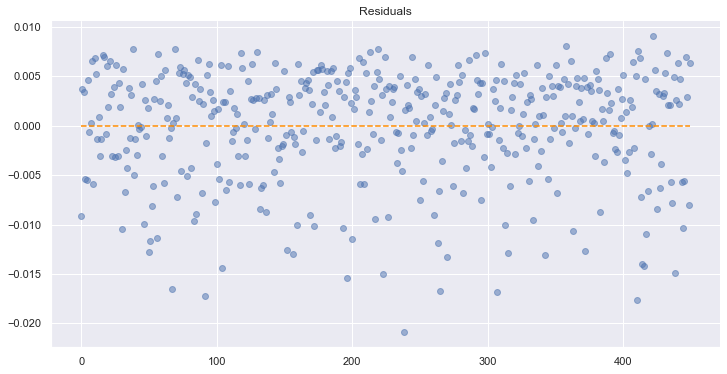

If heteroskedasticity is apparent, confidence intervals and predictions will be affected

Consider removing outliers and preprocessing features - nonlinear transformation can help


{'Lagrange Multiplier': 181.13085144168213,
 'pvalue for LM': 5.026315790321525e-39,
 'F stats': 75.11493990306967,
 'pvalue for Fstats': 1.1998931029915675e-48}

Signs of positive autocorrelation 

Assumption potentially not satisfied 


Assumption 5: The error terms are kinda normally distributed

Using the Anderson-Darling test for normal distribution
p-value from the test - below 0.05 generally means non-normal: 2.7144130503229186e-23
Residuals are not normally distributed


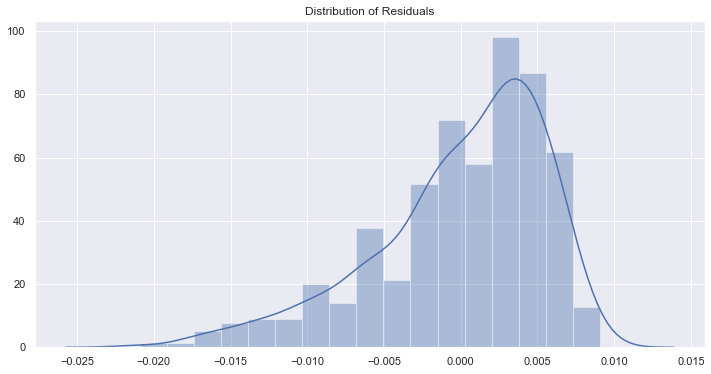


Assumption not satisfied

Confidence intervals will likely be affected
Try performing nonlinear transformations on variables
Building a probability plot


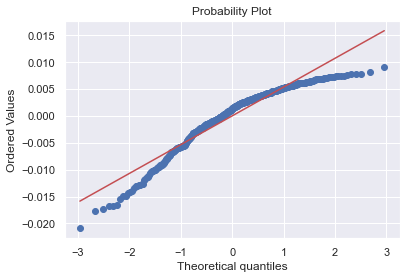


In your dataset you quite fat tails. You have 0.04 potential outliers (18 rows)


{'Satisfied': ['Linearity', 'Autocorrelation'],
 'Potentially': ['Autocorrelation', 'Sub-Normality'],
 'Violated': ['Multicollinearity', 'Normality']}

In [391]:
tester=atols(X.drop(['Biocapacity', 'EcologicalFootprint'],axis=1).astype(float)
             ,y)
tester.run_all()